## 빅데이터 기반 AI 응용 솔루션 개발자 전문 과정

#### 교과목명 : 모델 성능 평가
- 평가일 : 08.27
- 성명 :
- 점수 :

Q1. iris data를 불러와서 붓꽃의 종류를 분류하는 모델링을 수행한 후 오차행렬과 정확도를 평가하세요.
- test_size = 0.2, 분류기는 DecisionTreeClassifier를 이용
- 정확도는 소수점 4째 자리까지 표현

In [ ]:
# A.
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
# A.
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# A.
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=10)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)


confusion = confusion_matrix(y_test,pred)
accuracy = accuracy_score(y_test,pred)

print(confusion)
print(np.round(accuracy,4))


[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
0.9667


Q2. Q1을 classification_report()로 평가 및 출력하세요.

In [ ]:
# A.
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Q3. train.csv 파일을 불러와서 분류모델링 평가를 아래와 같이 수행하세요.
- 하기 사항들을 처리하여 분석용 데이터셋 구축하였다. 수정이 필요한 부분을 찾아서 조치
 - 불필요한 컬럼 삭제 : ['PassengerId','Ticket','Cabin'] 
 - Null 처리 : ['Embarked','Age'] * 최빈도시, Name컬럼의 호칭 활용
 - 레이블 인코딩 : ['Sex','Embarked']
 - Age 범주화 : 6개 범주
 - 파생변수 Family : 가족수별 범주화
 - one-hot encoding : Embarked, Family_size, Age_cat
 - Fair_cat 컬럼 생성 : Fair 범주화
 
- dt, lr, rf, knn, svm 5개 분류 모델링 및 생존자 예측 정확도 평가
- dt, lr, rf, knn 모델별로 accuracy에 추가하여 confusion matrix, accuracy, precision, recall,roc auc score 평가하고 svm은 classification으로 평가하세요.

In [ ]:
import pandas as pd
tdf = pd.read_csv('dataset/train.csv')

In [ ]:
# 사용자 함수
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# 불필요한 칼럼 삭제
def drop_features(df):
    df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)
    return df

# Null 처리
def fillna(df):   
    most_town = df['Embarked'].value_counts(dropna=True).idxmax()
    df['Embarked'].fillna(most_town, inplace=True)
    return df

#  레이블 인코딩
def format_features(df):
    
    features=['Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

# 앞에서 설정한 Data Processing 함수 호출
def transform_features(df):
    df = drop_features(df)
    df = fillna(df)
    df = format_features(df)
    return df

tdf = transform_features(tdf)
tdf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [ ]:
# Null 처리 방법
# Embarked - 빈도가 가장 많은 도시로 대체
# Age - 'Name' 컬럼에 있는 호칭을 이용하여 Title 컬럼을 만들고 아래와 같은 공통 그룹 평균으로 대체

tdf['Title']= tdf.Name.str.extract('([A-Za-z]+)\.')

tdf['Title'].replace(['Mr','Miss','Mrs','Master','Rev', 'Dr','Col','Major','Ms','Mlle','Countess',
'Sir','Jonkheer','Dona','Capt','Lady','Don','Mme'], ['Mr','Miss','Mrs','Master','Mr','Other','Mr','Mr',
'Mrs','Miss','Mrs','Mr','Mr','Other','Mr','Mrs','Mr','Mms'], inplace=True)

tdf.groupby('Title').Age.describe()

tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Mr'), 'Age'] = tdf[tdf.Title == 'Mr'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Miss'), 'Age'] = tdf[tdf.Title == 'Miss'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Mms'), 'Age'] = tdf[tdf.Title == 'Mms'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Mrs'), 'Age'] = tdf[tdf.Title == 'Mrs'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Master'), 'Age'] = tdf[tdf.Title == 'Master'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Other'), 'Age'] = tdf.Age.mean()
tdf.Age.isnull().sum()

def get_category(age):
    cat = ''
    if age < 10: cat = '10s'
    elif age < 20: cat = '20s'
    elif age < 30: cat = '30s'
    elif age < 40: cat = '40s'
    elif age < 50: cat = '50s'    
    else : cat = 'Elderly'
    
    return cat

tdf['Age_cat'] = tdf['Age'].apply(lambda x : get_category(x))
tdf[['Age', 'Age_cat']].head()

# 가족 수별로 카테고리화. (1인: Single, 2~4인: Small, 5인: Big)
tdf['Family'] = tdf.SibSp + tdf.Parch

def cat_size(x):
    if x == 0:
        return 'Single'
    elif x < 4:
        return 'Small'
    else:
        return 'Big'
    
tdf['Family_size'] = tdf.Family.apply(lambda x: cat_size(x))

# Embarked, Family_size, Age_cat 칼럼 one-hot encoding
tdf = pd.get_dummies(data = tdf, columns = ['Embarked'], prefix = 'Town')
tdf = pd.get_dummies(data = tdf, columns = ['Family_size'], prefix = 'Family')
tdf = pd.get_dummies(data = tdf, columns = ['Age_cat'], prefix='Age')
tdf.head()

bins = [0,4,8,14,31,513]
bin_name = [0,1,2,3,4]
tdf['Fare_cat'] = pd.cut(tdf['Fare'],bins = bins,labels=bin_name,include_lowest = True)

tdf1 =tdf.drop(['Name','Age','SibSp','Parch','Title','Family','Fare','Pclass'],axis=1)
tdf1.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [ ]:
# # import pandas as pd
tdf1.to_pickle('dataset/tdf1.pkl')

import pandas as pd
tdf1 = pd.read_pickle('dataset/tdf1.pkl')
tdf1.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
X = tdf1.drop('Survived',axis=1)
y = tdf1['Survived']

# 독립변수 정규화(평균 0, 분산 1인 표준정규분포)
X = preprocessing.StandardScaler().fit(X).transform(X)

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=10) 



In [ ]:
# A. dt, lr, rf, knn, svm 5개 분류 모델링 및 생존자 예측 정확도 평가
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
k_model = KNeighborsClassifier(n_neighbors=5)
svm_model = svm.SVC(kernel='rbf')



def model_val(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('{} 정확도: {:.4f}'.format(model,accuracy))
    
model_val(dt_model,X_train, X_test, y_train, y_test)
model_val(rf_model,X_train, X_test, y_train, y_test)
model_val(lr_model,X_train, X_test, y_train, y_test)
model_val(k_model,X_train, X_test, y_train, y_test)
model_val(svm_model,X_train, X_test, y_train, y_test)

DecisionTreeClassifier() 정확도: 0.8547
RandomForestClassifier() 정확도: 0.8492
LogisticRegression() 정확도: 0.8324
KNeighborsClassifier() 정확도: 0.8101
SVC() 정확도: 0.8436


In [ ]:
# A. dt, lr, rf, knn 모델별로 accuracy에 추가하여 confusion matrix, accuracy, precision, 
# recall,roc auc score 평가
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, \
f1_score,roc_auc_score
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba)
    
    print('오차행렬:\n', confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, f1: {:.4f}, AUC: {:.4f}'.format(accuracy, precision, recall, f1, auc))    
    

In [ ]:
# A.
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
k_model = KNeighborsClassifier(n_neighbors=5)

def model_cl_val(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:,1]
    get_clf_eval(y_test,pred,pred_proba)

In [ ]:
# A.
model_val(dt_model,X_train, X_test, y_train, y_test)
print()
model_cl_val(rf_model,X_train, X_test, y_train, y_test)
print()
model_cl_val(lr_model,X_train, X_test, y_train, y_test)
print()
model_cl_val(k_model,X_train, X_test, y_train, y_test)


DecisionTreeClassifier() 정확도: 0.8603

오차행렬:
 [[102  15]
 [ 14  48]]
정확도: 0.8380, 정밀도: 0.7619, 재현율: 0.7742, f1: 0.7680, AUC: 0.8794

오차행렬:
 [[103  14]
 [ 16  46]]
정확도: 0.8324, 정밀도: 0.7667, 재현율: 0.7419, f1: 0.7541, AUC: 0.8564

오차행렬:
 [[97 20]
 [14 48]]
정확도: 0.8101, 정밀도: 0.7059, 재현율: 0.7742, f1: 0.7385, AUC: 0.8553


In [ ]:
# A. SVM

from sklearn.metrics import classification_report
from sklearn import svm
# 벡터 공간으로 매핑하는 함수를 커널이라고 함. 
# kernel='rbf'옵션으로 RBF(Radial Basis Function) 함수를 적용
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

pred = svm_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.78      0.76      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



Q4. Q3에서 랜덤포레스트로 생성한 모델로 교차검증(cv=5)을 수행하고 평균 정확도를 출력하세요.

In [ ]:
# A. 교차검증
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, scoring='accuracy',cv=5)
print('정확도:',np.round(scores,4))
print('평균 정확도:',round(np.mean(scores),4))

정확도: [0.7821 0.7921 0.7809 0.7697 0.8371]
평균 정확도: 0.7924


Q5. Q3에서 랜덤포레스트로 생성한 예측모델에 대하여 교차 검증 및 성능 개선을 수행하세요.(GridSearchCV 활용)

In [ ]:
# A. 교차검증 및 하이퍼파라미터 튜닝
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[50,100,200],
         'max_depth':[2, 4, 6, 8, 10],
         'min_samples_leaf':[2,8,14,20],
         'min_samples_split':[2,8.14,20]}
rf_dclf = GridSearchCV(rf_model, param_grid=params,cv=5,refit=True)
rf_dclf.fit(X_train,y_train)
print(rf_dclf)
print('최적 하이퍼파라미터:',rf_dclf.best_params_)
print('최고 정확도:', rf_dclf.best_score_)
best_rclf = rf_dclf.best_estimator_
print(best_rclf)  
rclf_pred = best_rclf.predict(X_test)
rclf_pred_proba = best_rclf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,rclf_pred,rclf_pred_proba)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 8, 14, 20],
                         'min_samples_split': [2, 8.14, 20],
                         'n_estimators': [50, 100, 200]})
최적 하이퍼파라미터: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 정확도: 0.8188121737417511
RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=20,
                       random_state=0)
오차행렬:
 [[104  13]
 [ 13  49]]
정확도: 0.8547, 정밀도: 0.7903, 재현율: 0.7903, f1: 0.7903, AUC: 0.8754


Q6. 'dataset/diabetes.csv'을 불러와서 피마 인디언 당뇨병 예측을 수행한 후 임곗값을 0.3에서 0.5까지 변화시키면서 정밀도와 재현율이 조정되는 과정을 그래프로 표현하고 재현율을 올리면서 정확도와 정밀도를 적정하게 유지할 수 있는 임계값을 선택하여 평가를 수행하세요. 

In [ ]:
# A.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('dataset/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
# A. 평가 지표 함수
def get_clf_eval(y_test=None, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬:\n',confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# A.
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

total_count = diabetes_data.Glucose.count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0인 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature,
                                               zero_count,
                                               100*zero_count/total_count))

diabetes_data[zero_features]= \
diabetes_data[zero_features].replace(0,diabetes_data[zero_features].mean())

Glucose 0인 건수는 5, 퍼센트는 0.65 %
BloodPressure 0인 건수는 35, 퍼센트는 4.56 %
SkinThickness 0인 건수는 227, 퍼센트는 29.56 %
Insulin 0인 건수는 374, 퍼센트는 48.70 %
BMI 0인 건수는 11, 퍼센트는 1.43 %


In [ ]:
# A
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,
                                              test_size=0.2,
                                              random_state=156,
                                              stratify=y)
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test , pred, pred_proba)

오차 행렬:
 [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


In [ ]:
# A.
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 
    # 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()

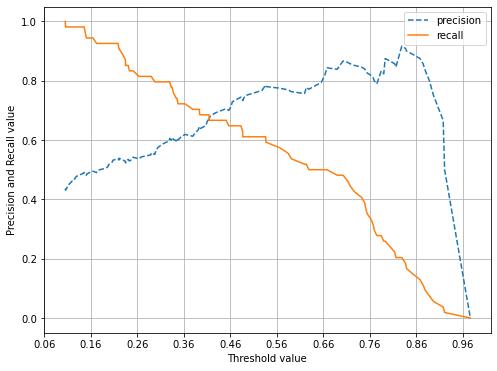

In [ ]:
# A.
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [ ]:
# A.
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)
        
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.3
오차 행렬:
 [[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,    F1: 0.6615, AUC:0.8433
임계값: 0.33
오차 행렬:
 [[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,    F1: 0.6774, AUC:0.8433
임계값: 0.36
오차 행렬:
 [[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,    F1: 0.6667, AUC:0.8433
임계값: 0.39
오차 행렬:
 [[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,    F1: 0.6667, AUC:0.8433
임계값: 0.42
오차 행렬:
 [[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,    F1: 0.6792, AUC:0.8433
임계값: 0.45
오차 행렬:
 [[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,    F1: 0.6857, AUC:0.8433
임계값: 0.48
오차 행렬:
 [[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
임계값: 0.5
오차 행렬:
 [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


In [ ]:
# A.
binarizer1 = Binarizer(threshold=0.48)
pred_th_048 = binarizer1.fit_transform(pred_proba[:,1].reshape(-1,1))
print(get_clf_eval(y_test,pred_th_048,pred_proba[:,1]))

오차 행렬:
 [[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
None


Q7. "dataset/auto-mpg.xlsx"을 불러와서 weight의 변화에 따른 mpg를 예측하는 회귀 모델을 생성하고 MSE, RMSE, R2로 평가를 수행하세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("dataset/auto-mpg.xlsx")
ndf = df[['mpg','weight']]
ndf.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


In [ ]:
# A. 속성(변수) 선택
X=ndf[['weight']]
y=ndf['mpg']

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=11) #랜덤 추출 값 

# 단순회귀분석 모형 생성 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print('MSE:{0:.4f}, RMSE:{1:.4f}, R2:{2:.4f}'.format(mse,rmse,r2))

MSE:19.1351, RMSE:4.3744, R2:0.6737


Q8. 'auto-mpg.xlsx'를 불러와서 다음을 수행하세요
- 필요한 전처리를 수행하고 mpg를 종속변수, horsepower를 독립변수로 설정후 단순 선형회귀모델을 생성 및 평가
- 다항회귀모델로 변환하여 평가 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('dataset/auto-mpg.xlsx')
ndf = df[['mpg','horsepower']]
ndf.head()

,mpg,horsepower
0,18.0,130
1,15.0,165
2,18.0,150
3,16.0,150
4,17.0,140


In [ ]:
# A.
import warnings
warnings.filterwarnings('ignore')
ndf['horsepower'] = ndf.horsepower.replace('?',np.nan)
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   horsepower  392 non-null    float64
dtypes: float64(2)
memory usage: 9.2 KB


In [ ]:
# A. 변수(속성) 선택
X = ndf[['horsepower']] # 독립변수
y = ndf['mpg'] # 종속변수

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=0)

In [ ]:
# A.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:22.861, RMSE:4.781, R2 score:0.628


In [ ]:
# A. 변수(속성) 선택
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변환

X_test_poly = poly.fit_transform(X_test)

# score 사용
pr = LinearRegression()
pr.fit(X_train_poly,y_train)
pr_preds = pr.predict(X_test_poly)

mse = mean_squared_error(y_test,pr_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pr_preds)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:16.804, RMSE:4.099, R2 score:0.727


Q9. santander 은행 데이터에 대하여 필요한 전처리를 수행한 후 고객 만족, 불만족 예측 모델을 다음 2가지 방법으로 생성하고 ROC_AUC로 평가하세요.(단, n_estimators=200으로 설정)
- XGBoost
- LightGBM

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("dataset/santander/train_santander.csv")
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [ ]:
# A. var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [ ]:
# A.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0,
                                                    stratify=y_labels)

In [ ]:
# A.
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=200, random_state=10)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82569	validation_1-auc:0.79283
[1]	validation_0-auc:0.84010	validation_1-auc:0.80737
[2]	validation_0-auc:0.84361	validation_1-auc:0.81021
[3]	validation_0-auc:0.84783	validation_1-auc:0.81287
[4]	validation_0-auc:0.85123	validation_1-auc:0.81469
[5]	validation_0-auc:0.85518	validation_1-auc:0.81860
[6]	validation_0-auc:0.85922	validation_1-auc:0.81977
[7]	validation_0-auc:0.86238	validation_1-auc:0.82034
[8]	validation_0-auc:0.86570	validation_1-auc:0.82147
[9]	validation_0-auc:0.86798	validation_1-auc:0.82301
[10]	validation_0-auc:0.87104	validation_1-auc:0.82379
[11]	validation_0-auc:0.87448	validation_1-auc:0.82456
[12]	validation_0-auc:0.87687	validation_1-auc:0.82401
[13]	validation_0-auc:0.87918	validation_1-auc:0.82467
[14]	validation_0-auc:0.88081	validation_1-auc:0.82508
[15]	validation_0-auc:0.88331	validation_1-auc:0.82379
[16]	validation_0-auc:0.88569	validation_1-auc:0.82457
[17]	validation_0-auc:0.88674	validation_1-auc:0.82453
[18]	validation_0-au

In [ ]:
# A.
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=200,random_state=10)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.801789	valid_0's binary_logloss: 0.155038
[3]	valid_0's auc: 0.803367	valid_0's binary_logloss: 0.15185
[4]	valid_0's auc: 0.805168	valid_0's binary_logloss: 0.14961
[5]	valid_0's auc: 0.809401	valid_0's binary_logloss: 0.147695
[6]	valid_0's auc: 0.810671	valid_0's binary_logloss: 0.146234
[7]	valid_0's auc: 0.815356	valid_0's binary_logloss: 0.144877
[8]	valid_0's auc: 0.816777	valid_0's binary_logloss: 0.143783
[9]	valid_0's auc: 0.817821	valid_0's binary_logloss: 0.143084
[10]	valid_0's auc: 0.818637	valid_0's binary_logloss: 0.142272
[11]	valid_0's auc: 0.81939	valid_0's binary_logloss: 0.141623
[12]	valid_0's auc: 0.821106	valid_0's binary_logloss: 0.141043
[13]	valid_0's auc: 0.822008	valid_0's binary_logloss: 0.140628
[14]	valid_0's auc: 0.822584	valid_0's binary_logloss: 0.140198
[15]	valid_0's auc: 0.822291	valid_0's binary_logloss:

[140]	valid_0's auc: 0.811309	valid_0's binary_logloss: 0.142004
[141]	valid_0's auc: 0.811321	valid_0's binary_logloss: 0.142035
[142]	valid_0's auc: 0.811275	valid_0's binary_logloss: 0.142077
[143]	valid_0's auc: 0.811453	valid_0's binary_logloss: 0.142082
Early stopping, best iteration is:
[43]	valid_0's auc: 0.823891	valid_0's binary_logloss: 0.138182
ROC AUC: 0.8239


Q10. Q9번에서 lightgbm 방식의 성능 개선 작업을 수행 후 최적의 하이퍼 파라미터를 적용하여 평가를 수행하세요.

In [ ]:
# A.
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(random_state=10)

params = {'n_estimators':[100, 200],
          'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.81797

[70]	valid_0's auc: 0.9036	valid_0's binary_logloss: 0.114655	valid_1's auc: 0.818213	valid_1's binary_logloss: 0.139818
[71]	valid_0's auc: 0.903992	valid_0's binary_logloss: 0.114529	valid_1's auc: 0.818106	valid_1's binary_logloss: 0.139844
[72]	valid_0's auc: 0.904317	valid_0's binary_logloss: 0.114353	valid_1's auc: 0.818092	valid_1's binary_logloss: 0.139787
[73]	valid_0's auc: 0.904504	valid_0's binary_logloss: 0.114236	valid_1's auc: 0.817919	valid_1's binary_logloss: 0.13986
[74]	valid_0's auc: 0.904701	valid_0's binary_logloss: 0.1141	valid_1's auc: 0.817492	valid_1's binary_logloss: 0.139966
[75]	valid_0's auc: 0.905024	valid_0's binary_logloss: 0.113934	valid_1's auc: 0.817513	valid_1's binary_logloss: 0.139988
[76]	valid_0's auc: 0.905247	valid_0's binary_logloss: 0.113782	valid_1's auc: 0.817382	valid_1's binary_logloss: 0.140009
[77]	valid_0's auc: 0.905663	valid_0's binary_logloss: 0.113607	valid_1's auc: 0.817314	valid_1's binary_logloss: 0.140044
[78]	valid_0's auc: 0

[49]	valid_0's auc: 0.893414	valid_0's binary_logloss: 0.118939	valid_1's auc: 0.818409	valid_1's binary_logloss: 0.139054
[50]	valid_0's auc: 0.894048	valid_0's binary_logloss: 0.118693	valid_1's auc: 0.818379	valid_1's binary_logloss: 0.139104
[51]	valid_0's auc: 0.894289	valid_0's binary_logloss: 0.118553	valid_1's auc: 0.817983	valid_1's binary_logloss: 0.139166
[52]	valid_0's auc: 0.894862	valid_0's binary_logloss: 0.118332	valid_1's auc: 0.81765	valid_1's binary_logloss: 0.13927
[53]	valid_0's auc: 0.895374	valid_0's binary_logloss: 0.118133	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.139362
[54]	valid_0's auc: 0.89609	valid_0's binary_logloss: 0.117896	valid_1's auc: 0.817606	valid_1's binary_logloss: 0.139297
[55]	valid_0's auc: 0.896563	valid_0's binary_logloss: 0.117681	valid_1's auc: 0.817454	valid_1's binary_logloss: 0.139341
[56]	valid_0's auc: 0.897092	valid_0's binary_logloss: 0.11747	valid_1's auc: 0.817158	valid_1's binary_logloss: 0.139409
[57]	valid_0's auc: 

[27]	valid_0's auc: 0.876925	valid_0's binary_logloss: 0.12479	valid_1's auc: 0.825919	valid_1's binary_logloss: 0.137413
[28]	valid_0's auc: 0.877648	valid_0's binary_logloss: 0.124436	valid_1's auc: 0.825781	valid_1's binary_logloss: 0.137474
[29]	valid_0's auc: 0.878599	valid_0's binary_logloss: 0.124086	valid_1's auc: 0.825682	valid_1's binary_logloss: 0.137456
[30]	valid_0's auc: 0.879331	valid_0's binary_logloss: 0.123772	valid_1's auc: 0.825747	valid_1's binary_logloss: 0.137458
[31]	valid_0's auc: 0.880213	valid_0's binary_logloss: 0.123503	valid_1's auc: 0.826127	valid_1's binary_logloss: 0.137382
[32]	valid_0's auc: 0.880836	valid_0's binary_logloss: 0.123243	valid_1's auc: 0.825755	valid_1's binary_logloss: 0.137402
[33]	valid_0's auc: 0.881453	valid_0's binary_logloss: 0.122975	valid_1's auc: 0.825597	valid_1's binary_logloss: 0.137411
[34]	valid_0's auc: 0.882559	valid_0's binary_logloss: 0.122715	valid_1's auc: 0.826384	valid_1's binary_logloss: 0.13731
[35]	valid_0's auc

[96]	valid_0's auc: 0.909416	valid_0's binary_logloss: 0.111443	valid_1's auc: 0.820732	valid_1's binary_logloss: 0.139079
[97]	valid_0's auc: 0.909624	valid_0's binary_logloss: 0.111304	valid_1's auc: 0.820615	valid_1's binary_logloss: 0.139119
[98]	valid_0's auc: 0.910269	valid_0's binary_logloss: 0.111061	valid_1's auc: 0.820523	valid_1's binary_logloss: 0.139141
[99]	valid_0's auc: 0.910447	valid_0's binary_logloss: 0.110942	valid_1's auc: 0.820276	valid_1's binary_logloss: 0.13919
[100]	valid_0's auc: 0.910567	valid_0's binary_logloss: 0.110856	valid_1's auc: 0.819933	valid_1's binary_logloss: 0.139272
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.910567	valid_0's binary_logloss: 0.110856	valid_1's auc: 0.819933	valid_1's binary_logloss: 0.139272
[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.834558	val

[72]	valid_0's auc: 0.901715	valid_0's binary_logloss: 0.11486	valid_1's auc: 0.819903	valid_1's binary_logloss: 0.139057
[73]	valid_0's auc: 0.901779	valid_0's binary_logloss: 0.114768	valid_1's auc: 0.819643	valid_1's binary_logloss: 0.139104
[74]	valid_0's auc: 0.902023	valid_0's binary_logloss: 0.114622	valid_1's auc: 0.819455	valid_1's binary_logloss: 0.139156
[75]	valid_0's auc: 0.902295	valid_0's binary_logloss: 0.114464	valid_1's auc: 0.819069	valid_1's binary_logloss: 0.139231
[76]	valid_0's auc: 0.90259	valid_0's binary_logloss: 0.114284	valid_1's auc: 0.818827	valid_1's binary_logloss: 0.139315
[77]	valid_0's auc: 0.902804	valid_0's binary_logloss: 0.114154	valid_1's auc: 0.818645	valid_1's binary_logloss: 0.139379
[78]	valid_0's auc: 0.903034	valid_0's binary_logloss: 0.114021	valid_1's auc: 0.818401	valid_1's binary_logloss: 0.139442
[79]	valid_0's auc: 0.903414	valid_0's binary_logloss: 0.113825	valid_1's auc: 0.81831	valid_1's binary_logloss: 0.139468
[80]	valid_0's auc:

[40]	valid_0's auc: 0.888587	valid_0's binary_logloss: 0.120745	valid_1's auc: 0.818202	valid_1's binary_logloss: 0.13925
[41]	valid_0's auc: 0.889109	valid_0's binary_logloss: 0.120521	valid_1's auc: 0.818114	valid_1's binary_logloss: 0.139304
[42]	valid_0's auc: 0.889783	valid_0's binary_logloss: 0.120293	valid_1's auc: 0.817901	valid_1's binary_logloss: 0.139329
[43]	valid_0's auc: 0.890233	valid_0's binary_logloss: 0.120064	valid_1's auc: 0.817645	valid_1's binary_logloss: 0.13936
[44]	valid_0's auc: 0.890503	valid_0's binary_logloss: 0.119888	valid_1's auc: 0.817531	valid_1's binary_logloss: 0.139403
[45]	valid_0's auc: 0.89112	valid_0's binary_logloss: 0.119631	valid_1's auc: 0.817684	valid_1's binary_logloss: 0.139375
[46]	valid_0's auc: 0.891632	valid_0's binary_logloss: 0.119408	valid_1's auc: 0.817115	valid_1's binary_logloss: 0.13949
[47]	valid_0's auc: 0.892105	valid_0's binary_logloss: 0.119187	valid_1's auc: 0.816869	valid_1's binary_logloss: 0.139599
[48]	valid_0's auc: 

[23]	valid_0's auc: 0.872836	valid_0's binary_logloss: 0.126058	valid_1's auc: 0.822753	valid_1's binary_logloss: 0.138956
[24]	valid_0's auc: 0.873748	valid_0's binary_logloss: 0.125663	valid_1's auc: 0.822431	valid_1's binary_logloss: 0.138906
[25]	valid_0's auc: 0.874847	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.822752	valid_1's binary_logloss: 0.138812
[26]	valid_0's auc: 0.875578	valid_0's binary_logloss: 0.124928	valid_1's auc: 0.822986	valid_1's binary_logloss: 0.138787
[27]	valid_0's auc: 0.876843	valid_0's binary_logloss: 0.124531	valid_1's auc: 0.822313	valid_1's binary_logloss: 0.138769
[28]	valid_0's auc: 0.877942	valid_0's binary_logloss: 0.124184	valid_1's auc: 0.822829	valid_1's binary_logloss: 0.138626
[29]	valid_0's auc: 0.878974	valid_0's binary_logloss: 0.123855	valid_1's auc: 0.823097	valid_1's binary_logloss: 0.138562
[30]	valid_0's auc: 0.879727	valid_0's binary_logloss: 0.123534	valid_1's auc: 0.823072	valid_1's binary_logloss: 0.138526
[31]	valid_0's au

[99]	valid_0's auc: 0.910394	valid_0's binary_logloss: 0.110801	valid_1's auc: 0.815641	valid_1's binary_logloss: 0.140909
[100]	valid_0's auc: 0.910498	valid_0's binary_logloss: 0.110702	valid_1's auc: 0.815493	valid_1's binary_logloss: 0.140952
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.910498	valid_0's binary_logloss: 0.110702	valid_1's auc: 0.815493	valid_1's binary_logloss: 0.140952
[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	vali

[79]	valid_0's auc: 0.905796	valid_0's binary_logloss: 0.113538	valid_1's auc: 0.814507	valid_1's binary_logloss: 0.140439
[80]	valid_0's auc: 0.906121	valid_0's binary_logloss: 0.113334	valid_1's auc: 0.81441	valid_1's binary_logloss: 0.140439
[81]	valid_0's auc: 0.906648	valid_0's binary_logloss: 0.11315	valid_1's auc: 0.814257	valid_1's binary_logloss: 0.140508
[82]	valid_0's auc: 0.906816	valid_0's binary_logloss: 0.113042	valid_1's auc: 0.814023	valid_1's binary_logloss: 0.140556
[83]	valid_0's auc: 0.907215	valid_0's binary_logloss: 0.112919	valid_1's auc: 0.814046	valid_1's binary_logloss: 0.140583
[84]	valid_0's auc: 0.907603	valid_0's binary_logloss: 0.112739	valid_1's auc: 0.814068	valid_1's binary_logloss: 0.140603
[85]	valid_0's auc: 0.907742	valid_0's binary_logloss: 0.112625	valid_1's auc: 0.813755	valid_1's binary_logloss: 0.140698
[86]	valid_0's auc: 0.908071	valid_0's binary_logloss: 0.112472	valid_1's auc: 0.813475	valid_1's binary_logloss: 0.140763
[87]	valid_0's auc

[47]	valid_0's auc: 0.891795	valid_0's binary_logloss: 0.119294	valid_1's auc: 0.824887	valid_1's binary_logloss: 0.13776
[48]	valid_0's auc: 0.892515	valid_0's binary_logloss: 0.119061	valid_1's auc: 0.824715	valid_1's binary_logloss: 0.137784
[49]	valid_0's auc: 0.892888	valid_0's binary_logloss: 0.118865	valid_1's auc: 0.824516	valid_1's binary_logloss: 0.137879
[50]	valid_0's auc: 0.893437	valid_0's binary_logloss: 0.118671	valid_1's auc: 0.824444	valid_1's binary_logloss: 0.137892
[51]	valid_0's auc: 0.894248	valid_0's binary_logloss: 0.118459	valid_1's auc: 0.824373	valid_1's binary_logloss: 0.137909
[52]	valid_0's auc: 0.894621	valid_0's binary_logloss: 0.118299	valid_1's auc: 0.824168	valid_1's binary_logloss: 0.137949
[53]	valid_0's auc: 0.894961	valid_0's binary_logloss: 0.118141	valid_1's auc: 0.824377	valid_1's binary_logloss: 0.137903
[54]	valid_0's auc: 0.895335	valid_0's binary_logloss: 0.117946	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.137872
[55]	valid_0's au

[28]	valid_0's auc: 0.877486	valid_0's binary_logloss: 0.124485	valid_1's auc: 0.823474	valid_1's binary_logloss: 0.138131
[29]	valid_0's auc: 0.878276	valid_0's binary_logloss: 0.124149	valid_1's auc: 0.823991	valid_1's binary_logloss: 0.138003
[30]	valid_0's auc: 0.879398	valid_0's binary_logloss: 0.123824	valid_1's auc: 0.823675	valid_1's binary_logloss: 0.138023
[31]	valid_0's auc: 0.880187	valid_0's binary_logloss: 0.123549	valid_1's auc: 0.823527	valid_1's binary_logloss: 0.137987
[32]	valid_0's auc: 0.881251	valid_0's binary_logloss: 0.123235	valid_1's auc: 0.823749	valid_1's binary_logloss: 0.137994
[33]	valid_0's auc: 0.881917	valid_0's binary_logloss: 0.122975	valid_1's auc: 0.823695	valid_1's binary_logloss: 0.138002
[34]	valid_0's auc: 0.882751	valid_0's binary_logloss: 0.122651	valid_1's auc: 0.823256	valid_1's binary_logloss: 0.13811
[35]	valid_0's auc: 0.883135	valid_0's binary_logloss: 0.122457	valid_1's auc: 0.823342	valid_1's binary_logloss: 0.138124
[36]	valid_0's au

[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	

[81]	valid_0's auc: 0.904903	valid_0's binary_logloss: 0.113231	valid_1's auc: 0.81009	valid_1's binary_logloss: 0.14154
[82]	valid_0's auc: 0.905188	valid_0's binary_logloss: 0.113087	valid_1's auc: 0.809577	valid_1's binary_logloss: 0.141675
[83]	valid_0's auc: 0.905289	valid_0's binary_logloss: 0.112991	valid_1's auc: 0.809423	valid_1's binary_logloss: 0.141726
[84]	valid_0's auc: 0.905723	valid_0's binary_logloss: 0.112797	valid_1's auc: 0.809241	valid_1's binary_logloss: 0.141794
[85]	valid_0's auc: 0.905823	valid_0's binary_logloss: 0.112695	valid_1's auc: 0.808741	valid_1's binary_logloss: 0.141919
[86]	valid_0's auc: 0.905922	valid_0's binary_logloss: 0.11259	valid_1's auc: 0.808501	valid_1's binary_logloss: 0.142006
[87]	valid_0's auc: 0.906026	valid_0's binary_logloss: 0.112502	valid_1's auc: 0.808547	valid_1's binary_logloss: 0.142017
[88]	valid_0's auc: 0.906407	valid_0's binary_logloss: 0.112322	valid_1's auc: 0.80835	valid_1's binary_logloss: 0.14209
[89]	valid_0's auc: 0

[61]	valid_0's auc: 0.917981	valid_0's binary_logloss: 0.107296	valid_1's auc: 0.819449	valid_1's binary_logloss: 0.139915
[62]	valid_0's auc: 0.918596	valid_0's binary_logloss: 0.107014	valid_1's auc: 0.819121	valid_1's binary_logloss: 0.140042
[63]	valid_0's auc: 0.919017	valid_0's binary_logloss: 0.106695	valid_1's auc: 0.819124	valid_1's binary_logloss: 0.140054
[64]	valid_0's auc: 0.91938	valid_0's binary_logloss: 0.10646	valid_1's auc: 0.818708	valid_1's binary_logloss: 0.140196
[65]	valid_0's auc: 0.919839	valid_0's binary_logloss: 0.106224	valid_1's auc: 0.818646	valid_1's binary_logloss: 0.140251
[66]	valid_0's auc: 0.919956	valid_0's binary_logloss: 0.106065	valid_1's auc: 0.818935	valid_1's binary_logloss: 0.140212
[67]	valid_0's auc: 0.920677	valid_0's binary_logloss: 0.105738	valid_1's auc: 0.818307	valid_1's binary_logloss: 0.14038
[68]	valid_0's auc: 0.921137	valid_0's binary_logloss: 0.105502	valid_1's auc: 0.817714	valid_1's binary_logloss: 0.140524
[69]	valid_0's auc:

[32]	valid_0's auc: 0.902517	valid_0's binary_logloss: 0.115713	valid_1's auc: 0.8204	valid_1's binary_logloss: 0.13872
[33]	valid_0's auc: 0.903393	valid_0's binary_logloss: 0.115312	valid_1's auc: 0.821415	valid_1's binary_logloss: 0.13866
[34]	valid_0's auc: 0.904185	valid_0's binary_logloss: 0.114923	valid_1's auc: 0.82152	valid_1's binary_logloss: 0.138656
[35]	valid_0's auc: 0.90504	valid_0's binary_logloss: 0.114545	valid_1's auc: 0.821817	valid_1's binary_logloss: 0.138656
[36]	valid_0's auc: 0.906365	valid_0's binary_logloss: 0.11416	valid_1's auc: 0.822205	valid_1's binary_logloss: 0.138587
[37]	valid_0's auc: 0.907226	valid_0's binary_logloss: 0.113803	valid_1's auc: 0.822715	valid_1's binary_logloss: 0.138587
[38]	valid_0's auc: 0.908109	valid_0's binary_logloss: 0.113401	valid_1's auc: 0.822274	valid_1's binary_logloss: 0.138742
[39]	valid_0's auc: 0.908811	valid_0's binary_logloss: 0.113041	valid_1's auc: 0.821795	valid_1's binary_logloss: 0.138887
[40]	valid_0's auc: 0.9

[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.85721	valid_0's binary_logloss: 0.142803	valid_1's auc: 0.818058	valid_1's binary_logloss: 0.147969
[5]	valid_0's auc: 0.862272	valid_0's binary_logloss: 0.139966	valid_1's auc: 0.81921	valid_1's binary_logloss: 0.14612
[6]	valid_0's auc: 0.8641	valid_0's binary_logloss: 0.137635	valid_1's auc: 0.818858	valid_1's binary_logloss: 0.144526
[7]	valid_0's auc: 0.867403	valid_0's binary_logloss: 0.135643	valid_1's auc: 0.821163	valid_1's binary_logloss: 0.143227
[8]	valid_0's auc: 0.869312	valid_0's binary_logloss: 0.133962	valid_1's auc: 0.822191	va

[78]	valid_0's auc: 0.924419	valid_0's binary_logloss: 0.103512	valid_1's auc: 0.818444	valid_1's binary_logloss: 0.14052
[79]	valid_0's auc: 0.924504	valid_0's binary_logloss: 0.103393	valid_1's auc: 0.817825	valid_1's binary_logloss: 0.140728
[80]	valid_0's auc: 0.924735	valid_0's binary_logloss: 0.103201	valid_1's auc: 0.817655	valid_1's binary_logloss: 0.140826
[81]	valid_0's auc: 0.925098	valid_0's binary_logloss: 0.103056	valid_1's auc: 0.817435	valid_1's binary_logloss: 0.140927
[82]	valid_0's auc: 0.925268	valid_0's binary_logloss: 0.102867	valid_1's auc: 0.8174	valid_1's binary_logloss: 0.141019
[83]	valid_0's auc: 0.925569	valid_0's binary_logloss: 0.102753	valid_1's auc: 0.817569	valid_1's binary_logloss: 0.141033
[84]	valid_0's auc: 0.926258	valid_0's binary_logloss: 0.102397	valid_1's auc: 0.817495	valid_1's binary_logloss: 0.141078
[85]	valid_0's auc: 0.926362	valid_0's binary_logloss: 0.102239	valid_1's auc: 0.817515	valid_1's binary_logloss: 0.141114
[86]	valid_0's auc:

[43]	valid_0's auc: 0.90958	valid_0's binary_logloss: 0.112393	valid_1's auc: 0.817638	valid_1's binary_logloss: 0.139448
[44]	valid_0's auc: 0.910571	valid_0's binary_logloss: 0.111937	valid_1's auc: 0.817502	valid_1's binary_logloss: 0.139548
[45]	valid_0's auc: 0.91097	valid_0's binary_logloss: 0.111662	valid_1's auc: 0.817567	valid_1's binary_logloss: 0.139608
[46]	valid_0's auc: 0.911598	valid_0's binary_logloss: 0.111308	valid_1's auc: 0.817701	valid_1's binary_logloss: 0.139622
[47]	valid_0's auc: 0.911954	valid_0's binary_logloss: 0.111028	valid_1's auc: 0.817129	valid_1's binary_logloss: 0.139778
[48]	valid_0's auc: 0.912367	valid_0's binary_logloss: 0.110706	valid_1's auc: 0.81716	valid_1's binary_logloss: 0.13974
[49]	valid_0's auc: 0.912722	valid_0's binary_logloss: 0.110419	valid_1's auc: 0.816836	valid_1's binary_logloss: 0.139839
[50]	valid_0's auc: 0.913449	valid_0's binary_logloss: 0.110073	valid_1's auc: 0.817114	valid_1's binary_logloss: 0.139831
[51]	valid_0's auc: 

[15]	valid_0's auc: 0.879742	valid_0's binary_logloss: 0.125897	valid_1's auc: 0.82109	valid_1's binary_logloss: 0.13961
[16]	valid_0's auc: 0.881768	valid_0's binary_logloss: 0.125034	valid_1's auc: 0.820732	valid_1's binary_logloss: 0.139401
[17]	valid_0's auc: 0.882905	valid_0's binary_logloss: 0.124317	valid_1's auc: 0.820906	valid_1's binary_logloss: 0.139237
[18]	valid_0's auc: 0.884536	valid_0's binary_logloss: 0.123539	valid_1's auc: 0.821072	valid_1's binary_logloss: 0.139171
[19]	valid_0's auc: 0.885876	valid_0's binary_logloss: 0.122867	valid_1's auc: 0.820665	valid_1's binary_logloss: 0.139153
[20]	valid_0's auc: 0.887975	valid_0's binary_logloss: 0.122156	valid_1's auc: 0.819985	valid_1's binary_logloss: 0.139138
[21]	valid_0's auc: 0.889396	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.819777	valid_1's binary_logloss: 0.139096
[22]	valid_0's auc: 0.890658	valid_0's binary_logloss: 0.120954	valid_1's auc: 0.820179	valid_1's binary_logloss: 0.139047
[23]	valid_0's auc

[89]	valid_0's auc: 0.926002	valid_0's binary_logloss: 0.101514	valid_1's auc: 0.811619	valid_1's binary_logloss: 0.142697
[90]	valid_0's auc: 0.926175	valid_0's binary_logloss: 0.101367	valid_1's auc: 0.811281	valid_1's binary_logloss: 0.142787
[91]	valid_0's auc: 0.926214	valid_0's binary_logloss: 0.101257	valid_1's auc: 0.811115	valid_1's binary_logloss: 0.142891
[92]	valid_0's auc: 0.926319	valid_0's binary_logloss: 0.10111	valid_1's auc: 0.810384	valid_1's binary_logloss: 0.143107
[93]	valid_0's auc: 0.926642	valid_0's binary_logloss: 0.10088	valid_1's auc: 0.810874	valid_1's binary_logloss: 0.14301
[94]	valid_0's auc: 0.927064	valid_0's binary_logloss: 0.100715	valid_1's auc: 0.811215	valid_1's binary_logloss: 0.143024
[95]	valid_0's auc: 0.927084	valid_0's binary_logloss: 0.100619	valid_1's auc: 0.810881	valid_1's binary_logloss: 0.143175
[96]	valid_0's auc: 0.927488	valid_0's binary_logloss: 0.100421	valid_1's auc: 0.8109	valid_1's binary_logloss: 0.143206
[97]	valid_0's auc: 0

[65]	valid_0's auc: 0.919839	valid_0's binary_logloss: 0.106224	valid_1's auc: 0.818646	valid_1's binary_logloss: 0.140251
[66]	valid_0's auc: 0.919956	valid_0's binary_logloss: 0.106065	valid_1's auc: 0.818935	valid_1's binary_logloss: 0.140212
[67]	valid_0's auc: 0.920677	valid_0's binary_logloss: 0.105738	valid_1's auc: 0.818307	valid_1's binary_logloss: 0.14038
[68]	valid_0's auc: 0.921137	valid_0's binary_logloss: 0.105502	valid_1's auc: 0.817714	valid_1's binary_logloss: 0.140524
[69]	valid_0's auc: 0.921287	valid_0's binary_logloss: 0.105292	valid_1's auc: 0.817644	valid_1's binary_logloss: 0.14054
[70]	valid_0's auc: 0.921635	valid_0's binary_logloss: 0.105058	valid_1's auc: 0.817096	valid_1's binary_logloss: 0.140653
[71]	valid_0's auc: 0.921791	valid_0's binary_logloss: 0.104908	valid_1's auc: 0.816919	valid_1's binary_logloss: 0.140743
[72]	valid_0's auc: 0.921896	valid_0's binary_logloss: 0.104737	valid_1's auc: 0.816257	valid_1's binary_logloss: 0.140915
[73]	valid_0's auc

[30]	valid_0's auc: 0.900868	valid_0's binary_logloss: 0.11658	valid_1's auc: 0.820311	valid_1's binary_logloss: 0.138637
[31]	valid_0's auc: 0.901702	valid_0's binary_logloss: 0.116154	valid_1's auc: 0.820749	valid_1's binary_logloss: 0.138595
[32]	valid_0's auc: 0.902517	valid_0's binary_logloss: 0.115713	valid_1's auc: 0.8204	valid_1's binary_logloss: 0.13872
[33]	valid_0's auc: 0.903393	valid_0's binary_logloss: 0.115312	valid_1's auc: 0.821415	valid_1's binary_logloss: 0.13866
[34]	valid_0's auc: 0.904185	valid_0's binary_logloss: 0.114923	valid_1's auc: 0.82152	valid_1's binary_logloss: 0.138656
[35]	valid_0's auc: 0.90504	valid_0's binary_logloss: 0.114545	valid_1's auc: 0.821817	valid_1's binary_logloss: 0.138656
[36]	valid_0's auc: 0.906365	valid_0's binary_logloss: 0.11416	valid_1's auc: 0.822205	valid_1's binary_logloss: 0.138587
[37]	valid_0's auc: 0.907226	valid_0's binary_logloss: 0.113803	valid_1's auc: 0.822715	valid_1's binary_logloss: 0.138587
[38]	valid_0's auc: 0.90

[99]	valid_0's auc: 0.932476	valid_0's binary_logloss: 0.0989649	valid_1's auc: 0.808607	valid_1's binary_logloss: 0.144307
[100]	valid_0's auc: 0.932625	valid_0's binary_logloss: 0.0988291	valid_1's auc: 0.808053	valid_1's binary_logloss: 0.144485
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.932625	valid_0's binary_logloss: 0.0988291	valid_1's auc: 0.808053	valid_1's binary_logloss: 0.144485
[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.85721	valid_0's binary_logloss: 0.142803	valid_1's auc: 0.818058	valid_1's binary_logloss: 0.147969
[5]	valid_0's auc: 0.862272	v

[72]	valid_0's auc: 0.92296	valid_0's binary_logloss: 0.104585	valid_1's auc: 0.820401	valid_1's binary_logloss: 0.139768
[73]	valid_0's auc: 0.923517	valid_0's binary_logloss: 0.104331	valid_1's auc: 0.819993	valid_1's binary_logloss: 0.139952
[74]	valid_0's auc: 0.923673	valid_0's binary_logloss: 0.104164	valid_1's auc: 0.819644	valid_1's binary_logloss: 0.140102
[75]	valid_0's auc: 0.923883	valid_0's binary_logloss: 0.104034	valid_1's auc: 0.819381	valid_1's binary_logloss: 0.140223
[76]	valid_0's auc: 0.924164	valid_0's binary_logloss: 0.103826	valid_1's auc: 0.818922	valid_1's binary_logloss: 0.140347
[77]	valid_0's auc: 0.924392	valid_0's binary_logloss: 0.103653	valid_1's auc: 0.818609	valid_1's binary_logloss: 0.140437
[78]	valid_0's auc: 0.924419	valid_0's binary_logloss: 0.103512	valid_1's auc: 0.818444	valid_1's binary_logloss: 0.14052
[79]	valid_0's auc: 0.924504	valid_0's binary_logloss: 0.103393	valid_1's auc: 0.817825	valid_1's binary_logloss: 0.140728
[80]	valid_0's auc

[48]	valid_0's auc: 0.912367	valid_0's binary_logloss: 0.110706	valid_1's auc: 0.81716	valid_1's binary_logloss: 0.13974
[49]	valid_0's auc: 0.912722	valid_0's binary_logloss: 0.110419	valid_1's auc: 0.816836	valid_1's binary_logloss: 0.139839
[50]	valid_0's auc: 0.913449	valid_0's binary_logloss: 0.110073	valid_1's auc: 0.817114	valid_1's binary_logloss: 0.139831
[51]	valid_0's auc: 0.914073	valid_0's binary_logloss: 0.10975	valid_1's auc: 0.81675	valid_1's binary_logloss: 0.139938
[52]	valid_0's auc: 0.914492	valid_0's binary_logloss: 0.109479	valid_1's auc: 0.817235	valid_1's binary_logloss: 0.139908
[53]	valid_0's auc: 0.914826	valid_0's binary_logloss: 0.10922	valid_1's auc: 0.816741	valid_1's binary_logloss: 0.140052
[54]	valid_0's auc: 0.915086	valid_0's binary_logloss: 0.109004	valid_1's auc: 0.816735	valid_1's binary_logloss: 0.140054
[55]	valid_0's auc: 0.915356	valid_0's binary_logloss: 0.108775	valid_1's auc: 0.816321	valid_1's binary_logloss: 0.140195
[56]	valid_0's auc: 0

[17]	valid_0's auc: 0.882905	valid_0's binary_logloss: 0.124317	valid_1's auc: 0.820906	valid_1's binary_logloss: 0.139237
[18]	valid_0's auc: 0.884536	valid_0's binary_logloss: 0.123539	valid_1's auc: 0.821072	valid_1's binary_logloss: 0.139171
[19]	valid_0's auc: 0.885876	valid_0's binary_logloss: 0.122867	valid_1's auc: 0.820665	valid_1's binary_logloss: 0.139153
[20]	valid_0's auc: 0.887975	valid_0's binary_logloss: 0.122156	valid_1's auc: 0.819985	valid_1's binary_logloss: 0.139138
[21]	valid_0's auc: 0.889396	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.819777	valid_1's binary_logloss: 0.139096
[22]	valid_0's auc: 0.890658	valid_0's binary_logloss: 0.120954	valid_1's auc: 0.820179	valid_1's binary_logloss: 0.139047
[23]	valid_0's auc: 0.891874	valid_0's binary_logloss: 0.120374	valid_1's auc: 0.820354	valid_1's binary_logloss: 0.138923
[24]	valid_0's auc: 0.893434	valid_0's binary_logloss: 0.119791	valid_1's auc: 0.821222	valid_1's binary_logloss: 0.138686
[25]	valid_0's a

[99]	valid_0's auc: 0.928007	valid_0's binary_logloss: 0.0999792	valid_1's auc: 0.810468	valid_1's binary_logloss: 0.143489
[100]	valid_0's auc: 0.928099	valid_0's binary_logloss: 0.0998418	valid_1's auc: 0.809923	valid_1's binary_logloss: 0.143666
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.928099	valid_0's binary_logloss: 0.0998418	valid_1's auc: 0.809923	valid_1's binary_logloss: 0.143666
[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	v

[72]	valid_0's auc: 0.904317	valid_0's binary_logloss: 0.114353	valid_1's auc: 0.818092	valid_1's binary_logloss: 0.139787
[73]	valid_0's auc: 0.904504	valid_0's binary_logloss: 0.114236	valid_1's auc: 0.817919	valid_1's binary_logloss: 0.13986
[74]	valid_0's auc: 0.904701	valid_0's binary_logloss: 0.1141	valid_1's auc: 0.817492	valid_1's binary_logloss: 0.139966
[75]	valid_0's auc: 0.905024	valid_0's binary_logloss: 0.113934	valid_1's auc: 0.817513	valid_1's binary_logloss: 0.139988
[76]	valid_0's auc: 0.905247	valid_0's binary_logloss: 0.113782	valid_1's auc: 0.817382	valid_1's binary_logloss: 0.140009
[77]	valid_0's auc: 0.905663	valid_0's binary_logloss: 0.113607	valid_1's auc: 0.817314	valid_1's binary_logloss: 0.140044
[78]	valid_0's auc: 0.905877	valid_0's binary_logloss: 0.113465	valid_1's auc: 0.817236	valid_1's binary_logloss: 0.140068
[79]	valid_0's auc: 0.906029	valid_0's binary_logloss: 0.113362	valid_1's auc: 0.817213	valid_1's binary_logloss: 0.140109
[80]	valid_0's auc:

[22]	valid_0's auc: 0.872675	valid_0's binary_logloss: 0.126541	valid_1's auc: 0.819219	valid_1's binary_logloss: 0.138838
[23]	valid_0's auc: 0.873665	valid_0's binary_logloss: 0.126146	valid_1's auc: 0.819534	valid_1's binary_logloss: 0.138747
[24]	valid_0's auc: 0.874993	valid_0's binary_logloss: 0.125738	valid_1's auc: 0.819578	valid_1's binary_logloss: 0.138675
[25]	valid_0's auc: 0.875826	valid_0's binary_logloss: 0.125343	valid_1's auc: 0.819536	valid_1's binary_logloss: 0.138664
[26]	valid_0's auc: 0.877015	valid_0's binary_logloss: 0.124974	valid_1's auc: 0.819669	valid_1's binary_logloss: 0.138645
[27]	valid_0's auc: 0.877807	valid_0's binary_logloss: 0.124643	valid_1's auc: 0.819853	valid_1's binary_logloss: 0.138582
[28]	valid_0's auc: 0.879044	valid_0's binary_logloss: 0.124301	valid_1's auc: 0.819253	valid_1's binary_logloss: 0.138612
[29]	valid_0's auc: 0.879763	valid_0's binary_logloss: 0.123961	valid_1's auc: 0.819209	valid_1's binary_logloss: 0.138633
[30]	valid_0's a

[105]	valid_0's auc: 0.912671	valid_0's binary_logloss: 0.1099	valid_1's auc: 0.810049	valid_1's binary_logloss: 0.142005
[106]	valid_0's auc: 0.912847	valid_0's binary_logloss: 0.109756	valid_1's auc: 0.809918	valid_1's binary_logloss: 0.142062
[107]	valid_0's auc: 0.912967	valid_0's binary_logloss: 0.109647	valid_1's auc: 0.809998	valid_1's binary_logloss: 0.142089
[108]	valid_0's auc: 0.913222	valid_0's binary_logloss: 0.109508	valid_1's auc: 0.810042	valid_1's binary_logloss: 0.142083
[109]	valid_0's auc: 0.913321	valid_0's binary_logloss: 0.109412	valid_1's auc: 0.809912	valid_1's binary_logloss: 0.142146
[110]	valid_0's auc: 0.913556	valid_0's binary_logloss: 0.109319	valid_1's auc: 0.810003	valid_1's binary_logloss: 0.142156
[111]	valid_0's auc: 0.913824	valid_0's binary_logloss: 0.109179	valid_1's auc: 0.809707	valid_1's binary_logloss: 0.142244
[112]	valid_0's auc: 0.914549	valid_0's binary_logloss: 0.108946	valid_1's auc: 0.809608	valid_1's binary_logloss: 0.142295
[113]	vali

[48]	valid_0's auc: 0.892515	valid_0's binary_logloss: 0.119061	valid_1's auc: 0.824715	valid_1's binary_logloss: 0.137784
[49]	valid_0's auc: 0.892888	valid_0's binary_logloss: 0.118865	valid_1's auc: 0.824516	valid_1's binary_logloss: 0.137879
[50]	valid_0's auc: 0.893437	valid_0's binary_logloss: 0.118671	valid_1's auc: 0.824444	valid_1's binary_logloss: 0.137892
[51]	valid_0's auc: 0.894248	valid_0's binary_logloss: 0.118459	valid_1's auc: 0.824373	valid_1's binary_logloss: 0.137909
[52]	valid_0's auc: 0.894621	valid_0's binary_logloss: 0.118299	valid_1's auc: 0.824168	valid_1's binary_logloss: 0.137949
[53]	valid_0's auc: 0.894961	valid_0's binary_logloss: 0.118141	valid_1's auc: 0.824377	valid_1's binary_logloss: 0.137903
[54]	valid_0's auc: 0.895335	valid_0's binary_logloss: 0.117946	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.137872
[55]	valid_0's auc: 0.895681	valid_0's binary_logloss: 0.117784	valid_1's auc: 0.824523	valid_1's binary_logloss: 0.137891
[56]	valid_0's a

[116]	valid_0's auc: 0.913376	valid_0's binary_logloss: 0.108987	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.139694
[117]	valid_0's auc: 0.913686	valid_0's binary_logloss: 0.108828	valid_1's auc: 0.819039	valid_1's binary_logloss: 0.139703
[118]	valid_0's auc: 0.914047	valid_0's binary_logloss: 0.108677	valid_1's auc: 0.819059	valid_1's binary_logloss: 0.139723
[119]	valid_0's auc: 0.914252	valid_0's binary_logloss: 0.10854	valid_1's auc: 0.818932	valid_1's binary_logloss: 0.139747
[120]	valid_0's auc: 0.914639	valid_0's binary_logloss: 0.108366	valid_1's auc: 0.81881	valid_1's binary_logloss: 0.139811
[121]	valid_0's auc: 0.914739	valid_0's binary_logloss: 0.108264	valid_1's auc: 0.818621	valid_1's binary_logloss: 0.139885
[122]	valid_0's auc: 0.914965	valid_0's binary_logloss: 0.10813	valid_1's auc: 0.81854	valid_1's binary_logloss: 0.139928
[123]	valid_0's auc: 0.915147	valid_0's binary_logloss: 0.108042	valid_1's auc: 0.818635	valid_1's binary_logloss: 0.139907
[124]	valid_

[50]	valid_0's auc: 0.893014	valid_0's binary_logloss: 0.118845	valid_1's auc: 0.821028	valid_1's binary_logloss: 0.138526
[51]	valid_0's auc: 0.893606	valid_0's binary_logloss: 0.118636	valid_1's auc: 0.821195	valid_1's binary_logloss: 0.138523
[52]	valid_0's auc: 0.894075	valid_0's binary_logloss: 0.118416	valid_1's auc: 0.821191	valid_1's binary_logloss: 0.138494
[53]	valid_0's auc: 0.894621	valid_0's binary_logloss: 0.118193	valid_1's auc: 0.820728	valid_1's binary_logloss: 0.138575
[54]	valid_0's auc: 0.895071	valid_0's binary_logloss: 0.117999	valid_1's auc: 0.820626	valid_1's binary_logloss: 0.138616
[55]	valid_0's auc: 0.89553	valid_0's binary_logloss: 0.11779	valid_1's auc: 0.820568	valid_1's binary_logloss: 0.138651
[56]	valid_0's auc: 0.895915	valid_0's binary_logloss: 0.117588	valid_1's auc: 0.820177	valid_1's binary_logloss: 0.13872
[57]	valid_0's auc: 0.896231	valid_0's binary_logloss: 0.117369	valid_1's auc: 0.820107	valid_1's binary_logloss: 0.138758
[58]	valid_0's auc:

[122]	valid_0's auc: 0.913564	valid_0's binary_logloss: 0.108516	valid_1's auc: 0.812113	valid_1's binary_logloss: 0.141702
[123]	valid_0's auc: 0.913575	valid_0's binary_logloss: 0.108465	valid_1's auc: 0.811863	valid_1's binary_logloss: 0.141773
[124]	valid_0's auc: 0.913633	valid_0's binary_logloss: 0.108396	valid_1's auc: 0.811864	valid_1's binary_logloss: 0.141795
[125]	valid_0's auc: 0.913871	valid_0's binary_logloss: 0.10829	valid_1's auc: 0.811761	valid_1's binary_logloss: 0.141853
[126]	valid_0's auc: 0.913932	valid_0's binary_logloss: 0.108219	valid_1's auc: 0.81136	valid_1's binary_logloss: 0.141969
[127]	valid_0's auc: 0.913958	valid_0's binary_logloss: 0.108163	valid_1's auc: 0.811052	valid_1's binary_logloss: 0.142072
[128]	valid_0's auc: 0.91404	valid_0's binary_logloss: 0.10809	valid_1's auc: 0.810944	valid_1's binary_logloss: 0.142113
[129]	valid_0's auc: 0.914015	valid_0's binary_logloss: 0.108052	valid_1's auc: 0.810514	valid_1's binary_logloss: 0.142221
Early stoppi

[73]	valid_0's auc: 0.902901	valid_0's binary_logloss: 0.114276	valid_1's auc: 0.812019	valid_1's binary_logloss: 0.140889
[74]	valid_0's auc: 0.90308	valid_0's binary_logloss: 0.114159	valid_1's auc: 0.811595	valid_1's binary_logloss: 0.140989
[75]	valid_0's auc: 0.903402	valid_0's binary_logloss: 0.114011	valid_1's auc: 0.811444	valid_1's binary_logloss: 0.141061
[76]	valid_0's auc: 0.903521	valid_0's binary_logloss: 0.113903	valid_1's auc: 0.811143	valid_1's binary_logloss: 0.141157
[77]	valid_0's auc: 0.903717	valid_0's binary_logloss: 0.113783	valid_1's auc: 0.811231	valid_1's binary_logloss: 0.141197
[78]	valid_0's auc: 0.903971	valid_0's binary_logloss: 0.113646	valid_1's auc: 0.81104	valid_1's binary_logloss: 0.141263
[79]	valid_0's auc: 0.904211	valid_0's binary_logloss: 0.113512	valid_1's auc: 0.810654	valid_1's binary_logloss: 0.141366
[80]	valid_0's auc: 0.904692	valid_0's binary_logloss: 0.113348	valid_1's auc: 0.810342	valid_1's binary_logloss: 0.141446
[81]	valid_0's auc

[23]	valid_0's auc: 0.872836	valid_0's binary_logloss: 0.126058	valid_1's auc: 0.822753	valid_1's binary_logloss: 0.138956
[24]	valid_0's auc: 0.873748	valid_0's binary_logloss: 0.125663	valid_1's auc: 0.822431	valid_1's binary_logloss: 0.138906
[25]	valid_0's auc: 0.874847	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.822752	valid_1's binary_logloss: 0.138812
[26]	valid_0's auc: 0.875578	valid_0's binary_logloss: 0.124928	valid_1's auc: 0.822986	valid_1's binary_logloss: 0.138787
[27]	valid_0's auc: 0.876843	valid_0's binary_logloss: 0.124531	valid_1's auc: 0.822313	valid_1's binary_logloss: 0.138769
[28]	valid_0's auc: 0.877942	valid_0's binary_logloss: 0.124184	valid_1's auc: 0.822829	valid_1's binary_logloss: 0.138626
[29]	valid_0's auc: 0.878974	valid_0's binary_logloss: 0.123855	valid_1's auc: 0.823097	valid_1's binary_logloss: 0.138562
[30]	valid_0's auc: 0.879727	valid_0's binary_logloss: 0.123534	valid_1's auc: 0.823072	valid_1's binary_logloss: 0.138526
[31]	valid_0's au

[109]	valid_0's auc: 0.912086	valid_0's binary_logloss: 0.109764	valid_1's auc: 0.813961	valid_1's binary_logloss: 0.141484
[110]	valid_0's auc: 0.912202	valid_0's binary_logloss: 0.109668	valid_1's auc: 0.813768	valid_1's binary_logloss: 0.141531
[111]	valid_0's auc: 0.912523	valid_0's binary_logloss: 0.10954	valid_1's auc: 0.814024	valid_1's binary_logloss: 0.141528
[112]	valid_0's auc: 0.912586	valid_0's binary_logloss: 0.109462	valid_1's auc: 0.8138	valid_1's binary_logloss: 0.141609
[113]	valid_0's auc: 0.912718	valid_0's binary_logloss: 0.109341	valid_1's auc: 0.813891	valid_1's binary_logloss: 0.14164
[114]	valid_0's auc: 0.912889	valid_0's binary_logloss: 0.109225	valid_1's auc: 0.813689	valid_1's binary_logloss: 0.141694
[115]	valid_0's auc: 0.913078	valid_0's binary_logloss: 0.109112	valid_1's auc: 0.813643	valid_1's binary_logloss: 0.141721
[116]	valid_0's auc: 0.913138	valid_0's binary_logloss: 0.109035	valid_1's auc: 0.813812	valid_1's binary_logloss: 0.14173
[117]	valid_0

[45]	valid_0's auc: 0.891718	valid_0's binary_logloss: 0.119715	valid_1's auc: 0.818841	valid_1's binary_logloss: 0.138883
[46]	valid_0's auc: 0.892064	valid_0's binary_logloss: 0.119541	valid_1's auc: 0.818992	valid_1's binary_logloss: 0.138883
[47]	valid_0's auc: 0.892575	valid_0's binary_logloss: 0.119333	valid_1's auc: 0.819258	valid_1's binary_logloss: 0.138829
[48]	valid_0's auc: 0.89292	valid_0's binary_logloss: 0.119134	valid_1's auc: 0.818667	valid_1's binary_logloss: 0.138951
[49]	valid_0's auc: 0.893414	valid_0's binary_logloss: 0.118939	valid_1's auc: 0.818409	valid_1's binary_logloss: 0.139054
[50]	valid_0's auc: 0.894048	valid_0's binary_logloss: 0.118693	valid_1's auc: 0.818379	valid_1's binary_logloss: 0.139104
[51]	valid_0's auc: 0.894289	valid_0's binary_logloss: 0.118553	valid_1's auc: 0.817983	valid_1's binary_logloss: 0.139166
[52]	valid_0's auc: 0.894862	valid_0's binary_logloss: 0.118332	valid_1's auc: 0.81765	valid_1's binary_logloss: 0.13927
[53]	valid_0's auc:

[127]	valid_0's auc: 0.917252	valid_0's binary_logloss: 0.107285	valid_1's auc: 0.809767	valid_1's binary_logloss: 0.142564
Early stopping, best iteration is:
[27]	valid_0's auc: 0.877807	valid_0's binary_logloss: 0.124643	valid_1's auc: 0.819853	valid_1's binary_logloss: 0.138582
[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845848	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.81728	valid_1's binary_logloss: 0.148596
[5]	valid_0's auc: 0.849247	valid_0's binary_logloss: 0.142212	valid_1's auc: 0.819951	valid_1's binary_logloss: 0.146579
[6]	valid_0's auc: 0.850669	valid_0's binary_lo

[67]	valid_0's auc: 0.900097	valid_0's binary_logloss: 0.115898	valid_1's auc: 0.823791	valid_1's binary_logloss: 0.138026
[68]	valid_0's auc: 0.900441	valid_0's binary_logloss: 0.115735	valid_1's auc: 0.823839	valid_1's binary_logloss: 0.138045
[69]	valid_0's auc: 0.900938	valid_0's binary_logloss: 0.115576	valid_1's auc: 0.823717	valid_1's binary_logloss: 0.138102
[70]	valid_0's auc: 0.901297	valid_0's binary_logloss: 0.115377	valid_1's auc: 0.823852	valid_1's binary_logloss: 0.138114
[71]	valid_0's auc: 0.901578	valid_0's binary_logloss: 0.115261	valid_1's auc: 0.823804	valid_1's binary_logloss: 0.138126
[72]	valid_0's auc: 0.902112	valid_0's binary_logloss: 0.115048	valid_1's auc: 0.823734	valid_1's binary_logloss: 0.138163
[73]	valid_0's auc: 0.902238	valid_0's binary_logloss: 0.114924	valid_1's auc: 0.823822	valid_1's binary_logloss: 0.138132
[74]	valid_0's auc: 0.902393	valid_0's binary_logloss: 0.114809	valid_1's auc: 0.823565	valid_1's binary_logloss: 0.138166
[75]	valid_0's a

[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837613	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803431	valid_1's binary_logloss: 0.151786
[4]	valid_0's auc: 0.841604	valid_0's binary_logloss: 0.144682	valid_1's auc: 0.807225	valid_1's binary_logloss: 0.149285
[5]	valid_0's auc: 0.846168	valid_0's binary_logloss: 0.142127	valid_1's auc: 0.813036	valid_1's binary_logloss: 0.147374
[6]	valid_0's auc: 0.848077	valid_0's binary_logloss: 0.1401	valid_1's auc: 0.81443	valid_1's binary_logloss: 0.145915
[7]	valid_0's auc: 0.850846	valid_0's binary_logloss: 0.138308	valid_1's auc: 0.815516	valid_1's binary_logloss: 0.144635
[8]	valid_0's auc: 0.853214	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.817589	vali

[85]	valid_0's auc: 0.905594	valid_0's binary_logloss: 0.11287	valid_1's auc: 0.81778	valid_1's binary_logloss: 0.139706
[86]	valid_0's auc: 0.905714	valid_0's binary_logloss: 0.112782	valid_1's auc: 0.817834	valid_1's binary_logloss: 0.139741
[87]	valid_0's auc: 0.906489	valid_0's binary_logloss: 0.112547	valid_1's auc: 0.817917	valid_1's binary_logloss: 0.139765
[88]	valid_0's auc: 0.906895	valid_0's binary_logloss: 0.112401	valid_1's auc: 0.817941	valid_1's binary_logloss: 0.139784
[89]	valid_0's auc: 0.907253	valid_0's binary_logloss: 0.112252	valid_1's auc: 0.817895	valid_1's binary_logloss: 0.139826
[90]	valid_0's auc: 0.907393	valid_0's binary_logloss: 0.112144	valid_1's auc: 0.817701	valid_1's binary_logloss: 0.139855
[91]	valid_0's auc: 0.907545	valid_0's binary_logloss: 0.112026	valid_1's auc: 0.817503	valid_1's binary_logloss: 0.139912
[92]	valid_0's auc: 0.907597	valid_0's binary_logloss: 0.111951	valid_1's auc: 0.817254	valid_1's binary_logloss: 0.139956
[93]	valid_0's auc

[27]	valid_0's auc: 0.878617	valid_0's binary_logloss: 0.124519	valid_1's auc: 0.818903	valid_1's binary_logloss: 0.139064
[28]	valid_0's auc: 0.879661	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.819125	valid_1's binary_logloss: 0.139028
[29]	valid_0's auc: 0.880282	valid_0's binary_logloss: 0.123842	valid_1's auc: 0.818867	valid_1's binary_logloss: 0.139063
[30]	valid_0's auc: 0.880943	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.819127	valid_1's binary_logloss: 0.138998
[31]	valid_0's auc: 0.881863	valid_0's binary_logloss: 0.123185	valid_1's auc: 0.819271	valid_1's binary_logloss: 0.138938
[32]	valid_0's auc: 0.883363	valid_0's binary_logloss: 0.122853	valid_1's auc: 0.819428	valid_1's binary_logloss: 0.13895
[33]	valid_0's auc: 0.884117	valid_0's binary_logloss: 0.122525	valid_1's auc: 0.819285	valid_1's binary_logloss: 0.139001
[34]	valid_0's auc: 0.884674	valid_0's binary_logloss: 0.122289	valid_1's auc: 0.819104	valid_1's binary_logloss: 0.139019
[35]	valid_0's auc

[108]	valid_0's auc: 0.91168	valid_0's binary_logloss: 0.109534	valid_1's auc: 0.806147	valid_1's binary_logloss: 0.142849
[109]	valid_0's auc: 0.912069	valid_0's binary_logloss: 0.109392	valid_1's auc: 0.806182	valid_1's binary_logloss: 0.142878
[110]	valid_0's auc: 0.912265	valid_0's binary_logloss: 0.109264	valid_1's auc: 0.80612	valid_1's binary_logloss: 0.142912
[111]	valid_0's auc: 0.912556	valid_0's binary_logloss: 0.109102	valid_1's auc: 0.805956	valid_1's binary_logloss: 0.142956
[112]	valid_0's auc: 0.912824	valid_0's binary_logloss: 0.108971	valid_1's auc: 0.806009	valid_1's binary_logloss: 0.142964
[113]	valid_0's auc: 0.91294	valid_0's binary_logloss: 0.1089	valid_1's auc: 0.80597	valid_1's binary_logloss: 0.142976
[114]	valid_0's auc: 0.912986	valid_0's binary_logloss: 0.108827	valid_1's auc: 0.80582	valid_1's binary_logloss: 0.143019
[115]	valid_0's auc: 0.913102	valid_0's binary_logloss: 0.108724	valid_1's auc: 0.805644	valid_1's binary_logloss: 0.143045
[116]	valid_0's

[69]	valid_0's auc: 0.921287	valid_0's binary_logloss: 0.105292	valid_1's auc: 0.817644	valid_1's binary_logloss: 0.14054
[70]	valid_0's auc: 0.921635	valid_0's binary_logloss: 0.105058	valid_1's auc: 0.817096	valid_1's binary_logloss: 0.140653
[71]	valid_0's auc: 0.921791	valid_0's binary_logloss: 0.104908	valid_1's auc: 0.816919	valid_1's binary_logloss: 0.140743
[72]	valid_0's auc: 0.921896	valid_0's binary_logloss: 0.104737	valid_1's auc: 0.816257	valid_1's binary_logloss: 0.140915
[73]	valid_0's auc: 0.922105	valid_0's binary_logloss: 0.104548	valid_1's auc: 0.815821	valid_1's binary_logloss: 0.141071
[74]	valid_0's auc: 0.92223	valid_0's binary_logloss: 0.104368	valid_1's auc: 0.815638	valid_1's binary_logloss: 0.141181
[75]	valid_0's auc: 0.922539	valid_0's binary_logloss: 0.10414	valid_1's auc: 0.815253	valid_1's binary_logloss: 0.141355
[76]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.103994	valid_1's auc: 0.815319	valid_1's binary_logloss: 0.141402
[77]	valid_0's auc: 

[18]	valid_0's auc: 0.885527	valid_0's binary_logloss: 0.123257	valid_1's auc: 0.821622	valid_1's binary_logloss: 0.138925
[19]	valid_0's auc: 0.886706	valid_0's binary_logloss: 0.122565	valid_1's auc: 0.821606	valid_1's binary_logloss: 0.138835
[20]	valid_0's auc: 0.8886	valid_0's binary_logloss: 0.121909	valid_1's auc: 0.821372	valid_1's binary_logloss: 0.13876
[21]	valid_0's auc: 0.889743	valid_0's binary_logloss: 0.121229	valid_1's auc: 0.822421	valid_1's binary_logloss: 0.138581
[22]	valid_0's auc: 0.891429	valid_0's binary_logloss: 0.120644	valid_1's auc: 0.822277	valid_1's binary_logloss: 0.138453
[23]	valid_0's auc: 0.892777	valid_0's binary_logloss: 0.120072	valid_1's auc: 0.822197	valid_1's binary_logloss: 0.138459
[24]	valid_0's auc: 0.894029	valid_0's binary_logloss: 0.119519	valid_1's auc: 0.821629	valid_1's binary_logloss: 0.138487
[25]	valid_0's auc: 0.895594	valid_0's binary_logloss: 0.118958	valid_1's auc: 0.821588	valid_1's binary_logloss: 0.138426
[26]	valid_0's auc:

[101]	valid_0's auc: 0.932946	valid_0's binary_logloss: 0.0986794	valid_1's auc: 0.807893	valid_1's binary_logloss: 0.144578
[102]	valid_0's auc: 0.933441	valid_0's binary_logloss: 0.098416	valid_1's auc: 0.807421	valid_1's binary_logloss: 0.144701
[103]	valid_0's auc: 0.933762	valid_0's binary_logloss: 0.0982476	valid_1's auc: 0.807412	valid_1's binary_logloss: 0.144786
[104]	valid_0's auc: 0.933812	valid_0's binary_logloss: 0.0981479	valid_1's auc: 0.807247	valid_1's binary_logloss: 0.1449
[105]	valid_0's auc: 0.934089	valid_0's binary_logloss: 0.0979516	valid_1's auc: 0.807386	valid_1's binary_logloss: 0.144879
[106]	valid_0's auc: 0.934317	valid_0's binary_logloss: 0.0978238	valid_1's auc: 0.807618	valid_1's binary_logloss: 0.144909
[107]	valid_0's auc: 0.934541	valid_0's binary_logloss: 0.0976778	valid_1's auc: 0.807316	valid_1's binary_logloss: 0.14503
[108]	valid_0's auc: 0.934692	valid_0's binary_logloss: 0.0975902	valid_1's auc: 0.807481	valid_1's binary_logloss: 0.145082
[109

[53]	valid_0's auc: 0.916842	valid_0's binary_logloss: 0.108828	valid_1's auc: 0.823802	valid_1's binary_logloss: 0.138294
[54]	valid_0's auc: 0.91717	valid_0's binary_logloss: 0.108579	valid_1's auc: 0.823241	valid_1's binary_logloss: 0.138475
[55]	valid_0's auc: 0.917506	valid_0's binary_logloss: 0.108319	valid_1's auc: 0.82269	valid_1's binary_logloss: 0.138666
[56]	valid_0's auc: 0.918044	valid_0's binary_logloss: 0.108035	valid_1's auc: 0.82273	valid_1's binary_logloss: 0.138736
[57]	valid_0's auc: 0.918423	valid_0's binary_logloss: 0.107755	valid_1's auc: 0.822501	valid_1's binary_logloss: 0.138788
[58]	valid_0's auc: 0.91885	valid_0's binary_logloss: 0.107496	valid_1's auc: 0.822488	valid_1's binary_logloss: 0.13885
[59]	valid_0's auc: 0.919116	valid_0's binary_logloss: 0.107249	valid_1's auc: 0.82227	valid_1's binary_logloss: 0.138885
[60]	valid_0's auc: 0.919608	valid_0's binary_logloss: 0.106961	valid_1's auc: 0.822284	valid_1's binary_logloss: 0.138915
[61]	valid_0's auc: 0.

[120]	valid_0's auc: 0.935502	valid_0's binary_logloss: 0.0961741	valid_1's auc: 0.814169	valid_1's binary_logloss: 0.14381
[121]	valid_0's auc: 0.935635	valid_0's binary_logloss: 0.0960503	valid_1's auc: 0.813983	valid_1's binary_logloss: 0.143892
[122]	valid_0's auc: 0.935841	valid_0's binary_logloss: 0.0958749	valid_1's auc: 0.813655	valid_1's binary_logloss: 0.144043
[123]	valid_0's auc: 0.93594	valid_0's binary_logloss: 0.0958108	valid_1's auc: 0.813508	valid_1's binary_logloss: 0.144175
[124]	valid_0's auc: 0.936066	valid_0's binary_logloss: 0.0956918	valid_1's auc: 0.81328	valid_1's binary_logloss: 0.14431
[125]	valid_0's auc: 0.9361	valid_0's binary_logloss: 0.0956074	valid_1's auc: 0.812872	valid_1's binary_logloss: 0.144459
[126]	valid_0's auc: 0.93644	valid_0's binary_logloss: 0.0953918	valid_1's auc: 0.812756	valid_1's binary_logloss: 0.144558
[127]	valid_0's auc: 0.936546	valid_0's binary_logloss: 0.0952238	valid_1's auc: 0.812619	valid_1's binary_logloss: 0.144646
[128]	v

[68]	valid_0's auc: 0.921164	valid_0's binary_logloss: 0.105397	valid_1's auc: 0.812946	valid_1's binary_logloss: 0.141522
[69]	valid_0's auc: 0.921246	valid_0's binary_logloss: 0.105256	valid_1's auc: 0.812744	valid_1's binary_logloss: 0.141613
[70]	valid_0's auc: 0.921489	valid_0's binary_logloss: 0.105066	valid_1's auc: 0.812635	valid_1's binary_logloss: 0.141698
[71]	valid_0's auc: 0.922033	valid_0's binary_logloss: 0.104783	valid_1's auc: 0.812425	valid_1's binary_logloss: 0.141745
[72]	valid_0's auc: 0.922261	valid_0's binary_logloss: 0.104557	valid_1's auc: 0.811945	valid_1's binary_logloss: 0.141925
[73]	valid_0's auc: 0.922818	valid_0's binary_logloss: 0.104242	valid_1's auc: 0.81189	valid_1's binary_logloss: 0.141987
[74]	valid_0's auc: 0.922948	valid_0's binary_logloss: 0.104089	valid_1's auc: 0.811586	valid_1's binary_logloss: 0.142077
[75]	valid_0's auc: 0.923386	valid_0's binary_logloss: 0.103874	valid_1's auc: 0.811292	valid_1's binary_logloss: 0.14222
[76]	valid_0's auc

[19]	valid_0's auc: 0.885876	valid_0's binary_logloss: 0.122867	valid_1's auc: 0.820665	valid_1's binary_logloss: 0.139153
[20]	valid_0's auc: 0.887975	valid_0's binary_logloss: 0.122156	valid_1's auc: 0.819985	valid_1's binary_logloss: 0.139138
[21]	valid_0's auc: 0.889396	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.819777	valid_1's binary_logloss: 0.139096
[22]	valid_0's auc: 0.890658	valid_0's binary_logloss: 0.120954	valid_1's auc: 0.820179	valid_1's binary_logloss: 0.139047
[23]	valid_0's auc: 0.891874	valid_0's binary_logloss: 0.120374	valid_1's auc: 0.820354	valid_1's binary_logloss: 0.138923
[24]	valid_0's auc: 0.893434	valid_0's binary_logloss: 0.119791	valid_1's auc: 0.821222	valid_1's binary_logloss: 0.138686
[25]	valid_0's auc: 0.894302	valid_0's binary_logloss: 0.119258	valid_1's auc: 0.820686	valid_1's binary_logloss: 0.138792
[26]	valid_0's auc: 0.895764	valid_0's binary_logloss: 0.118722	valid_1's auc: 0.821785	valid_1's binary_logloss: 0.138652
[27]	valid_0's a

[95]	valid_0's auc: 0.927084	valid_0's binary_logloss: 0.100619	valid_1's auc: 0.810881	valid_1's binary_logloss: 0.143175
[96]	valid_0's auc: 0.927488	valid_0's binary_logloss: 0.100421	valid_1's auc: 0.8109	valid_1's binary_logloss: 0.143206
[97]	valid_0's auc: 0.927542	valid_0's binary_logloss: 0.100295	valid_1's auc: 0.810637	valid_1's binary_logloss: 0.143329
[98]	valid_0's auc: 0.927504	valid_0's binary_logloss: 0.100226	valid_1's auc: 0.810627	valid_1's binary_logloss: 0.143407
[99]	valid_0's auc: 0.928007	valid_0's binary_logloss: 0.0999792	valid_1's auc: 0.810468	valid_1's binary_logloss: 0.143489
[100]	valid_0's auc: 0.928099	valid_0's binary_logloss: 0.0998418	valid_1's auc: 0.809923	valid_1's binary_logloss: 0.143666
[101]	valid_0's auc: 0.928203	valid_0's binary_logloss: 0.0997091	valid_1's auc: 0.809407	valid_1's binary_logloss: 0.143839
[102]	valid_0's auc: 0.928279	valid_0's binary_logloss: 0.0995918	valid_1's auc: 0.809105	valid_1's binary_logloss: 0.143978
[103]	valid

[51]	valid_0's auc: 0.914059	valid_0's binary_logloss: 0.109741	valid_1's auc: 0.822132	valid_1's binary_logloss: 0.139131
[52]	valid_0's auc: 0.91455	valid_0's binary_logloss: 0.109487	valid_1's auc: 0.822402	valid_1's binary_logloss: 0.139142
[53]	valid_0's auc: 0.915027	valid_0's binary_logloss: 0.10926	valid_1's auc: 0.821675	valid_1's binary_logloss: 0.139334
[54]	valid_0's auc: 0.915291	valid_0's binary_logloss: 0.10902	valid_1's auc: 0.82121	valid_1's binary_logloss: 0.139445
[55]	valid_0's auc: 0.915955	valid_0's binary_logloss: 0.108677	valid_1's auc: 0.820704	valid_1's binary_logloss: 0.139559
[56]	valid_0's auc: 0.916287	valid_0's binary_logloss: 0.108504	valid_1's auc: 0.82067	valid_1's binary_logloss: 0.13957
[57]	valid_0's auc: 0.916641	valid_0's binary_logloss: 0.108263	valid_1's auc: 0.820345	valid_1's binary_logloss: 0.139642
[58]	valid_0's auc: 0.917154	valid_0's binary_logloss: 0.107957	valid_1's auc: 0.820202	valid_1's binary_logloss: 0.139668
[59]	valid_0's auc: 0.

[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866743	valid_0's binary_logloss: 0.135504	valid_1's auc: 0.820643	valid_1's binary_logloss: 0.143992
[8]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.133816	valid_1's auc: 0.820858	va

[69]	valid_0's auc: 0.924304	valid_0's binary_logloss: 0.104722	valid_1's auc: 0.81412	valid_1's binary_logloss: 0.141857
[70]	valid_0's auc: 0.924675	valid_0's binary_logloss: 0.104486	valid_1's auc: 0.813914	valid_1's binary_logloss: 0.141929
[71]	valid_0's auc: 0.925063	valid_0's binary_logloss: 0.104338	valid_1's auc: 0.81368	valid_1's binary_logloss: 0.142011
[72]	valid_0's auc: 0.925283	valid_0's binary_logloss: 0.104159	valid_1's auc: 0.813582	valid_1's binary_logloss: 0.142083
[73]	valid_0's auc: 0.925575	valid_0's binary_logloss: 0.103931	valid_1's auc: 0.813806	valid_1's binary_logloss: 0.142068
[74]	valid_0's auc: 0.925796	valid_0's binary_logloss: 0.103736	valid_1's auc: 0.81338	valid_1's binary_logloss: 0.142205
[75]	valid_0's auc: 0.926036	valid_0's binary_logloss: 0.103529	valid_1's auc: 0.813419	valid_1's binary_logloss: 0.142197
[76]	valid_0's auc: 0.92657	valid_0's binary_logloss: 0.103288	valid_1's auc: 0.813564	valid_1's binary_logloss: 0.142172
[77]	valid_0's auc: 

[20]	valid_0's auc: 0.888258	valid_0's binary_logloss: 0.122192	valid_1's auc: 0.824882	valid_1's binary_logloss: 0.137758
[21]	valid_0's auc: 0.889553	valid_0's binary_logloss: 0.121561	valid_1's auc: 0.825044	valid_1's binary_logloss: 0.137573
[22]	valid_0's auc: 0.890717	valid_0's binary_logloss: 0.120949	valid_1's auc: 0.825084	valid_1's binary_logloss: 0.137552
[23]	valid_0's auc: 0.891977	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.824965	valid_1's binary_logloss: 0.137513
[24]	valid_0's auc: 0.893579	valid_0's binary_logloss: 0.119785	valid_1's auc: 0.825692	valid_1's binary_logloss: 0.137395
[25]	valid_0's auc: 0.894658	valid_0's binary_logloss: 0.119261	valid_1's auc: 0.825437	valid_1's binary_logloss: 0.137402
[26]	valid_0's auc: 0.895681	valid_0's binary_logloss: 0.118753	valid_1's auc: 0.824644	valid_1's binary_logloss: 0.137492
[27]	valid_0's auc: 0.896807	valid_0's binary_logloss: 0.118239	valid_1's auc: 0.825518	valid_1's binary_logloss: 0.13739
[28]	valid_0's au

[103]	valid_0's auc: 0.931114	valid_0's binary_logloss: 0.098923	valid_1's auc: 0.815792	valid_1's binary_logloss: 0.142393
[104]	valid_0's auc: 0.931528	valid_0's binary_logloss: 0.0986904	valid_1's auc: 0.815736	valid_1's binary_logloss: 0.142483
[105]	valid_0's auc: 0.93188	valid_0's binary_logloss: 0.0984907	valid_1's auc: 0.815286	valid_1's binary_logloss: 0.142633
[106]	valid_0's auc: 0.931979	valid_0's binary_logloss: 0.0983795	valid_1's auc: 0.815119	valid_1's binary_logloss: 0.142705
[107]	valid_0's auc: 0.932078	valid_0's binary_logloss: 0.0982541	valid_1's auc: 0.81461	valid_1's binary_logloss: 0.142905
[108]	valid_0's auc: 0.932349	valid_0's binary_logloss: 0.0980782	valid_1's auc: 0.814446	valid_1's binary_logloss: 0.142987
[109]	valid_0's auc: 0.932639	valid_0's binary_logloss: 0.0979129	valid_1's auc: 0.814766	valid_1's binary_logloss: 0.142962
[110]	valid_0's auc: 0.932794	valid_0's binary_logloss: 0.0978348	valid_1's auc: 0.814881	valid_1's binary_logloss: 0.143021
[11

[53]	valid_0's auc: 0.914826	valid_0's binary_logloss: 0.10922	valid_1's auc: 0.816741	valid_1's binary_logloss: 0.140052
[54]	valid_0's auc: 0.915086	valid_0's binary_logloss: 0.109004	valid_1's auc: 0.816735	valid_1's binary_logloss: 0.140054
[55]	valid_0's auc: 0.915356	valid_0's binary_logloss: 0.108775	valid_1's auc: 0.816321	valid_1's binary_logloss: 0.140195
[56]	valid_0's auc: 0.916087	valid_0's binary_logloss: 0.108473	valid_1's auc: 0.816018	valid_1's binary_logloss: 0.140299
[57]	valid_0's auc: 0.916335	valid_0's binary_logloss: 0.108209	valid_1's auc: 0.815497	valid_1's binary_logloss: 0.140392
[58]	valid_0's auc: 0.916829	valid_0's binary_logloss: 0.10796	valid_1's auc: 0.815397	valid_1's binary_logloss: 0.140437
[59]	valid_0's auc: 0.917121	valid_0's binary_logloss: 0.107723	valid_1's auc: 0.814502	valid_1's binary_logloss: 0.140633
[60]	valid_0's auc: 0.91718	valid_0's binary_logloss: 0.107548	valid_1's auc: 0.814197	valid_1's binary_logloss: 0.140726
[61]	valid_0's auc:

[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.82011

[69]	valid_0's auc: 0.920158	valid_0's binary_logloss: 0.10542	valid_1's auc: 0.813876	valid_1's binary_logloss: 0.141327
[70]	valid_0's auc: 0.920449	valid_0's binary_logloss: 0.105178	valid_1's auc: 0.813799	valid_1's binary_logloss: 0.141371
[71]	valid_0's auc: 0.920643	valid_0's binary_logloss: 0.105	valid_1's auc: 0.813721	valid_1's binary_logloss: 0.141442
[72]	valid_0's auc: 0.920811	valid_0's binary_logloss: 0.104813	valid_1's auc: 0.813561	valid_1's binary_logloss: 0.141543
[73]	valid_0's auc: 0.920911	valid_0's binary_logloss: 0.104674	valid_1's auc: 0.813448	valid_1's binary_logloss: 0.141608
[74]	valid_0's auc: 0.921393	valid_0's binary_logloss: 0.104497	valid_1's auc: 0.813594	valid_1's binary_logloss: 0.141606
[75]	valid_0's auc: 0.921565	valid_0's binary_logloss: 0.104294	valid_1's auc: 0.813543	valid_1's binary_logloss: 0.141625
[76]	valid_0's auc: 0.921657	valid_0's binary_logloss: 0.10416	valid_1's auc: 0.812875	valid_1's binary_logloss: 0.141822
[77]	valid_0's auc: 0

[27]	valid_0's auc: 0.874045	valid_0's binary_logloss: 0.125559	valid_1's auc: 0.823044	valid_1's binary_logloss: 0.13828
[28]	valid_0's auc: 0.874909	valid_0's binary_logloss: 0.125278	valid_1's auc: 0.822297	valid_1's binary_logloss: 0.138346
[29]	valid_0's auc: 0.875706	valid_0's binary_logloss: 0.124977	valid_1's auc: 0.822556	valid_1's binary_logloss: 0.138345
[30]	valid_0's auc: 0.87679	valid_0's binary_logloss: 0.124678	valid_1's auc: 0.822531	valid_1's binary_logloss: 0.138333
[31]	valid_0's auc: 0.877937	valid_0's binary_logloss: 0.12439	valid_1's auc: 0.822028	valid_1's binary_logloss: 0.138406
[32]	valid_0's auc: 0.878677	valid_0's binary_logloss: 0.124151	valid_1's auc: 0.822247	valid_1's binary_logloss: 0.138363
[33]	valid_0's auc: 0.879374	valid_0's binary_logloss: 0.12388	valid_1's auc: 0.821675	valid_1's binary_logloss: 0.138513
[34]	valid_0's auc: 0.87993	valid_0's binary_logloss: 0.123639	valid_1's auc: 0.821593	valid_1's binary_logloss: 0.138525
[35]	valid_0's auc: 0

[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	

[71]	valid_0's auc: 0.898769	valid_0's binary_logloss: 0.116375	valid_1's auc: 0.818932	valid_1's binary_logloss: 0.139189
[72]	valid_0's auc: 0.899115	valid_0's binary_logloss: 0.116191	valid_1's auc: 0.818664	valid_1's binary_logloss: 0.13925
[73]	valid_0's auc: 0.89945	valid_0's binary_logloss: 0.116033	valid_1's auc: 0.818467	valid_1's binary_logloss: 0.139303
[74]	valid_0's auc: 0.899692	valid_0's binary_logloss: 0.11589	valid_1's auc: 0.81793	valid_1's binary_logloss: 0.139454
[75]	valid_0's auc: 0.899997	valid_0's binary_logloss: 0.115717	valid_1's auc: 0.817871	valid_1's binary_logloss: 0.139448
[76]	valid_0's auc: 0.900235	valid_0's binary_logloss: 0.115593	valid_1's auc: 0.817579	valid_1's binary_logloss: 0.13954
[77]	valid_0's auc: 0.90042	valid_0's binary_logloss: 0.11547	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.139558
[78]	valid_0's auc: 0.900931	valid_0's binary_logloss: 0.115237	valid_1's auc: 0.817104	valid_1's binary_logloss: 0.139664
[79]	valid_0's auc: 0.90

[49]	valid_0's auc: 0.889779	valid_0's binary_logloss: 0.119838	valid_1's auc: 0.82416	valid_1's binary_logloss: 0.138163
[50]	valid_0's auc: 0.890327	valid_0's binary_logloss: 0.119591	valid_1's auc: 0.824505	valid_1's binary_logloss: 0.138098
[51]	valid_0's auc: 0.890795	valid_0's binary_logloss: 0.119368	valid_1's auc: 0.824512	valid_1's binary_logloss: 0.138111
[52]	valid_0's auc: 0.891388	valid_0's binary_logloss: 0.119176	valid_1's auc: 0.824311	valid_1's binary_logloss: 0.138143
[53]	valid_0's auc: 0.891996	valid_0's binary_logloss: 0.118981	valid_1's auc: 0.824379	valid_1's binary_logloss: 0.138165
[54]	valid_0's auc: 0.892421	valid_0's binary_logloss: 0.118821	valid_1's auc: 0.82424	valid_1's binary_logloss: 0.138209
[55]	valid_0's auc: 0.893029	valid_0's binary_logloss: 0.118601	valid_1's auc: 0.824409	valid_1's binary_logloss: 0.138185
[56]	valid_0's auc: 0.893385	valid_0's binary_logloss: 0.11845	valid_1's auc: 0.824707	valid_1's binary_logloss: 0.138151
[57]	valid_0's auc:

[27]	valid_0's auc: 0.873762	valid_0's binary_logloss: 0.125699	valid_1's auc: 0.821797	valid_1's binary_logloss: 0.138227
[28]	valid_0's auc: 0.87489	valid_0's binary_logloss: 0.125365	valid_1's auc: 0.822819	valid_1's binary_logloss: 0.138127
[29]	valid_0's auc: 0.875496	valid_0's binary_logloss: 0.125068	valid_1's auc: 0.822867	valid_1's binary_logloss: 0.138079
[30]	valid_0's auc: 0.876565	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.822873	valid_1's binary_logloss: 0.138086
[31]	valid_0's auc: 0.877403	valid_0's binary_logloss: 0.124526	valid_1's auc: 0.822968	valid_1's binary_logloss: 0.138056
[32]	valid_0's auc: 0.878277	valid_0's binary_logloss: 0.124244	valid_1's auc: 0.82373	valid_1's binary_logloss: 0.137851
[33]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.12395	valid_1's auc: 0.822852	valid_1's binary_logloss: 0.13795
[34]	valid_0's auc: 0.879568	valid_0's binary_logloss: 0.123725	valid_1's auc: 0.823127	valid_1's binary_logloss: 0.137939
[35]	valid_0's auc: 0

[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.81912

[71]	valid_0's auc: 0.900857	valid_0's binary_logloss: 0.115567	valid_1's auc: 0.816816	valid_1's binary_logloss: 0.140101
[72]	valid_0's auc: 0.901287	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.816579	valid_1's binary_logloss: 0.140125
[73]	valid_0's auc: 0.901543	valid_0's binary_logloss: 0.11523	valid_1's auc: 0.816676	valid_1's binary_logloss: 0.140126
[74]	valid_0's auc: 0.901936	valid_0's binary_logloss: 0.11506	valid_1's auc: 0.816495	valid_1's binary_logloss: 0.140197
[75]	valid_0's auc: 0.9023	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.816589	valid_1's binary_logloss: 0.140187
[76]	valid_0's auc: 0.902666	valid_0's binary_logloss: 0.114743	valid_1's auc: 0.816227	valid_1's binary_logloss: 0.140274
[77]	valid_0's auc: 0.90295	valid_0's binary_logloss: 0.114598	valid_1's auc: 0.815722	valid_1's binary_logloss: 0.140393
[78]	valid_0's auc: 0.903225	valid_0's binary_logloss: 0.114464	valid_1's auc: 0.815704	valid_1's binary_logloss: 0.140397
[79]	valid_0's auc: 0

[45]	valid_0's auc: 0.886772	valid_0's binary_logloss: 0.120956	valid_1's auc: 0.820582	valid_1's binary_logloss: 0.13882
[46]	valid_0's auc: 0.887494	valid_0's binary_logloss: 0.120742	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.138806
[47]	valid_0's auc: 0.88826	valid_0's binary_logloss: 0.120464	valid_1's auc: 0.820518	valid_1's binary_logloss: 0.138869
[48]	valid_0's auc: 0.888704	valid_0's binary_logloss: 0.120266	valid_1's auc: 0.820171	valid_1's binary_logloss: 0.138981
[49]	valid_0's auc: 0.88931	valid_0's binary_logloss: 0.120025	valid_1's auc: 0.819975	valid_1's binary_logloss: 0.139023
[50]	valid_0's auc: 0.890421	valid_0's binary_logloss: 0.119788	valid_1's auc: 0.820157	valid_1's binary_logloss: 0.139025
[51]	valid_0's auc: 0.891129	valid_0's binary_logloss: 0.119591	valid_1's auc: 0.82024	valid_1's binary_logloss: 0.13901
[52]	valid_0's auc: 0.891556	valid_0's binary_logloss: 0.1194	valid_1's auc: 0.820106	valid_1's binary_logloss: 0.139067
[53]	valid_0's auc: 0.8

[26]	valid_0's auc: 0.874136	valid_0's binary_logloss: 0.125858	valid_1's auc: 0.823153	valid_1's binary_logloss: 0.13792
[27]	valid_0's auc: 0.875125	valid_0's binary_logloss: 0.125526	valid_1's auc: 0.823323	valid_1's binary_logloss: 0.137853
[28]	valid_0's auc: 0.875901	valid_0's binary_logloss: 0.125195	valid_1's auc: 0.823311	valid_1's binary_logloss: 0.137916
[29]	valid_0's auc: 0.876594	valid_0's binary_logloss: 0.124879	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.137896
[30]	valid_0's auc: 0.877343	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.823337	valid_1's binary_logloss: 0.137851
[31]	valid_0's auc: 0.87822	valid_0's binary_logloss: 0.124344	valid_1's auc: 0.823737	valid_1's binary_logloss: 0.137796
[32]	valid_0's auc: 0.879346	valid_0's binary_logloss: 0.124082	valid_1's auc: 0.823421	valid_1's binary_logloss: 0.137812
[33]	valid_0's auc: 0.879904	valid_0's binary_logloss: 0.123818	valid_1's auc: 0.823221	valid_1's binary_logloss: 0.137811
[34]	valid_0's auc

[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.82080

[70]	valid_0's auc: 0.898426	valid_0's binary_logloss: 0.116196	valid_1's auc: 0.822239	valid_1's binary_logloss: 0.138688
[71]	valid_0's auc: 0.898686	valid_0's binary_logloss: 0.116068	valid_1's auc: 0.82196	valid_1's binary_logloss: 0.138774
[72]	valid_0's auc: 0.898844	valid_0's binary_logloss: 0.115958	valid_1's auc: 0.821854	valid_1's binary_logloss: 0.138812
[73]	valid_0's auc: 0.899364	valid_0's binary_logloss: 0.115805	valid_1's auc: 0.822323	valid_1's binary_logloss: 0.138756
[74]	valid_0's auc: 0.899618	valid_0's binary_logloss: 0.115656	valid_1's auc: 0.821808	valid_1's binary_logloss: 0.138874
[75]	valid_0's auc: 0.89996	valid_0's binary_logloss: 0.115497	valid_1's auc: 0.821725	valid_1's binary_logloss: 0.138919
[76]	valid_0's auc: 0.900355	valid_0's binary_logloss: 0.115329	valid_1's auc: 0.821496	valid_1's binary_logloss: 0.138979
[77]	valid_0's auc: 0.900526	valid_0's binary_logloss: 0.115194	valid_1's auc: 0.821255	valid_1's binary_logloss: 0.139029
[78]	valid_0's auc

[51]	valid_0's auc: 0.890456	valid_0's binary_logloss: 0.119819	valid_1's auc: 0.821316	valid_1's binary_logloss: 0.138297
[52]	valid_0's auc: 0.890936	valid_0's binary_logloss: 0.119603	valid_1's auc: 0.820865	valid_1's binary_logloss: 0.138401
[53]	valid_0's auc: 0.89143	valid_0's binary_logloss: 0.119413	valid_1's auc: 0.82073	valid_1's binary_logloss: 0.138447
[54]	valid_0's auc: 0.891796	valid_0's binary_logloss: 0.11923	valid_1's auc: 0.82066	valid_1's binary_logloss: 0.138496
[55]	valid_0's auc: 0.892398	valid_0's binary_logloss: 0.119013	valid_1's auc: 0.820498	valid_1's binary_logloss: 0.138536
[56]	valid_0's auc: 0.892959	valid_0's binary_logloss: 0.118856	valid_1's auc: 0.8202	valid_1's binary_logloss: 0.138595
[57]	valid_0's auc: 0.893447	valid_0's binary_logloss: 0.118676	valid_1's auc: 0.820342	valid_1's binary_logloss: 0.138579
[58]	valid_0's auc: 0.894092	valid_0's binary_logloss: 0.118516	valid_1's auc: 0.820403	valid_1's binary_logloss: 0.138575
[59]	valid_0's auc: 0.

[26]	valid_0's auc: 0.87513	valid_0's binary_logloss: 0.125709	valid_1's auc: 0.821518	valid_1's binary_logloss: 0.1384
[27]	valid_0's auc: 0.87569	valid_0's binary_logloss: 0.125383	valid_1's auc: 0.821042	valid_1's binary_logloss: 0.138472
[28]	valid_0's auc: 0.876486	valid_0's binary_logloss: 0.12505	valid_1's auc: 0.820714	valid_1's binary_logloss: 0.138443
[29]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124734	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.138429
[30]	valid_0's auc: 0.878124	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.821542	valid_1's binary_logloss: 0.138385
[31]	valid_0's auc: 0.878882	valid_0's binary_logloss: 0.124095	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.138357
[32]	valid_0's auc: 0.87945	valid_0's binary_logloss: 0.123836	valid_1's auc: 0.821299	valid_1's binary_logloss: 0.138432
[33]	valid_0's auc: 0.880203	valid_0's binary_logloss: 0.123565	valid_1's auc: 0.821154	valid_1's binary_logloss: 0.138469
[34]	valid_0's auc: 0.

[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	va

[84]	valid_0's auc: 0.922429	valid_0's binary_logloss: 0.103908	valid_1's auc: 0.808336	valid_1's binary_logloss: 0.143299
[85]	valid_0's auc: 0.922496	valid_0's binary_logloss: 0.103799	valid_1's auc: 0.808037	valid_1's binary_logloss: 0.143418
[86]	valid_0's auc: 0.922869	valid_0's binary_logloss: 0.103594	valid_1's auc: 0.807693	valid_1's binary_logloss: 0.143543
[87]	valid_0's auc: 0.923102	valid_0's binary_logloss: 0.103442	valid_1's auc: 0.807089	valid_1's binary_logloss: 0.143711
[88]	valid_0's auc: 0.923242	valid_0's binary_logloss: 0.103316	valid_1's auc: 0.807202	valid_1's binary_logloss: 0.143724
[89]	valid_0's auc: 0.923449	valid_0's binary_logloss: 0.103141	valid_1's auc: 0.806951	valid_1's binary_logloss: 0.143837
[90]	valid_0's auc: 0.923757	valid_0's binary_logloss: 0.102964	valid_1's auc: 0.806346	valid_1's binary_logloss: 0.143986
[91]	valid_0's auc: 0.92404	valid_0's binary_logloss: 0.102769	valid_1's auc: 0.805989	valid_1's binary_logloss: 0.144122
[92]	valid_0's au

[53]	valid_0's auc: 0.914804	valid_0's binary_logloss: 0.110322	valid_1's auc: 0.820608	valid_1's binary_logloss: 0.139361
[54]	valid_0's auc: 0.915644	valid_0's binary_logloss: 0.110008	valid_1's auc: 0.820474	valid_1's binary_logloss: 0.139465
[55]	valid_0's auc: 0.915923	valid_0's binary_logloss: 0.109738	valid_1's auc: 0.820263	valid_1's binary_logloss: 0.139557
[56]	valid_0's auc: 0.916418	valid_0's binary_logloss: 0.109466	valid_1's auc: 0.819723	valid_1's binary_logloss: 0.139689
[57]	valid_0's auc: 0.916901	valid_0's binary_logloss: 0.109172	valid_1's auc: 0.819506	valid_1's binary_logloss: 0.139747
[58]	valid_0's auc: 0.917239	valid_0's binary_logloss: 0.108937	valid_1's auc: 0.819161	valid_1's binary_logloss: 0.139873
[59]	valid_0's auc: 0.917608	valid_0's binary_logloss: 0.108667	valid_1's auc: 0.818946	valid_1's binary_logloss: 0.13992
[60]	valid_0's auc: 0.917824	valid_0's binary_logloss: 0.108443	valid_1's auc: 0.818816	valid_1's binary_logloss: 0.139975
[61]	valid_0's au

[19]	valid_0's auc: 0.882819	valid_0's binary_logloss: 0.124293	valid_1's auc: 0.824781	valid_1's binary_logloss: 0.137826
[20]	valid_0's auc: 0.88401	valid_0's binary_logloss: 0.12369	valid_1's auc: 0.824724	valid_1's binary_logloss: 0.13773
[21]	valid_0's auc: 0.88525	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.82492	valid_1's binary_logloss: 0.137613
[22]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.122529	valid_1's auc: 0.824638	valid_1's binary_logloss: 0.137517
[23]	valid_0's auc: 0.88765	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.824543	valid_1's binary_logloss: 0.137505
[24]	valid_0's auc: 0.888674	valid_0's binary_logloss: 0.121471	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.137403
[25]	valid_0's auc: 0.889719	valid_0's binary_logloss: 0.120933	valid_1's auc: 0.824966	valid_1's binary_logloss: 0.137298
[26]	valid_0's auc: 0.890805	valid_0's binary_logloss: 0.120455	valid_1's auc: 0.824808	valid_1's binary_logloss: 0.137283
[27]	valid_0's auc: 0.

[98]	valid_0's auc: 0.926281	valid_0's binary_logloss: 0.101408	valid_1's auc: 0.813115	valid_1's binary_logloss: 0.142805
[99]	valid_0's auc: 0.926747	valid_0's binary_logloss: 0.101158	valid_1's auc: 0.812623	valid_1's binary_logloss: 0.142996
[100]	valid_0's auc: 0.926837	valid_0's binary_logloss: 0.101039	valid_1's auc: 0.812436	valid_1's binary_logloss: 0.143059
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.926837	valid_0's binary_logloss: 0.101039	valid_1's auc: 0.812436	valid_1's binary_logloss: 0.143059
[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	val

[68]	valid_0's auc: 0.917427	valid_0's binary_logloss: 0.107133	valid_1's auc: 0.814042	valid_1's binary_logloss: 0.140899
[69]	valid_0's auc: 0.917855	valid_0's binary_logloss: 0.106886	valid_1's auc: 0.813678	valid_1's binary_logloss: 0.141027
[70]	valid_0's auc: 0.917971	valid_0's binary_logloss: 0.10671	valid_1's auc: 0.813501	valid_1's binary_logloss: 0.141108
[71]	valid_0's auc: 0.918329	valid_0's binary_logloss: 0.106522	valid_1's auc: 0.813254	valid_1's binary_logloss: 0.141218
[72]	valid_0's auc: 0.918561	valid_0's binary_logloss: 0.106351	valid_1's auc: 0.813139	valid_1's binary_logloss: 0.141287
[73]	valid_0's auc: 0.91909	valid_0's binary_logloss: 0.106123	valid_1's auc: 0.81301	valid_1's binary_logloss: 0.141353
[74]	valid_0's auc: 0.919484	valid_0's binary_logloss: 0.105904	valid_1's auc: 0.812599	valid_1's binary_logloss: 0.1415
[75]	valid_0's auc: 0.919966	valid_0's binary_logloss: 0.105633	valid_1's auc: 0.812389	valid_1's binary_logloss: 0.141624
[76]	valid_0's auc: 0

[35]	valid_0's auc: 0.901194	valid_0's binary_logloss: 0.116425	valid_1's auc: 0.818546	valid_1's binary_logloss: 0.13934
[36]	valid_0's auc: 0.901997	valid_0's binary_logloss: 0.116042	valid_1's auc: 0.818289	valid_1's binary_logloss: 0.139423
[37]	valid_0's auc: 0.902939	valid_0's binary_logloss: 0.115657	valid_1's auc: 0.817528	valid_1's binary_logloss: 0.139571
[38]	valid_0's auc: 0.903965	valid_0's binary_logloss: 0.115266	valid_1's auc: 0.817869	valid_1's binary_logloss: 0.139546
[39]	valid_0's auc: 0.905039	valid_0's binary_logloss: 0.114867	valid_1's auc: 0.817492	valid_1's binary_logloss: 0.139619
[40]	valid_0's auc: 0.905725	valid_0's binary_logloss: 0.114524	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.139675
[41]	valid_0's auc: 0.906688	valid_0's binary_logloss: 0.114148	valid_1's auc: 0.817084	valid_1's binary_logloss: 0.139789
[42]	valid_0's auc: 0.907436	valid_0's binary_logloss: 0.113752	valid_1's auc: 0.816975	valid_1's binary_logloss: 0.139836
[43]	valid_0's au

[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	va

[68]	valid_0's auc: 0.917612	valid_0's binary_logloss: 0.107054	valid_1's auc: 0.812588	valid_1's binary_logloss: 0.141672
[69]	valid_0's auc: 0.918062	valid_0's binary_logloss: 0.106802	valid_1's auc: 0.812204	valid_1's binary_logloss: 0.141814
[70]	valid_0's auc: 0.918291	valid_0's binary_logloss: 0.10663	valid_1's auc: 0.81211	valid_1's binary_logloss: 0.14187
[71]	valid_0's auc: 0.918472	valid_0's binary_logloss: 0.106455	valid_1's auc: 0.811822	valid_1's binary_logloss: 0.141978
[72]	valid_0's auc: 0.919107	valid_0's binary_logloss: 0.106198	valid_1's auc: 0.811865	valid_1's binary_logloss: 0.142028
[73]	valid_0's auc: 0.919288	valid_0's binary_logloss: 0.106015	valid_1's auc: 0.811217	valid_1's binary_logloss: 0.142214
[74]	valid_0's auc: 0.919665	valid_0's binary_logloss: 0.105773	valid_1's auc: 0.811112	valid_1's binary_logloss: 0.142272
[75]	valid_0's auc: 0.919825	valid_0's binary_logloss: 0.105628	valid_1's auc: 0.810576	valid_1's binary_logloss: 0.142418
[76]	valid_0's auc:

[37]	valid_0's auc: 0.903543	valid_0's binary_logloss: 0.115642	valid_1's auc: 0.823498	valid_1's binary_logloss: 0.138176
[38]	valid_0's auc: 0.904482	valid_0's binary_logloss: 0.115266	valid_1's auc: 0.823216	valid_1's binary_logloss: 0.138305
[39]	valid_0's auc: 0.905373	valid_0's binary_logloss: 0.114922	valid_1's auc: 0.823147	valid_1's binary_logloss: 0.138375
[40]	valid_0's auc: 0.906462	valid_0's binary_logloss: 0.114607	valid_1's auc: 0.823859	valid_1's binary_logloss: 0.138293
[41]	valid_0's auc: 0.90722	valid_0's binary_logloss: 0.114203	valid_1's auc: 0.823773	valid_1's binary_logloss: 0.138375
[42]	valid_0's auc: 0.907818	valid_0's binary_logloss: 0.113886	valid_1's auc: 0.823566	valid_1's binary_logloss: 0.13845
[43]	valid_0's auc: 0.908822	valid_0's binary_logloss: 0.113517	valid_1's auc: 0.823149	valid_1's binary_logloss: 0.138583
[44]	valid_0's auc: 0.909478	valid_0's binary_logloss: 0.113198	valid_1's auc: 0.822775	valid_1's binary_logloss: 0.138662
[45]	valid_0's auc

[21]	valid_0's auc: 0.88525	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.82492	valid_1's binary_logloss: 0.137613
[22]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.122529	valid_1's auc: 0.824638	valid_1's binary_logloss: 0.137517
[23]	valid_0's auc: 0.88765	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.824543	valid_1's binary_logloss: 0.137505
[24]	valid_0's auc: 0.888674	valid_0's binary_logloss: 0.121471	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.137403
[25]	valid_0's auc: 0.889719	valid_0's binary_logloss: 0.120933	valid_1's auc: 0.824966	valid_1's binary_logloss: 0.137298
[26]	valid_0's auc: 0.890805	valid_0's binary_logloss: 0.120455	valid_1's auc: 0.824808	valid_1's binary_logloss: 0.137283
[27]	valid_0's auc: 0.892121	valid_0's binary_logloss: 0.119906	valid_1's auc: 0.825287	valid_1's binary_logloss: 0.13723
[28]	valid_0's auc: 0.893215	valid_0's binary_logloss: 0.119459	valid_1's auc: 0.824808	valid_1's binary_logloss: 0.137302
[29]	valid_0's auc: 

[94]	valid_0's auc: 0.925386	valid_0's binary_logloss: 0.102098	valid_1's auc: 0.814322	valid_1's binary_logloss: 0.142352
[95]	valid_0's auc: 0.925643	valid_0's binary_logloss: 0.101901	valid_1's auc: 0.814197	valid_1's binary_logloss: 0.14241
[96]	valid_0's auc: 0.925889	valid_0's binary_logloss: 0.101726	valid_1's auc: 0.814177	valid_1's binary_logloss: 0.142464
[97]	valid_0's auc: 0.925949	valid_0's binary_logloss: 0.101599	valid_1's auc: 0.813699	valid_1's binary_logloss: 0.142643
[98]	valid_0's auc: 0.926281	valid_0's binary_logloss: 0.101408	valid_1's auc: 0.813115	valid_1's binary_logloss: 0.142805
[99]	valid_0's auc: 0.926747	valid_0's binary_logloss: 0.101158	valid_1's auc: 0.812623	valid_1's binary_logloss: 0.142996
[100]	valid_0's auc: 0.926837	valid_0's binary_logloss: 0.101039	valid_1's auc: 0.812436	valid_1's binary_logloss: 0.143059
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.926837	valid_0's binary_logloss: 0.101039	valid_1's auc: 0.812436	va

[70]	valid_0's auc: 0.917971	valid_0's binary_logloss: 0.10671	valid_1's auc: 0.813501	valid_1's binary_logloss: 0.141108
[71]	valid_0's auc: 0.918329	valid_0's binary_logloss: 0.106522	valid_1's auc: 0.813254	valid_1's binary_logloss: 0.141218
[72]	valid_0's auc: 0.918561	valid_0's binary_logloss: 0.106351	valid_1's auc: 0.813139	valid_1's binary_logloss: 0.141287
[73]	valid_0's auc: 0.91909	valid_0's binary_logloss: 0.106123	valid_1's auc: 0.81301	valid_1's binary_logloss: 0.141353
[74]	valid_0's auc: 0.919484	valid_0's binary_logloss: 0.105904	valid_1's auc: 0.812599	valid_1's binary_logloss: 0.1415
[75]	valid_0's auc: 0.919966	valid_0's binary_logloss: 0.105633	valid_1's auc: 0.812389	valid_1's binary_logloss: 0.141624
[76]	valid_0's auc: 0.920197	valid_0's binary_logloss: 0.105442	valid_1's auc: 0.812071	valid_1's binary_logloss: 0.141726
[77]	valid_0's auc: 0.920253	valid_0's binary_logloss: 0.105311	valid_1's auc: 0.811632	valid_1's binary_logloss: 0.14188
[78]	valid_0's auc: 0.

[36]	valid_0's auc: 0.901997	valid_0's binary_logloss: 0.116042	valid_1's auc: 0.818289	valid_1's binary_logloss: 0.139423
[37]	valid_0's auc: 0.902939	valid_0's binary_logloss: 0.115657	valid_1's auc: 0.817528	valid_1's binary_logloss: 0.139571
[38]	valid_0's auc: 0.903965	valid_0's binary_logloss: 0.115266	valid_1's auc: 0.817869	valid_1's binary_logloss: 0.139546
[39]	valid_0's auc: 0.905039	valid_0's binary_logloss: 0.114867	valid_1's auc: 0.817492	valid_1's binary_logloss: 0.139619
[40]	valid_0's auc: 0.905725	valid_0's binary_logloss: 0.114524	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.139675
[41]	valid_0's auc: 0.906688	valid_0's binary_logloss: 0.114148	valid_1's auc: 0.817084	valid_1's binary_logloss: 0.139789
[42]	valid_0's auc: 0.907436	valid_0's binary_logloss: 0.113752	valid_1's auc: 0.816975	valid_1's binary_logloss: 0.139836
[43]	valid_0's auc: 0.90805	valid_0's binary_logloss: 0.113391	valid_1's auc: 0.816597	valid_1's binary_logloss: 0.139918
[44]	valid_0's au

[28]	valid_0's auc: 0.874909	valid_0's binary_logloss: 0.125278	valid_1's auc: 0.822297	valid_1's binary_logloss: 0.138346
[29]	valid_0's auc: 0.875706	valid_0's binary_logloss: 0.124977	valid_1's auc: 0.822556	valid_1's binary_logloss: 0.138345
[30]	valid_0's auc: 0.87679	valid_0's binary_logloss: 0.124678	valid_1's auc: 0.822531	valid_1's binary_logloss: 0.138333
[31]	valid_0's auc: 0.877937	valid_0's binary_logloss: 0.12439	valid_1's auc: 0.822028	valid_1's binary_logloss: 0.138406
[32]	valid_0's auc: 0.878677	valid_0's binary_logloss: 0.124151	valid_1's auc: 0.822247	valid_1's binary_logloss: 0.138363
[33]	valid_0's auc: 0.879374	valid_0's binary_logloss: 0.12388	valid_1's auc: 0.821675	valid_1's binary_logloss: 0.138513
[34]	valid_0's auc: 0.87993	valid_0's binary_logloss: 0.123639	valid_1's auc: 0.821593	valid_1's binary_logloss: 0.138525
[35]	valid_0's auc: 0.880671	valid_0's binary_logloss: 0.123347	valid_1's auc: 0.822188	valid_1's binary_logloss: 0.138425
[36]	valid_0's auc: 

[117]	valid_0's auc: 0.911618	valid_0's binary_logloss: 0.11009	valid_1's auc: 0.810034	valid_1's binary_logloss: 0.142032
[118]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.109997	valid_1's auc: 0.809653	valid_1's binary_logloss: 0.142143
[119]	valid_0's auc: 0.911875	valid_0's binary_logloss: 0.109881	valid_1's auc: 0.809282	valid_1's binary_logloss: 0.142223
[120]	valid_0's auc: 0.91208	valid_0's binary_logloss: 0.109788	valid_1's auc: 0.809321	valid_1's binary_logloss: 0.142246
[121]	valid_0's auc: 0.912288	valid_0's binary_logloss: 0.109668	valid_1's auc: 0.80914	valid_1's binary_logloss: 0.142293
Early stopping, best iteration is:
[21]	valid_0's auc: 0.868021	valid_0's binary_logloss: 0.127814	valid_1's auc: 0.824086	valid_1's binary_logloss: 0.13854
[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.832805	valid_0's binar

[71]	valid_0's auc: 0.898769	valid_0's binary_logloss: 0.116375	valid_1's auc: 0.818932	valid_1's binary_logloss: 0.139189
[72]	valid_0's auc: 0.899115	valid_0's binary_logloss: 0.116191	valid_1's auc: 0.818664	valid_1's binary_logloss: 0.13925
[73]	valid_0's auc: 0.89945	valid_0's binary_logloss: 0.116033	valid_1's auc: 0.818467	valid_1's binary_logloss: 0.139303
[74]	valid_0's auc: 0.899692	valid_0's binary_logloss: 0.11589	valid_1's auc: 0.81793	valid_1's binary_logloss: 0.139454
[75]	valid_0's auc: 0.899997	valid_0's binary_logloss: 0.115717	valid_1's auc: 0.817871	valid_1's binary_logloss: 0.139448
[76]	valid_0's auc: 0.900235	valid_0's binary_logloss: 0.115593	valid_1's auc: 0.817579	valid_1's binary_logloss: 0.13954
[77]	valid_0's auc: 0.90042	valid_0's binary_logloss: 0.11547	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.139558
[78]	valid_0's auc: 0.900931	valid_0's binary_logloss: 0.115237	valid_1's auc: 0.817104	valid_1's binary_logloss: 0.139664
[79]	valid_0's auc: 0.90

[27]	valid_0's auc: 0.874857	valid_0's binary_logloss: 0.125431	valid_1's auc: 0.824174	valid_1's binary_logloss: 0.13787
[28]	valid_0's auc: 0.875665	valid_0's binary_logloss: 0.125122	valid_1's auc: 0.82382	valid_1's binary_logloss: 0.137903
[29]	valid_0's auc: 0.877043	valid_0's binary_logloss: 0.12476	valid_1's auc: 0.824558	valid_1's binary_logloss: 0.137788
[30]	valid_0's auc: 0.877659	valid_0's binary_logloss: 0.124504	valid_1's auc: 0.824525	valid_1's binary_logloss: 0.137796
[31]	valid_0's auc: 0.878567	valid_0's binary_logloss: 0.124194	valid_1's auc: 0.824265	valid_1's binary_logloss: 0.137829
[32]	valid_0's auc: 0.879226	valid_0's binary_logloss: 0.123911	valid_1's auc: 0.82428	valid_1's binary_logloss: 0.137823
[33]	valid_0's auc: 0.879974	valid_0's binary_logloss: 0.123683	valid_1's auc: 0.824889	valid_1's binary_logloss: 0.137762
[34]	valid_0's auc: 0.881146	valid_0's binary_logloss: 0.123369	valid_1's auc: 0.824518	valid_1's binary_logloss: 0.137802
[35]	valid_0's auc: 

[96]	valid_0's auc: 0.904768	valid_0's binary_logloss: 0.112861	valid_1's auc: 0.818157	valid_1's binary_logloss: 0.139965
[97]	valid_0's auc: 0.905158	valid_0's binary_logloss: 0.112731	valid_1's auc: 0.818233	valid_1's binary_logloss: 0.139977
[98]	valid_0's auc: 0.905406	valid_0's binary_logloss: 0.11262	valid_1's auc: 0.818274	valid_1's binary_logloss: 0.13998
[99]	valid_0's auc: 0.905778	valid_0's binary_logloss: 0.112508	valid_1's auc: 0.818427	valid_1's binary_logloss: 0.139981
[100]	valid_0's auc: 0.905986	valid_0's binary_logloss: 0.112386	valid_1's auc: 0.81845	valid_1's binary_logloss: 0.139996
[101]	valid_0's auc: 0.906185	valid_0's binary_logloss: 0.112278	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.140084
[102]	valid_0's auc: 0.906415	valid_0's binary_logloss: 0.11216	valid_1's auc: 0.818248	valid_1's binary_logloss: 0.140093
[103]	valid_0's auc: 0.906533	valid_0's binary_logloss: 0.112067	valid_1's auc: 0.818153	valid_1's binary_logloss: 0.140114
[104]	valid_0's 

[28]	valid_0's auc: 0.87489	valid_0's binary_logloss: 0.125365	valid_1's auc: 0.822819	valid_1's binary_logloss: 0.138127
[29]	valid_0's auc: 0.875496	valid_0's binary_logloss: 0.125068	valid_1's auc: 0.822867	valid_1's binary_logloss: 0.138079
[30]	valid_0's auc: 0.876565	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.822873	valid_1's binary_logloss: 0.138086
[31]	valid_0's auc: 0.877403	valid_0's binary_logloss: 0.124526	valid_1's auc: 0.822968	valid_1's binary_logloss: 0.138056
[32]	valid_0's auc: 0.878277	valid_0's binary_logloss: 0.124244	valid_1's auc: 0.82373	valid_1's binary_logloss: 0.137851
[33]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.12395	valid_1's auc: 0.822852	valid_1's binary_logloss: 0.13795
[34]	valid_0's auc: 0.879568	valid_0's binary_logloss: 0.123725	valid_1's auc: 0.823127	valid_1's binary_logloss: 0.137939
[35]	valid_0's auc: 0.880257	valid_0's binary_logloss: 0.123512	valid_1's auc: 0.823452	valid_1's binary_logloss: 0.137875
[36]	valid_0's auc: 0

[117]	valid_0's auc: 0.910605	valid_0's binary_logloss: 0.110465	valid_1's auc: 0.812351	valid_1's binary_logloss: 0.141286
[118]	valid_0's auc: 0.910931	valid_0's binary_logloss: 0.110308	valid_1's auc: 0.812311	valid_1's binary_logloss: 0.141322
[119]	valid_0's auc: 0.910963	valid_0's binary_logloss: 0.110235	valid_1's auc: 0.812293	valid_1's binary_logloss: 0.141347
[120]	valid_0's auc: 0.91114	valid_0's binary_logloss: 0.11013	valid_1's auc: 0.812164	valid_1's binary_logloss: 0.141368
[121]	valid_0's auc: 0.911184	valid_0's binary_logloss: 0.110045	valid_1's auc: 0.812057	valid_1's binary_logloss: 0.141402
[122]	valid_0's auc: 0.911308	valid_0's binary_logloss: 0.109941	valid_1's auc: 0.811596	valid_1's binary_logloss: 0.141538
[123]	valid_0's auc: 0.911426	valid_0's binary_logloss: 0.109844	valid_1's auc: 0.811679	valid_1's binary_logloss: 0.141535
[124]	valid_0's auc: 0.911612	valid_0's binary_logloss: 0.109732	valid_1's auc: 0.811309	valid_1's binary_logloss: 0.141616
[125]	vali

[50]	valid_0's auc: 0.89193	valid_0's binary_logloss: 0.119255	valid_1's auc: 0.819091	valid_1's binary_logloss: 0.139146
[51]	valid_0's auc: 0.892176	valid_0's binary_logloss: 0.119102	valid_1's auc: 0.819051	valid_1's binary_logloss: 0.139132
[52]	valid_0's auc: 0.892647	valid_0's binary_logloss: 0.11889	valid_1's auc: 0.819088	valid_1's binary_logloss: 0.139177
[53]	valid_0's auc: 0.893215	valid_0's binary_logloss: 0.118675	valid_1's auc: 0.819015	valid_1's binary_logloss: 0.13924
[54]	valid_0's auc: 0.894022	valid_0's binary_logloss: 0.118486	valid_1's auc: 0.819099	valid_1's binary_logloss: 0.139221
[55]	valid_0's auc: 0.8945	valid_0's binary_logloss: 0.118315	valid_1's auc: 0.818996	valid_1's binary_logloss: 0.139308
[56]	valid_0's auc: 0.894812	valid_0's binary_logloss: 0.11816	valid_1's auc: 0.818444	valid_1's binary_logloss: 0.139413
[57]	valid_0's auc: 0.895362	valid_0's binary_logloss: 0.117936	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.139431
[58]	valid_0's auc: 0.

[120]	valid_0's auc: 0.912726	valid_0's binary_logloss: 0.109311	valid_1's auc: 0.810594	valid_1's binary_logloss: 0.142168
Early stopping, best iteration is:
[20]	valid_0's auc: 0.868754	valid_0's binary_logloss: 0.128069	valid_1's auc: 0.822593	valid_1's binary_logloss: 0.138666
[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_l

[69]	valid_0's auc: 0.898565	valid_0's binary_logloss: 0.116497	valid_1's auc: 0.816961	valid_1's binary_logloss: 0.13979
[70]	valid_0's auc: 0.899394	valid_0's binary_logloss: 0.116294	valid_1's auc: 0.816963	valid_1's binary_logloss: 0.13979
[71]	valid_0's auc: 0.899806	valid_0's binary_logloss: 0.116122	valid_1's auc: 0.816783	valid_1's binary_logloss: 0.13985
[72]	valid_0's auc: 0.900066	valid_0's binary_logloss: 0.115993	valid_1's auc: 0.816472	valid_1's binary_logloss: 0.139957
[73]	valid_0's auc: 0.900427	valid_0's binary_logloss: 0.115814	valid_1's auc: 0.816648	valid_1's binary_logloss: 0.139924
[74]	valid_0's auc: 0.900782	valid_0's binary_logloss: 0.115632	valid_1's auc: 0.816451	valid_1's binary_logloss: 0.13998
[75]	valid_0's auc: 0.900949	valid_0's binary_logloss: 0.115512	valid_1's auc: 0.816272	valid_1's binary_logloss: 0.140042
[76]	valid_0's auc: 0.901509	valid_0's binary_logloss: 0.115349	valid_1's auc: 0.816169	valid_1's binary_logloss: 0.14006
[77]	valid_0's auc: 0

[27]	valid_0's auc: 0.875125	valid_0's binary_logloss: 0.125526	valid_1's auc: 0.823323	valid_1's binary_logloss: 0.137853
[28]	valid_0's auc: 0.875901	valid_0's binary_logloss: 0.125195	valid_1's auc: 0.823311	valid_1's binary_logloss: 0.137916
[29]	valid_0's auc: 0.876594	valid_0's binary_logloss: 0.124879	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.137896
[30]	valid_0's auc: 0.877343	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.823337	valid_1's binary_logloss: 0.137851
[31]	valid_0's auc: 0.87822	valid_0's binary_logloss: 0.124344	valid_1's auc: 0.823737	valid_1's binary_logloss: 0.137796
[32]	valid_0's auc: 0.879346	valid_0's binary_logloss: 0.124082	valid_1's auc: 0.823421	valid_1's binary_logloss: 0.137812
[33]	valid_0's auc: 0.879904	valid_0's binary_logloss: 0.123818	valid_1's auc: 0.823221	valid_1's binary_logloss: 0.137811
[34]	valid_0's auc: 0.880592	valid_0's binary_logloss: 0.123567	valid_1's auc: 0.823488	valid_1's binary_logloss: 0.137772
[35]	valid_0's au

[94]	valid_0's auc: 0.906448	valid_0's binary_logloss: 0.112866	valid_1's auc: 0.815172	valid_1's binary_logloss: 0.140372
[95]	valid_0's auc: 0.906845	valid_0's binary_logloss: 0.112684	valid_1's auc: 0.814732	valid_1's binary_logloss: 0.140474
[96]	valid_0's auc: 0.907107	valid_0's binary_logloss: 0.11253	valid_1's auc: 0.814512	valid_1's binary_logloss: 0.140542
[97]	valid_0's auc: 0.907324	valid_0's binary_logloss: 0.112401	valid_1's auc: 0.81405	valid_1's binary_logloss: 0.140684
[98]	valid_0's auc: 0.907605	valid_0's binary_logloss: 0.112257	valid_1's auc: 0.814026	valid_1's binary_logloss: 0.140734
[99]	valid_0's auc: 0.90797	valid_0's binary_logloss: 0.112069	valid_1's auc: 0.813659	valid_1's binary_logloss: 0.140863
[100]	valid_0's auc: 0.90811	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.81303	valid_1's binary_logloss: 0.140975
[101]	valid_0's auc: 0.908282	valid_0's binary_logloss: 0.111794	valid_1's auc: 0.812893	valid_1's binary_logloss: 0.14106
[102]	valid_0's auc:

[45]	valid_0's auc: 0.887961	valid_0's binary_logloss: 0.120708	valid_1's auc: 0.824867	valid_1's binary_logloss: 0.137956
[46]	valid_0's auc: 0.888542	valid_0's binary_logloss: 0.120472	valid_1's auc: 0.824819	valid_1's binary_logloss: 0.137978
[47]	valid_0's auc: 0.889012	valid_0's binary_logloss: 0.120249	valid_1's auc: 0.824552	valid_1's binary_logloss: 0.138047
[48]	valid_0's auc: 0.889474	valid_0's binary_logloss: 0.120029	valid_1's auc: 0.824433	valid_1's binary_logloss: 0.138069
[49]	valid_0's auc: 0.889779	valid_0's binary_logloss: 0.119838	valid_1's auc: 0.82416	valid_1's binary_logloss: 0.138163
[50]	valid_0's auc: 0.890327	valid_0's binary_logloss: 0.119591	valid_1's auc: 0.824505	valid_1's binary_logloss: 0.138098
[51]	valid_0's auc: 0.890795	valid_0's binary_logloss: 0.119368	valid_1's auc: 0.824512	valid_1's binary_logloss: 0.138111
[52]	valid_0's auc: 0.891388	valid_0's binary_logloss: 0.119176	valid_1's auc: 0.824311	valid_1's binary_logloss: 0.138143
[53]	valid_0's au

[132]	valid_0's auc: 0.91176	valid_0's binary_logloss: 0.108973	valid_1's auc: 0.814631	valid_1's binary_logloss: 0.141447
[133]	valid_0's auc: 0.911938	valid_0's binary_logloss: 0.108896	valid_1's auc: 0.814721	valid_1's binary_logloss: 0.141468
[134]	valid_0's auc: 0.912274	valid_0's binary_logloss: 0.108736	valid_1's auc: 0.814703	valid_1's binary_logloss: 0.141489
[135]	valid_0's auc: 0.912611	valid_0's binary_logloss: 0.108617	valid_1's auc: 0.814448	valid_1's binary_logloss: 0.141555
[136]	valid_0's auc: 0.912881	valid_0's binary_logloss: 0.108474	valid_1's auc: 0.814468	valid_1's binary_logloss: 0.14159
Early stopping, best iteration is:
[36]	valid_0's auc: 0.882364	valid_0's binary_logloss: 0.122835	valid_1's auc: 0.825274	valid_1's binary_logloss: 0.137705
[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.83493	valid_0's bina

[73]	valid_0's auc: 0.899548	valid_0's binary_logloss: 0.116073	valid_1's auc: 0.81808	valid_1's binary_logloss: 0.13933
[74]	valid_0's auc: 0.899821	valid_0's binary_logloss: 0.115927	valid_1's auc: 0.817586	valid_1's binary_logloss: 0.139438
[75]	valid_0's auc: 0.900111	valid_0's binary_logloss: 0.115771	valid_1's auc: 0.817566	valid_1's binary_logloss: 0.139462
[76]	valid_0's auc: 0.900434	valid_0's binary_logloss: 0.115619	valid_1's auc: 0.817338	valid_1's binary_logloss: 0.139495
[77]	valid_0's auc: 0.900726	valid_0's binary_logloss: 0.11546	valid_1's auc: 0.817283	valid_1's binary_logloss: 0.139533
[78]	valid_0's auc: 0.901342	valid_0's binary_logloss: 0.115258	valid_1's auc: 0.817073	valid_1's binary_logloss: 0.139592
[79]	valid_0's auc: 0.901573	valid_0's binary_logloss: 0.115134	valid_1's auc: 0.817201	valid_1's binary_logloss: 0.139594
[80]	valid_0's auc: 0.901943	valid_0's binary_logloss: 0.114963	valid_1's auc: 0.817155	valid_1's binary_logloss: 0.139614
[81]	valid_0's auc:

[26]	valid_0's auc: 0.87513	valid_0's binary_logloss: 0.125709	valid_1's auc: 0.821518	valid_1's binary_logloss: 0.1384
[27]	valid_0's auc: 0.87569	valid_0's binary_logloss: 0.125383	valid_1's auc: 0.821042	valid_1's binary_logloss: 0.138472
[28]	valid_0's auc: 0.876486	valid_0's binary_logloss: 0.12505	valid_1's auc: 0.820714	valid_1's binary_logloss: 0.138443
[29]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124734	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.138429
[30]	valid_0's auc: 0.878124	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.821542	valid_1's binary_logloss: 0.138385
[31]	valid_0's auc: 0.878882	valid_0's binary_logloss: 0.124095	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.138357
[32]	valid_0's auc: 0.87945	valid_0's binary_logloss: 0.123836	valid_1's auc: 0.821299	valid_1's binary_logloss: 0.138432
[33]	valid_0's auc: 0.880203	valid_0's binary_logloss: 0.123565	valid_1's auc: 0.821154	valid_1's binary_logloss: 0.138469
[34]	valid_0's auc: 0.

[93]	valid_0's auc: 0.907425	valid_0's binary_logloss: 0.112333	valid_1's auc: 0.813653	valid_1's binary_logloss: 0.141123
[94]	valid_0's auc: 0.907636	valid_0's binary_logloss: 0.112199	valid_1's auc: 0.813522	valid_1's binary_logloss: 0.14117
[95]	valid_0's auc: 0.908006	valid_0's binary_logloss: 0.112085	valid_1's auc: 0.813401	valid_1's binary_logloss: 0.141191
[96]	valid_0's auc: 0.908431	valid_0's binary_logloss: 0.111938	valid_1's auc: 0.812942	valid_1's binary_logloss: 0.141287
[97]	valid_0's auc: 0.908575	valid_0's binary_logloss: 0.111842	valid_1's auc: 0.81274	valid_1's binary_logloss: 0.141333
[98]	valid_0's auc: 0.908742	valid_0's binary_logloss: 0.111719	valid_1's auc: 0.812525	valid_1's binary_logloss: 0.141393
[99]	valid_0's auc: 0.908879	valid_0's binary_logloss: 0.111611	valid_1's auc: 0.812454	valid_1's binary_logloss: 0.14144
[100]	valid_0's auc: 0.908954	valid_0's binary_logloss: 0.111532	valid_1's auc: 0.812302	valid_1's binary_logloss: 0.14149
[101]	valid_0's auc

[52]	valid_0's auc: 0.911822	valid_0's binary_logloss: 0.110848	valid_1's auc: 0.817121	valid_1's binary_logloss: 0.140293
[53]	valid_0's auc: 0.912332	valid_0's binary_logloss: 0.110548	valid_1's auc: 0.816827	valid_1's binary_logloss: 0.140334
[54]	valid_0's auc: 0.912684	valid_0's binary_logloss: 0.110311	valid_1's auc: 0.816784	valid_1's binary_logloss: 0.140447
[55]	valid_0's auc: 0.912999	valid_0's binary_logloss: 0.110065	valid_1's auc: 0.816904	valid_1's binary_logloss: 0.140454
[56]	valid_0's auc: 0.913509	valid_0's binary_logloss: 0.109815	valid_1's auc: 0.816795	valid_1's binary_logloss: 0.14048
[57]	valid_0's auc: 0.913798	valid_0's binary_logloss: 0.109581	valid_1's auc: 0.816751	valid_1's binary_logloss: 0.140519
[58]	valid_0's auc: 0.91415	valid_0's binary_logloss: 0.109347	valid_1's auc: 0.816206	valid_1's binary_logloss: 0.140652
[59]	valid_0's auc: 0.914812	valid_0's binary_logloss: 0.109042	valid_1's auc: 0.816012	valid_1's binary_logloss: 0.140701
[60]	valid_0's auc

[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	val

[81]	valid_0's auc: 0.925907	valid_0's binary_logloss: 0.103509	valid_1's auc: 0.814234	valid_1's binary_logloss: 0.141832
[82]	valid_0's auc: 0.926348	valid_0's binary_logloss: 0.103272	valid_1's auc: 0.814294	valid_1's binary_logloss: 0.141853
[83]	valid_0's auc: 0.926685	valid_0's binary_logloss: 0.103052	valid_1's auc: 0.814461	valid_1's binary_logloss: 0.141867
[84]	valid_0's auc: 0.926791	valid_0's binary_logloss: 0.102899	valid_1's auc: 0.813874	valid_1's binary_logloss: 0.142041
[85]	valid_0's auc: 0.926949	valid_0's binary_logloss: 0.102762	valid_1's auc: 0.813402	valid_1's binary_logloss: 0.142179
[86]	valid_0's auc: 0.92711	valid_0's binary_logloss: 0.10259	valid_1's auc: 0.813142	valid_1's binary_logloss: 0.142289
[87]	valid_0's auc: 0.927559	valid_0's binary_logloss: 0.102366	valid_1's auc: 0.813184	valid_1's binary_logloss: 0.142323
[88]	valid_0's auc: 0.927813	valid_0's binary_logloss: 0.102216	valid_1's auc: 0.812939	valid_1's binary_logloss: 0.142404
[89]	valid_0's auc

[37]	valid_0's auc: 0.902337	valid_0's binary_logloss: 0.115543	valid_1's auc: 0.823966	valid_1's binary_logloss: 0.13775
[38]	valid_0's auc: 0.90319	valid_0's binary_logloss: 0.115172	valid_1's auc: 0.823841	valid_1's binary_logloss: 0.137817
[39]	valid_0's auc: 0.903791	valid_0's binary_logloss: 0.114828	valid_1's auc: 0.823033	valid_1's binary_logloss: 0.138013
[40]	valid_0's auc: 0.904748	valid_0's binary_logloss: 0.114431	valid_1's auc: 0.822922	valid_1's binary_logloss: 0.138082
[41]	valid_0's auc: 0.905275	valid_0's binary_logloss: 0.114112	valid_1's auc: 0.822686	valid_1's binary_logloss: 0.138182
[42]	valid_0's auc: 0.90592	valid_0's binary_logloss: 0.113759	valid_1's auc: 0.822165	valid_1's binary_logloss: 0.138295
[43]	valid_0's auc: 0.907235	valid_0's binary_logloss: 0.113426	valid_1's auc: 0.822393	valid_1's binary_logloss: 0.138288
[44]	valid_0's auc: 0.907904	valid_0's binary_logloss: 0.113116	valid_1's auc: 0.822336	valid_1's binary_logloss: 0.138329
[45]	valid_0's auc:

[119]	valid_0's auc: 0.930631	valid_0's binary_logloss: 0.0983564	valid_1's auc: 0.807873	valid_1's binary_logloss: 0.145218
[120]	valid_0's auc: 0.930763	valid_0's binary_logloss: 0.0982838	valid_1's auc: 0.807965	valid_1's binary_logloss: 0.145289
[121]	valid_0's auc: 0.931135	valid_0's binary_logloss: 0.0980949	valid_1's auc: 0.807915	valid_1's binary_logloss: 0.145335
[122]	valid_0's auc: 0.931231	valid_0's binary_logloss: 0.0979875	valid_1's auc: 0.80761	valid_1's binary_logloss: 0.145478
[123]	valid_0's auc: 0.931307	valid_0's binary_logloss: 0.0978861	valid_1's auc: 0.807257	valid_1's binary_logloss: 0.145603
[124]	valid_0's auc: 0.931515	valid_0's binary_logloss: 0.0977261	valid_1's auc: 0.80695	valid_1's binary_logloss: 0.145727
[125]	valid_0's auc: 0.931736	valid_0's binary_logloss: 0.0975805	valid_1's auc: 0.806873	valid_1's binary_logloss: 0.145782
[126]	valid_0's auc: 0.931739	valid_0's binary_logloss: 0.0975233	valid_1's auc: 0.806621	valid_1's binary_logloss: 0.145918
[1

[69]	valid_0's auc: 0.917855	valid_0's binary_logloss: 0.106886	valid_1's auc: 0.813678	valid_1's binary_logloss: 0.141027
[70]	valid_0's auc: 0.917971	valid_0's binary_logloss: 0.10671	valid_1's auc: 0.813501	valid_1's binary_logloss: 0.141108
[71]	valid_0's auc: 0.918329	valid_0's binary_logloss: 0.106522	valid_1's auc: 0.813254	valid_1's binary_logloss: 0.141218
[72]	valid_0's auc: 0.918561	valid_0's binary_logloss: 0.106351	valid_1's auc: 0.813139	valid_1's binary_logloss: 0.141287
[73]	valid_0's auc: 0.91909	valid_0's binary_logloss: 0.106123	valid_1's auc: 0.81301	valid_1's binary_logloss: 0.141353
[74]	valid_0's auc: 0.919484	valid_0's binary_logloss: 0.105904	valid_1's auc: 0.812599	valid_1's binary_logloss: 0.1415
[75]	valid_0's auc: 0.919966	valid_0's binary_logloss: 0.105633	valid_1's auc: 0.812389	valid_1's binary_logloss: 0.141624
[76]	valid_0's auc: 0.920197	valid_0's binary_logloss: 0.105442	valid_1's auc: 0.812071	valid_1's binary_logloss: 0.141726
[77]	valid_0's auc: 0

[19]	valid_0's auc: 0.882938	valid_0's binary_logloss: 0.124184	valid_1's auc: 0.819738	valid_1's binary_logloss: 0.139323
[20]	valid_0's auc: 0.884917	valid_0's binary_logloss: 0.123548	valid_1's auc: 0.820382	valid_1's binary_logloss: 0.139176
[21]	valid_0's auc: 0.885866	valid_0's binary_logloss: 0.122987	valid_1's auc: 0.820133	valid_1's binary_logloss: 0.139146
[22]	valid_0's auc: 0.887016	valid_0's binary_logloss: 0.122413	valid_1's auc: 0.820664	valid_1's binary_logloss: 0.139069
[23]	valid_0's auc: 0.888503	valid_0's binary_logloss: 0.121836	valid_1's auc: 0.820207	valid_1's binary_logloss: 0.139106
[24]	valid_0's auc: 0.889756	valid_0's binary_logloss: 0.121264	valid_1's auc: 0.819606	valid_1's binary_logloss: 0.139123
[25]	valid_0's auc: 0.891025	valid_0's binary_logloss: 0.120735	valid_1's auc: 0.819693	valid_1's binary_logloss: 0.139106
[26]	valid_0's auc: 0.89198	valid_0's binary_logloss: 0.120238	valid_1's auc: 0.819049	valid_1's binary_logloss: 0.139236
[27]	valid_0's au

[101]	valid_0's auc: 0.926647	valid_0's binary_logloss: 0.101123	valid_1's auc: 0.803522	valid_1's binary_logloss: 0.145656
[102]	valid_0's auc: 0.926704	valid_0's binary_logloss: 0.101015	valid_1's auc: 0.803521	valid_1's binary_logloss: 0.145693
[103]	valid_0's auc: 0.927013	valid_0's binary_logloss: 0.100825	valid_1's auc: 0.803408	valid_1's binary_logloss: 0.145745
[104]	valid_0's auc: 0.927417	valid_0's binary_logloss: 0.100619	valid_1's auc: 0.803257	valid_1's binary_logloss: 0.145812
[105]	valid_0's auc: 0.927444	valid_0's binary_logloss: 0.100527	valid_1's auc: 0.802926	valid_1's binary_logloss: 0.145976
[106]	valid_0's auc: 0.927544	valid_0's binary_logloss: 0.100373	valid_1's auc: 0.802729	valid_1's binary_logloss: 0.146069
[107]	valid_0's auc: 0.927586	valid_0's binary_logloss: 0.10028	valid_1's auc: 0.802314	valid_1's binary_logloss: 0.146257
[108]	valid_0's auc: 0.927805	valid_0's binary_logloss: 0.100117	valid_1's auc: 0.801803	valid_1's binary_logloss: 0.146392
[109]	val

[52]	valid_0's auc: 0.911822	valid_0's binary_logloss: 0.110848	valid_1's auc: 0.817121	valid_1's binary_logloss: 0.140293
[53]	valid_0's auc: 0.912332	valid_0's binary_logloss: 0.110548	valid_1's auc: 0.816827	valid_1's binary_logloss: 0.140334
[54]	valid_0's auc: 0.912684	valid_0's binary_logloss: 0.110311	valid_1's auc: 0.816784	valid_1's binary_logloss: 0.140447
[55]	valid_0's auc: 0.912999	valid_0's binary_logloss: 0.110065	valid_1's auc: 0.816904	valid_1's binary_logloss: 0.140454
[56]	valid_0's auc: 0.913509	valid_0's binary_logloss: 0.109815	valid_1's auc: 0.816795	valid_1's binary_logloss: 0.14048
[57]	valid_0's auc: 0.913798	valid_0's binary_logloss: 0.109581	valid_1's auc: 0.816751	valid_1's binary_logloss: 0.140519
[58]	valid_0's auc: 0.91415	valid_0's binary_logloss: 0.109347	valid_1's auc: 0.816206	valid_1's binary_logloss: 0.140652
[59]	valid_0's auc: 0.914812	valid_0's binary_logloss: 0.109042	valid_1's auc: 0.816012	valid_1's binary_logloss: 0.140701
[60]	valid_0's auc

[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	val

[68]	valid_0's auc: 0.921046	valid_0's binary_logloss: 0.106422	valid_1's auc: 0.81725	valid_1's binary_logloss: 0.14069
[69]	valid_0's auc: 0.921346	valid_0's binary_logloss: 0.106233	valid_1's auc: 0.817035	valid_1's binary_logloss: 0.14074
[70]	valid_0's auc: 0.921964	valid_0's binary_logloss: 0.105961	valid_1's auc: 0.81719	valid_1's binary_logloss: 0.140763
[71]	valid_0's auc: 0.922429	valid_0's binary_logloss: 0.105739	valid_1's auc: 0.816788	valid_1's binary_logloss: 0.140876
[72]	valid_0's auc: 0.922609	valid_0's binary_logloss: 0.105535	valid_1's auc: 0.816975	valid_1's binary_logloss: 0.140865
[73]	valid_0's auc: 0.922876	valid_0's binary_logloss: 0.105336	valid_1's auc: 0.81639	valid_1's binary_logloss: 0.141049
[74]	valid_0's auc: 0.923302	valid_0's binary_logloss: 0.105068	valid_1's auc: 0.816056	valid_1's binary_logloss: 0.141144
[75]	valid_0's auc: 0.923537	valid_0's binary_logloss: 0.104885	valid_1's auc: 0.815977	valid_1's binary_logloss: 0.141187
[76]	valid_0's auc: 0

[21]	valid_0's auc: 0.88525	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.82492	valid_1's binary_logloss: 0.137613
[22]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.122529	valid_1's auc: 0.824638	valid_1's binary_logloss: 0.137517
[23]	valid_0's auc: 0.88765	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.824543	valid_1's binary_logloss: 0.137505
[24]	valid_0's auc: 0.888674	valid_0's binary_logloss: 0.121471	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.137403
[25]	valid_0's auc: 0.889719	valid_0's binary_logloss: 0.120933	valid_1's auc: 0.824966	valid_1's binary_logloss: 0.137298
[26]	valid_0's auc: 0.890805	valid_0's binary_logloss: 0.120455	valid_1's auc: 0.824808	valid_1's binary_logloss: 0.137283
[27]	valid_0's auc: 0.892121	valid_0's binary_logloss: 0.119906	valid_1's auc: 0.825287	valid_1's binary_logloss: 0.13723
[28]	valid_0's auc: 0.893215	valid_0's binary_logloss: 0.119459	valid_1's auc: 0.824808	valid_1's binary_logloss: 0.137302
[29]	valid_0's auc: 

[88]	valid_0's auc: 0.924297	valid_0's binary_logloss: 0.103031	valid_1's auc: 0.815156	valid_1's binary_logloss: 0.141852
[89]	valid_0's auc: 0.924474	valid_0's binary_logloss: 0.102852	valid_1's auc: 0.81499	valid_1's binary_logloss: 0.141937
[90]	valid_0's auc: 0.924692	valid_0's binary_logloss: 0.102699	valid_1's auc: 0.814845	valid_1's binary_logloss: 0.14204
[91]	valid_0's auc: 0.925101	valid_0's binary_logloss: 0.102492	valid_1's auc: 0.814915	valid_1's binary_logloss: 0.142067
[92]	valid_0's auc: 0.925254	valid_0's binary_logloss: 0.102332	valid_1's auc: 0.81502	valid_1's binary_logloss: 0.142093
[93]	valid_0's auc: 0.925318	valid_0's binary_logloss: 0.10222	valid_1's auc: 0.814706	valid_1's binary_logloss: 0.14222
[94]	valid_0's auc: 0.925386	valid_0's binary_logloss: 0.102098	valid_1's auc: 0.814322	valid_1's binary_logloss: 0.142352
[95]	valid_0's auc: 0.925643	valid_0's binary_logloss: 0.101901	valid_1's auc: 0.814197	valid_1's binary_logloss: 0.14241
[96]	valid_0's auc: 0.

[39]	valid_0's auc: 0.904581	valid_0's binary_logloss: 0.114947	valid_1's auc: 0.821037	valid_1's binary_logloss: 0.138409
[40]	valid_0's auc: 0.905145	valid_0's binary_logloss: 0.114638	valid_1's auc: 0.820517	valid_1's binary_logloss: 0.138521
[41]	valid_0's auc: 0.90589	valid_0's binary_logloss: 0.114268	valid_1's auc: 0.820541	valid_1's binary_logloss: 0.138565
[42]	valid_0's auc: 0.906642	valid_0's binary_logloss: 0.113938	valid_1's auc: 0.820429	valid_1's binary_logloss: 0.138602
[43]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.81994	valid_1's binary_logloss: 0.138708
[44]	valid_0's auc: 0.908172	valid_0's binary_logloss: 0.113209	valid_1's auc: 0.819361	valid_1's binary_logloss: 0.138869
[45]	valid_0's auc: 0.908875	valid_0's binary_logloss: 0.112863	valid_1's auc: 0.818829	valid_1's binary_logloss: 0.138983
[46]	valid_0's auc: 0.909513	valid_0's binary_logloss: 0.112519	valid_1's auc: 0.81832	valid_1's binary_logloss: 0.139094
[47]	valid_0's auc:

[122]	valid_0's auc: 0.929558	valid_0's binary_logloss: 0.0984841	valid_1's auc: 0.803944	valid_1's binary_logloss: 0.146245
[123]	valid_0's auc: 0.929583	valid_0's binary_logloss: 0.0984009	valid_1's auc: 0.803684	valid_1's binary_logloss: 0.146388
Early stopping, best iteration is:
[23]	valid_0's auc: 0.887721	valid_0's binary_logloss: 0.122051	valid_1's auc: 0.823636	valid_1's binary_logloss: 0.138161
[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_l

[66]	valid_0's auc: 0.917808	valid_0's binary_logloss: 0.107215	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.142229
[67]	valid_0's auc: 0.918047	valid_0's binary_logloss: 0.107029	valid_1's auc: 0.809885	valid_1's binary_logloss: 0.142287
[68]	valid_0's auc: 0.918207	valid_0's binary_logloss: 0.106838	valid_1's auc: 0.809713	valid_1's binary_logloss: 0.142394
[69]	valid_0's auc: 0.918329	valid_0's binary_logloss: 0.106676	valid_1's auc: 0.809169	valid_1's binary_logloss: 0.142567
[70]	valid_0's auc: 0.918797	valid_0's binary_logloss: 0.106492	valid_1's auc: 0.809004	valid_1's binary_logloss: 0.14269
[71]	valid_0's auc: 0.919362	valid_0's binary_logloss: 0.10622	valid_1's auc: 0.809032	valid_1's binary_logloss: 0.142717
[72]	valid_0's auc: 0.920139	valid_0's binary_logloss: 0.105997	valid_1's auc: 0.809108	valid_1's binary_logloss: 0.142771
[73]	valid_0's auc: 0.920522	valid_0's binary_logloss: 0.105799	valid_1's auc: 0.809226	valid_1's binary_logloss: 0.142819
[74]	valid_0's auc

[24]	valid_0's auc: 0.873748	valid_0's binary_logloss: 0.125663	valid_1's auc: 0.822431	valid_1's binary_logloss: 0.138906
[25]	valid_0's auc: 0.874847	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.822752	valid_1's binary_logloss: 0.138812
[26]	valid_0's auc: 0.875578	valid_0's binary_logloss: 0.124928	valid_1's auc: 0.822986	valid_1's binary_logloss: 0.138787
[27]	valid_0's auc: 0.876843	valid_0's binary_logloss: 0.124531	valid_1's auc: 0.822313	valid_1's binary_logloss: 0.138769
[28]	valid_0's auc: 0.877942	valid_0's binary_logloss: 0.124184	valid_1's auc: 0.822829	valid_1's binary_logloss: 0.138626
[29]	valid_0's auc: 0.878974	valid_0's binary_logloss: 0.123855	valid_1's auc: 0.823097	valid_1's binary_logloss: 0.138562
[30]	valid_0's auc: 0.879727	valid_0's binary_logloss: 0.123534	valid_1's auc: 0.823072	valid_1's binary_logloss: 0.138526
[31]	valid_0's auc: 0.880456	valid_0's binary_logloss: 0.123246	valid_1's auc: 0.823366	valid_1's binary_logloss: 0.138473
[32]	valid_0's au

[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057

[83]	valid_0's auc: 0.907215	valid_0's binary_logloss: 0.112919	valid_1's auc: 0.814046	valid_1's binary_logloss: 0.140583
[84]	valid_0's auc: 0.907603	valid_0's binary_logloss: 0.112739	valid_1's auc: 0.814068	valid_1's binary_logloss: 0.140603
[85]	valid_0's auc: 0.907742	valid_0's binary_logloss: 0.112625	valid_1's auc: 0.813755	valid_1's binary_logloss: 0.140698
[86]	valid_0's auc: 0.908071	valid_0's binary_logloss: 0.112472	valid_1's auc: 0.813475	valid_1's binary_logloss: 0.140763
[87]	valid_0's auc: 0.908229	valid_0's binary_logloss: 0.112354	valid_1's auc: 0.81342	valid_1's binary_logloss: 0.140795
[88]	valid_0's auc: 0.908503	valid_0's binary_logloss: 0.11219	valid_1's auc: 0.813049	valid_1's binary_logloss: 0.14091
[89]	valid_0's auc: 0.90887	valid_0's binary_logloss: 0.112025	valid_1's auc: 0.812888	valid_1's binary_logloss: 0.140987
[90]	valid_0's auc: 0.909182	valid_0's binary_logloss: 0.111851	valid_1's auc: 0.812538	valid_1's binary_logloss: 0.14106
[91]	valid_0's auc: 0

[64]	valid_0's auc: 0.899193	valid_0's binary_logloss: 0.116316	valid_1's auc: 0.823573	valid_1's binary_logloss: 0.138071
[65]	valid_0's auc: 0.89943	valid_0's binary_logloss: 0.116156	valid_1's auc: 0.823702	valid_1's binary_logloss: 0.138043
[66]	valid_0's auc: 0.899918	valid_0's binary_logloss: 0.116019	valid_1's auc: 0.824041	valid_1's binary_logloss: 0.137979
[67]	valid_0's auc: 0.900097	valid_0's binary_logloss: 0.115898	valid_1's auc: 0.823791	valid_1's binary_logloss: 0.138026
[68]	valid_0's auc: 0.900441	valid_0's binary_logloss: 0.115735	valid_1's auc: 0.823839	valid_1's binary_logloss: 0.138045
[69]	valid_0's auc: 0.900938	valid_0's binary_logloss: 0.115576	valid_1's auc: 0.823717	valid_1's binary_logloss: 0.138102
[70]	valid_0's auc: 0.901297	valid_0's binary_logloss: 0.115377	valid_1's auc: 0.823852	valid_1's binary_logloss: 0.138114
[71]	valid_0's auc: 0.901578	valid_0's binary_logloss: 0.115261	valid_1's auc: 0.823804	valid_1's binary_logloss: 0.138126
[72]	valid_0's au

[50]	valid_0's auc: 0.893014	valid_0's binary_logloss: 0.118845	valid_1's auc: 0.821028	valid_1's binary_logloss: 0.138526
[51]	valid_0's auc: 0.893606	valid_0's binary_logloss: 0.118636	valid_1's auc: 0.821195	valid_1's binary_logloss: 0.138523
[52]	valid_0's auc: 0.894075	valid_0's binary_logloss: 0.118416	valid_1's auc: 0.821191	valid_1's binary_logloss: 0.138494
[53]	valid_0's auc: 0.894621	valid_0's binary_logloss: 0.118193	valid_1's auc: 0.820728	valid_1's binary_logloss: 0.138575
[54]	valid_0's auc: 0.895071	valid_0's binary_logloss: 0.117999	valid_1's auc: 0.820626	valid_1's binary_logloss: 0.138616
[55]	valid_0's auc: 0.89553	valid_0's binary_logloss: 0.11779	valid_1's auc: 0.820568	valid_1's binary_logloss: 0.138651
[56]	valid_0's auc: 0.895915	valid_0's binary_logloss: 0.117588	valid_1's auc: 0.820177	valid_1's binary_logloss: 0.13872
[57]	valid_0's auc: 0.896231	valid_0's binary_logloss: 0.117369	valid_1's auc: 0.820107	valid_1's binary_logloss: 0.138758
[58]	valid_0's auc:

[25]	valid_0's auc: 0.877492	valid_0's binary_logloss: 0.125198	valid_1's auc: 0.819619	valid_1's binary_logloss: 0.139067
[26]	valid_0's auc: 0.878008	valid_0's binary_logloss: 0.124845	valid_1's auc: 0.819078	valid_1's binary_logloss: 0.139112
[27]	valid_0's auc: 0.878617	valid_0's binary_logloss: 0.124519	valid_1's auc: 0.818903	valid_1's binary_logloss: 0.139064
[28]	valid_0's auc: 0.879661	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.819125	valid_1's binary_logloss: 0.139028
[29]	valid_0's auc: 0.880282	valid_0's binary_logloss: 0.123842	valid_1's auc: 0.818867	valid_1's binary_logloss: 0.139063
[30]	valid_0's auc: 0.880943	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.819127	valid_1's binary_logloss: 0.138998
[31]	valid_0's auc: 0.881863	valid_0's binary_logloss: 0.123185	valid_1's auc: 0.819271	valid_1's binary_logloss: 0.138938
[32]	valid_0's auc: 0.883363	valid_0's binary_logloss: 0.122853	valid_1's auc: 0.819428	valid_1's binary_logloss: 0.13895
[33]	valid_0's auc

[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.81797

[87]	valid_0's auc: 0.907962	valid_0's binary_logloss: 0.112301	valid_1's auc: 0.816667	valid_1's binary_logloss: 0.140424
[88]	valid_0's auc: 0.908057	valid_0's binary_logloss: 0.112197	valid_1's auc: 0.816815	valid_1's binary_logloss: 0.140433
[89]	valid_0's auc: 0.908232	valid_0's binary_logloss: 0.112084	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.140476
[90]	valid_0's auc: 0.908454	valid_0's binary_logloss: 0.111958	valid_1's auc: 0.816449	valid_1's binary_logloss: 0.140554
[91]	valid_0's auc: 0.90871	valid_0's binary_logloss: 0.111803	valid_1's auc: 0.816308	valid_1's binary_logloss: 0.140601
[92]	valid_0's auc: 0.908851	valid_0's binary_logloss: 0.111678	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.14063
[93]	valid_0's auc: 0.909168	valid_0's binary_logloss: 0.111515	valid_1's auc: 0.816079	valid_1's binary_logloss: 0.14067
[94]	valid_0's auc: 0.909725	valid_0's binary_logloss: 0.11131	valid_1's auc: 0.815943	valid_1's binary_logloss: 0.140738
[95]	valid_0's auc: 

[67]	valid_0's auc: 0.901601	valid_0's binary_logloss: 0.115435	valid_1's auc: 0.81476	valid_1's binary_logloss: 0.139989
[68]	valid_0's auc: 0.902028	valid_0's binary_logloss: 0.11521	valid_1's auc: 0.814507	valid_1's binary_logloss: 0.140061
[69]	valid_0's auc: 0.902604	valid_0's binary_logloss: 0.115072	valid_1's auc: 0.814391	valid_1's binary_logloss: 0.140111
[70]	valid_0's auc: 0.902766	valid_0's binary_logloss: 0.114935	valid_1's auc: 0.814244	valid_1's binary_logloss: 0.140148
[71]	valid_0's auc: 0.903192	valid_0's binary_logloss: 0.114735	valid_1's auc: 0.81437	valid_1's binary_logloss: 0.140156
[72]	valid_0's auc: 0.903722	valid_0's binary_logloss: 0.114547	valid_1's auc: 0.814449	valid_1's binary_logloss: 0.140201
[73]	valid_0's auc: 0.903942	valid_0's binary_logloss: 0.114406	valid_1's auc: 0.814394	valid_1's binary_logloss: 0.140267
[74]	valid_0's auc: 0.904272	valid_0's binary_logloss: 0.114263	valid_1's auc: 0.814402	valid_1's binary_logloss: 0.140319
[75]	valid_0's auc:

[47]	valid_0's auc: 0.891795	valid_0's binary_logloss: 0.119294	valid_1's auc: 0.824887	valid_1's binary_logloss: 0.13776
[48]	valid_0's auc: 0.892515	valid_0's binary_logloss: 0.119061	valid_1's auc: 0.824715	valid_1's binary_logloss: 0.137784
[49]	valid_0's auc: 0.892888	valid_0's binary_logloss: 0.118865	valid_1's auc: 0.824516	valid_1's binary_logloss: 0.137879
[50]	valid_0's auc: 0.893437	valid_0's binary_logloss: 0.118671	valid_1's auc: 0.824444	valid_1's binary_logloss: 0.137892
[51]	valid_0's auc: 0.894248	valid_0's binary_logloss: 0.118459	valid_1's auc: 0.824373	valid_1's binary_logloss: 0.137909
[52]	valid_0's auc: 0.894621	valid_0's binary_logloss: 0.118299	valid_1's auc: 0.824168	valid_1's binary_logloss: 0.137949
[53]	valid_0's auc: 0.894961	valid_0's binary_logloss: 0.118141	valid_1's auc: 0.824377	valid_1's binary_logloss: 0.137903
[54]	valid_0's auc: 0.895335	valid_0's binary_logloss: 0.117946	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.137872
[55]	valid_0's au

[26]	valid_0's auc: 0.875198	valid_0's binary_logloss: 0.125213	valid_1's auc: 0.822944	valid_1's binary_logloss: 0.138251
[27]	valid_0's auc: 0.876451	valid_0's binary_logloss: 0.124815	valid_1's auc: 0.823292	valid_1's binary_logloss: 0.138137
[28]	valid_0's auc: 0.877486	valid_0's binary_logloss: 0.124485	valid_1's auc: 0.823474	valid_1's binary_logloss: 0.138131
[29]	valid_0's auc: 0.878276	valid_0's binary_logloss: 0.124149	valid_1's auc: 0.823991	valid_1's binary_logloss: 0.138003
[30]	valid_0's auc: 0.879398	valid_0's binary_logloss: 0.123824	valid_1's auc: 0.823675	valid_1's binary_logloss: 0.138023
[31]	valid_0's auc: 0.880187	valid_0's binary_logloss: 0.123549	valid_1's auc: 0.823527	valid_1's binary_logloss: 0.137987
[32]	valid_0's auc: 0.881251	valid_0's binary_logloss: 0.123235	valid_1's auc: 0.823749	valid_1's binary_logloss: 0.137994
[33]	valid_0's auc: 0.881917	valid_0's binary_logloss: 0.122975	valid_1's auc: 0.823695	valid_1's binary_logloss: 0.138002
[34]	valid_0's a

[94]	valid_0's auc: 0.907963	valid_0's binary_logloss: 0.111713	valid_1's auc: 0.816981	valid_1's binary_logloss: 0.140047
[95]	valid_0's auc: 0.908212	valid_0's binary_logloss: 0.111566	valid_1's auc: 0.81681	valid_1's binary_logloss: 0.140087
[96]	valid_0's auc: 0.90848	valid_0's binary_logloss: 0.111415	valid_1's auc: 0.816327	valid_1's binary_logloss: 0.140211
[97]	valid_0's auc: 0.908883	valid_0's binary_logloss: 0.111201	valid_1's auc: 0.815816	valid_1's binary_logloss: 0.140327
[98]	valid_0's auc: 0.909187	valid_0's binary_logloss: 0.111069	valid_1's auc: 0.815585	valid_1's binary_logloss: 0.140402
[99]	valid_0's auc: 0.909649	valid_0's binary_logloss: 0.110878	valid_1's auc: 0.815591	valid_1's binary_logloss: 0.140428
[100]	valid_0's auc: 0.909763	valid_0's binary_logloss: 0.110774	valid_1's auc: 0.815556	valid_1's binary_logloss: 0.140462
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.909763	valid_0's binary_logloss: 0.110774	valid_1's auc: 0.815556	val

[69]	valid_0's auc: 0.901109	valid_0's binary_logloss: 0.115013	valid_1's auc: 0.812301	valid_1's binary_logloss: 0.140769
[70]	valid_0's auc: 0.901597	valid_0's binary_logloss: 0.114832	valid_1's auc: 0.812194	valid_1's binary_logloss: 0.140797
[71]	valid_0's auc: 0.901952	valid_0's binary_logloss: 0.114659	valid_1's auc: 0.812162	valid_1's binary_logloss: 0.140804
[72]	valid_0's auc: 0.902644	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.812079	valid_1's binary_logloss: 0.140867
[73]	valid_0's auc: 0.902901	valid_0's binary_logloss: 0.114276	valid_1's auc: 0.812019	valid_1's binary_logloss: 0.140889
[74]	valid_0's auc: 0.90308	valid_0's binary_logloss: 0.114159	valid_1's auc: 0.811595	valid_1's binary_logloss: 0.140989
[75]	valid_0's auc: 0.903402	valid_0's binary_logloss: 0.114011	valid_1's auc: 0.811444	valid_1's binary_logloss: 0.141061
[76]	valid_0's auc: 0.903521	valid_0's binary_logloss: 0.113903	valid_1's auc: 0.811143	valid_1's binary_logloss: 0.141157
[77]	valid_0's au

[46]	valid_0's auc: 0.911775	valid_0's binary_logloss: 0.111051	valid_1's auc: 0.822445	valid_1's binary_logloss: 0.138888
[47]	valid_0's auc: 0.912384	valid_0's binary_logloss: 0.110805	valid_1's auc: 0.822403	valid_1's binary_logloss: 0.138922
[48]	valid_0's auc: 0.912771	valid_0's binary_logloss: 0.110542	valid_1's auc: 0.822276	valid_1's binary_logloss: 0.138971
[49]	valid_0's auc: 0.913482	valid_0's binary_logloss: 0.110221	valid_1's auc: 0.822476	valid_1's binary_logloss: 0.13898
[50]	valid_0's auc: 0.913778	valid_0's binary_logloss: 0.109982	valid_1's auc: 0.82219	valid_1's binary_logloss: 0.139054
[51]	valid_0's auc: 0.914059	valid_0's binary_logloss: 0.109741	valid_1's auc: 0.822132	valid_1's binary_logloss: 0.139131
[52]	valid_0's auc: 0.91455	valid_0's binary_logloss: 0.109487	valid_1's auc: 0.822402	valid_1's binary_logloss: 0.139142
[53]	valid_0's auc: 0.915027	valid_0's binary_logloss: 0.10926	valid_1's auc: 0.821675	valid_1's binary_logloss: 0.139334
[54]	valid_0's auc: 

[19]	valid_0's auc: 0.886706	valid_0's binary_logloss: 0.122565	valid_1's auc: 0.821606	valid_1's binary_logloss: 0.138835
[20]	valid_0's auc: 0.8886	valid_0's binary_logloss: 0.121909	valid_1's auc: 0.821372	valid_1's binary_logloss: 0.13876
[21]	valid_0's auc: 0.889743	valid_0's binary_logloss: 0.121229	valid_1's auc: 0.822421	valid_1's binary_logloss: 0.138581
[22]	valid_0's auc: 0.891429	valid_0's binary_logloss: 0.120644	valid_1's auc: 0.822277	valid_1's binary_logloss: 0.138453
[23]	valid_0's auc: 0.892777	valid_0's binary_logloss: 0.120072	valid_1's auc: 0.822197	valid_1's binary_logloss: 0.138459
[24]	valid_0's auc: 0.894029	valid_0's binary_logloss: 0.119519	valid_1's auc: 0.821629	valid_1's binary_logloss: 0.138487
[25]	valid_0's auc: 0.895594	valid_0's binary_logloss: 0.118958	valid_1's auc: 0.821588	valid_1's binary_logloss: 0.138426
[26]	valid_0's auc: 0.896702	valid_0's binary_logloss: 0.11845	valid_1's auc: 0.821826	valid_1's binary_logloss: 0.138381
[27]	valid_0's auc: 

[93]	valid_0's auc: 0.931055	valid_0's binary_logloss: 0.099948	valid_1's auc: 0.809417	valid_1's binary_logloss: 0.143856
[94]	valid_0's auc: 0.931322	valid_0's binary_logloss: 0.0997881	valid_1's auc: 0.809058	valid_1's binary_logloss: 0.143986
[95]	valid_0's auc: 0.931529	valid_0's binary_logloss: 0.0996335	valid_1's auc: 0.808442	valid_1's binary_logloss: 0.144182
[96]	valid_0's auc: 0.931908	valid_0's binary_logloss: 0.0994577	valid_1's auc: 0.808413	valid_1's binary_logloss: 0.144248
[97]	valid_0's auc: 0.932025	valid_0's binary_logloss: 0.0993153	valid_1's auc: 0.808589	valid_1's binary_logloss: 0.144254
[98]	valid_0's auc: 0.93245	valid_0's binary_logloss: 0.099068	valid_1's auc: 0.808933	valid_1's binary_logloss: 0.144216
[99]	valid_0's auc: 0.932476	valid_0's binary_logloss: 0.0989649	valid_1's auc: 0.808607	valid_1's binary_logloss: 0.144307
[100]	valid_0's auc: 0.932625	valid_0's binary_logloss: 0.0988291	valid_1's auc: 0.808053	valid_1's binary_logloss: 0.144485
Did not me

[65]	valid_0's auc: 0.921224	valid_0's binary_logloss: 0.105936	valid_1's auc: 0.821992	valid_1's binary_logloss: 0.139129
[66]	valid_0's auc: 0.921392	valid_0's binary_logloss: 0.105769	valid_1's auc: 0.82151	valid_1's binary_logloss: 0.139322
[67]	valid_0's auc: 0.921648	valid_0's binary_logloss: 0.10556	valid_1's auc: 0.821269	valid_1's binary_logloss: 0.139432
[68]	valid_0's auc: 0.921939	valid_0's binary_logloss: 0.105408	valid_1's auc: 0.820737	valid_1's binary_logloss: 0.139597
[69]	valid_0's auc: 0.92217	valid_0's binary_logloss: 0.105211	valid_1's auc: 0.820553	valid_1's binary_logloss: 0.139657
[70]	valid_0's auc: 0.922511	valid_0's binary_logloss: 0.104961	valid_1's auc: 0.82042	valid_1's binary_logloss: 0.139741
[71]	valid_0's auc: 0.922744	valid_0's binary_logloss: 0.104754	valid_1's auc: 0.820468	valid_1's binary_logloss: 0.139746
[72]	valid_0's auc: 0.92296	valid_0's binary_logloss: 0.104585	valid_1's auc: 0.820401	valid_1's binary_logloss: 0.139768
[73]	valid_0's auc: 0

[33]	valid_0's auc: 0.901872	valid_0's binary_logloss: 0.116143	valid_1's auc: 0.818317	valid_1's binary_logloss: 0.139032
[34]	valid_0's auc: 0.902755	valid_0's binary_logloss: 0.115695	valid_1's auc: 0.818603	valid_1's binary_logloss: 0.139025
[35]	valid_0's auc: 0.903538	valid_0's binary_logloss: 0.115324	valid_1's auc: 0.818081	valid_1's binary_logloss: 0.139145
[36]	valid_0's auc: 0.904225	valid_0's binary_logloss: 0.114951	valid_1's auc: 0.817637	valid_1's binary_logloss: 0.139268
[37]	valid_0's auc: 0.905495	valid_0's binary_logloss: 0.114493	valid_1's auc: 0.817997	valid_1's binary_logloss: 0.13922
[38]	valid_0's auc: 0.906141	valid_0's binary_logloss: 0.114158	valid_1's auc: 0.817511	valid_1's binary_logloss: 0.139313
[39]	valid_0's auc: 0.907169	valid_0's binary_logloss: 0.113748	valid_1's auc: 0.818063	valid_1's binary_logloss: 0.139256
[40]	valid_0's auc: 0.907733	valid_0's binary_logloss: 0.113391	valid_1's auc: 0.818016	valid_1's binary_logloss: 0.139254
[41]	valid_0's au

[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.82011

[77]	valid_0's auc: 0.921698	valid_0's binary_logloss: 0.104042	valid_1's auc: 0.812648	valid_1's binary_logloss: 0.141925
[78]	valid_0's auc: 0.921942	valid_0's binary_logloss: 0.10383	valid_1's auc: 0.812247	valid_1's binary_logloss: 0.142074
[79]	valid_0's auc: 0.922063	valid_0's binary_logloss: 0.103658	valid_1's auc: 0.812315	valid_1's binary_logloss: 0.142105
[80]	valid_0's auc: 0.922663	valid_0's binary_logloss: 0.103367	valid_1's auc: 0.812506	valid_1's binary_logloss: 0.142094
[81]	valid_0's auc: 0.922885	valid_0's binary_logloss: 0.10318	valid_1's auc: 0.812293	valid_1's binary_logloss: 0.142174
[82]	valid_0's auc: 0.923366	valid_0's binary_logloss: 0.102966	valid_1's auc: 0.812379	valid_1's binary_logloss: 0.142232
[83]	valid_0's auc: 0.924009	valid_0's binary_logloss: 0.102722	valid_1's auc: 0.812378	valid_1's binary_logloss: 0.142286
[84]	valid_0's auc: 0.924658	valid_0's binary_logloss: 0.102436	valid_1's auc: 0.811873	valid_1's binary_logloss: 0.142456
[85]	valid_0's auc

[45]	valid_0's auc: 0.911335	valid_0's binary_logloss: 0.111299	valid_1's auc: 0.822666	valid_1's binary_logloss: 0.138817
[46]	valid_0's auc: 0.911775	valid_0's binary_logloss: 0.111051	valid_1's auc: 0.822445	valid_1's binary_logloss: 0.138888
[47]	valid_0's auc: 0.912384	valid_0's binary_logloss: 0.110805	valid_1's auc: 0.822403	valid_1's binary_logloss: 0.138922
[48]	valid_0's auc: 0.912771	valid_0's binary_logloss: 0.110542	valid_1's auc: 0.822276	valid_1's binary_logloss: 0.138971
[49]	valid_0's auc: 0.913482	valid_0's binary_logloss: 0.110221	valid_1's auc: 0.822476	valid_1's binary_logloss: 0.13898
[50]	valid_0's auc: 0.913778	valid_0's binary_logloss: 0.109982	valid_1's auc: 0.82219	valid_1's binary_logloss: 0.139054
[51]	valid_0's auc: 0.914059	valid_0's binary_logloss: 0.109741	valid_1's auc: 0.822132	valid_1's binary_logloss: 0.139131
[52]	valid_0's auc: 0.91455	valid_0's binary_logloss: 0.109487	valid_1's auc: 0.822402	valid_1's binary_logloss: 0.139142
[53]	valid_0's auc:

[19]	valid_0's auc: 0.886706	valid_0's binary_logloss: 0.122565	valid_1's auc: 0.821606	valid_1's binary_logloss: 0.138835
[20]	valid_0's auc: 0.8886	valid_0's binary_logloss: 0.121909	valid_1's auc: 0.821372	valid_1's binary_logloss: 0.13876
[21]	valid_0's auc: 0.889743	valid_0's binary_logloss: 0.121229	valid_1's auc: 0.822421	valid_1's binary_logloss: 0.138581
[22]	valid_0's auc: 0.891429	valid_0's binary_logloss: 0.120644	valid_1's auc: 0.822277	valid_1's binary_logloss: 0.138453
[23]	valid_0's auc: 0.892777	valid_0's binary_logloss: 0.120072	valid_1's auc: 0.822197	valid_1's binary_logloss: 0.138459
[24]	valid_0's auc: 0.894029	valid_0's binary_logloss: 0.119519	valid_1's auc: 0.821629	valid_1's binary_logloss: 0.138487
[25]	valid_0's auc: 0.895594	valid_0's binary_logloss: 0.118958	valid_1's auc: 0.821588	valid_1's binary_logloss: 0.138426
[26]	valid_0's auc: 0.896702	valid_0's binary_logloss: 0.11845	valid_1's auc: 0.821826	valid_1's binary_logloss: 0.138381
[27]	valid_0's auc: 

[93]	valid_0's auc: 0.931055	valid_0's binary_logloss: 0.099948	valid_1's auc: 0.809417	valid_1's binary_logloss: 0.143856
[94]	valid_0's auc: 0.931322	valid_0's binary_logloss: 0.0997881	valid_1's auc: 0.809058	valid_1's binary_logloss: 0.143986
[95]	valid_0's auc: 0.931529	valid_0's binary_logloss: 0.0996335	valid_1's auc: 0.808442	valid_1's binary_logloss: 0.144182
[96]	valid_0's auc: 0.931908	valid_0's binary_logloss: 0.0994577	valid_1's auc: 0.808413	valid_1's binary_logloss: 0.144248
[97]	valid_0's auc: 0.932025	valid_0's binary_logloss: 0.0993153	valid_1's auc: 0.808589	valid_1's binary_logloss: 0.144254
[98]	valid_0's auc: 0.93245	valid_0's binary_logloss: 0.099068	valid_1's auc: 0.808933	valid_1's binary_logloss: 0.144216
[99]	valid_0's auc: 0.932476	valid_0's binary_logloss: 0.0989649	valid_1's auc: 0.808607	valid_1's binary_logloss: 0.144307
[100]	valid_0's auc: 0.932625	valid_0's binary_logloss: 0.0988291	valid_1's auc: 0.808053	valid_1's binary_logloss: 0.144485
Did not me

[64]	valid_0's auc: 0.920937	valid_0's binary_logloss: 0.106107	valid_1's auc: 0.822003	valid_1's binary_logloss: 0.139129
[65]	valid_0's auc: 0.921224	valid_0's binary_logloss: 0.105936	valid_1's auc: 0.821992	valid_1's binary_logloss: 0.139129
[66]	valid_0's auc: 0.921392	valid_0's binary_logloss: 0.105769	valid_1's auc: 0.82151	valid_1's binary_logloss: 0.139322
[67]	valid_0's auc: 0.921648	valid_0's binary_logloss: 0.10556	valid_1's auc: 0.821269	valid_1's binary_logloss: 0.139432
[68]	valid_0's auc: 0.921939	valid_0's binary_logloss: 0.105408	valid_1's auc: 0.820737	valid_1's binary_logloss: 0.139597
[69]	valid_0's auc: 0.92217	valid_0's binary_logloss: 0.105211	valid_1's auc: 0.820553	valid_1's binary_logloss: 0.139657
[70]	valid_0's auc: 0.922511	valid_0's binary_logloss: 0.104961	valid_1's auc: 0.82042	valid_1's binary_logloss: 0.139741
[71]	valid_0's auc: 0.922744	valid_0's binary_logloss: 0.104754	valid_1's auc: 0.820468	valid_1's binary_logloss: 0.139746
[72]	valid_0's auc: 

[34]	valid_0's auc: 0.902755	valid_0's binary_logloss: 0.115695	valid_1's auc: 0.818603	valid_1's binary_logloss: 0.139025
[35]	valid_0's auc: 0.903538	valid_0's binary_logloss: 0.115324	valid_1's auc: 0.818081	valid_1's binary_logloss: 0.139145
[36]	valid_0's auc: 0.904225	valid_0's binary_logloss: 0.114951	valid_1's auc: 0.817637	valid_1's binary_logloss: 0.139268
[37]	valid_0's auc: 0.905495	valid_0's binary_logloss: 0.114493	valid_1's auc: 0.817997	valid_1's binary_logloss: 0.13922
[38]	valid_0's auc: 0.906141	valid_0's binary_logloss: 0.114158	valid_1's auc: 0.817511	valid_1's binary_logloss: 0.139313
[39]	valid_0's auc: 0.907169	valid_0's binary_logloss: 0.113748	valid_1's auc: 0.818063	valid_1's binary_logloss: 0.139256
[40]	valid_0's auc: 0.907733	valid_0's binary_logloss: 0.113391	valid_1's auc: 0.818016	valid_1's binary_logloss: 0.139254
[41]	valid_0's auc: 0.908456	valid_0's binary_logloss: 0.113042	valid_1's auc: 0.818343	valid_1's binary_logloss: 0.139249
[42]	valid_0's au

[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.82011

[83]	valid_0's auc: 0.924009	valid_0's binary_logloss: 0.102722	valid_1's auc: 0.812378	valid_1's binary_logloss: 0.142286
[84]	valid_0's auc: 0.924658	valid_0's binary_logloss: 0.102436	valid_1's auc: 0.811873	valid_1's binary_logloss: 0.142456
[85]	valid_0's auc: 0.92491	valid_0's binary_logloss: 0.102233	valid_1's auc: 0.812056	valid_1's binary_logloss: 0.142422
[86]	valid_0's auc: 0.925186	valid_0's binary_logloss: 0.102046	valid_1's auc: 0.812165	valid_1's binary_logloss: 0.142446
[87]	valid_0's auc: 0.925265	valid_0's binary_logloss: 0.101934	valid_1's auc: 0.811894	valid_1's binary_logloss: 0.142563
[88]	valid_0's auc: 0.925383	valid_0's binary_logloss: 0.101773	valid_1's auc: 0.811702	valid_1's binary_logloss: 0.142637
[89]	valid_0's auc: 0.926002	valid_0's binary_logloss: 0.101514	valid_1's auc: 0.811619	valid_1's binary_logloss: 0.142697
[90]	valid_0's auc: 0.926175	valid_0's binary_logloss: 0.101367	valid_1's auc: 0.811281	valid_1's binary_logloss: 0.142787
[91]	valid_0's au

[67]	valid_0's auc: 0.902388	valid_0's binary_logloss: 0.11515	valid_1's auc: 0.818926	valid_1's binary_logloss: 0.13962
[68]	valid_0's auc: 0.902711	valid_0's binary_logloss: 0.114976	valid_1's auc: 0.818763	valid_1's binary_logloss: 0.139638
[69]	valid_0's auc: 0.90293	valid_0's binary_logloss: 0.114841	valid_1's auc: 0.818462	valid_1's binary_logloss: 0.139741
[70]	valid_0's auc: 0.9036	valid_0's binary_logloss: 0.114655	valid_1's auc: 0.818213	valid_1's binary_logloss: 0.139818
[71]	valid_0's auc: 0.903992	valid_0's binary_logloss: 0.114529	valid_1's auc: 0.818106	valid_1's binary_logloss: 0.139844
[72]	valid_0's auc: 0.904317	valid_0's binary_logloss: 0.114353	valid_1's auc: 0.818092	valid_1's binary_logloss: 0.139787
[73]	valid_0's auc: 0.904504	valid_0's binary_logloss: 0.114236	valid_1's auc: 0.817919	valid_1's binary_logloss: 0.13986
[74]	valid_0's auc: 0.904701	valid_0's binary_logloss: 0.1141	valid_1's auc: 0.817492	valid_1's binary_logloss: 0.139966
[75]	valid_0's auc: 0.90

[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057

[68]	valid_0's auc: 0.902028	valid_0's binary_logloss: 0.11521	valid_1's auc: 0.814507	valid_1's binary_logloss: 0.140061
[69]	valid_0's auc: 0.902604	valid_0's binary_logloss: 0.115072	valid_1's auc: 0.814391	valid_1's binary_logloss: 0.140111
[70]	valid_0's auc: 0.902766	valid_0's binary_logloss: 0.114935	valid_1's auc: 0.814244	valid_1's binary_logloss: 0.140148
[71]	valid_0's auc: 0.903192	valid_0's binary_logloss: 0.114735	valid_1's auc: 0.81437	valid_1's binary_logloss: 0.140156
[72]	valid_0's auc: 0.903722	valid_0's binary_logloss: 0.114547	valid_1's auc: 0.814449	valid_1's binary_logloss: 0.140201
[73]	valid_0's auc: 0.903942	valid_0's binary_logloss: 0.114406	valid_1's auc: 0.814394	valid_1's binary_logloss: 0.140267
[74]	valid_0's auc: 0.904272	valid_0's binary_logloss: 0.114263	valid_1's auc: 0.814402	valid_1's binary_logloss: 0.140319
[75]	valid_0's auc: 0.904663	valid_0's binary_logloss: 0.114106	valid_1's auc: 0.814546	valid_1's binary_logloss: 0.140319
[76]	valid_0's auc

[27]	valid_0's auc: 0.876925	valid_0's binary_logloss: 0.12479	valid_1's auc: 0.825919	valid_1's binary_logloss: 0.137413
[28]	valid_0's auc: 0.877648	valid_0's binary_logloss: 0.124436	valid_1's auc: 0.825781	valid_1's binary_logloss: 0.137474
[29]	valid_0's auc: 0.878599	valid_0's binary_logloss: 0.124086	valid_1's auc: 0.825682	valid_1's binary_logloss: 0.137456
[30]	valid_0's auc: 0.879331	valid_0's binary_logloss: 0.123772	valid_1's auc: 0.825747	valid_1's binary_logloss: 0.137458
[31]	valid_0's auc: 0.880213	valid_0's binary_logloss: 0.123503	valid_1's auc: 0.826127	valid_1's binary_logloss: 0.137382
[32]	valid_0's auc: 0.880836	valid_0's binary_logloss: 0.123243	valid_1's auc: 0.825755	valid_1's binary_logloss: 0.137402
[33]	valid_0's auc: 0.881453	valid_0's binary_logloss: 0.122975	valid_1's auc: 0.825597	valid_1's binary_logloss: 0.137411
[34]	valid_0's auc: 0.882559	valid_0's binary_logloss: 0.122715	valid_1's auc: 0.826384	valid_1's binary_logloss: 0.13731
[35]	valid_0's auc

[95]	valid_0's auc: 0.909099	valid_0's binary_logloss: 0.111612	valid_1's auc: 0.820748	valid_1's binary_logloss: 0.139055
[96]	valid_0's auc: 0.909416	valid_0's binary_logloss: 0.111443	valid_1's auc: 0.820732	valid_1's binary_logloss: 0.139079
[97]	valid_0's auc: 0.909624	valid_0's binary_logloss: 0.111304	valid_1's auc: 0.820615	valid_1's binary_logloss: 0.139119
[98]	valid_0's auc: 0.910269	valid_0's binary_logloss: 0.111061	valid_1's auc: 0.820523	valid_1's binary_logloss: 0.139141
[99]	valid_0's auc: 0.910447	valid_0's binary_logloss: 0.110942	valid_1's auc: 0.820276	valid_1's binary_logloss: 0.13919
[100]	valid_0's auc: 0.910567	valid_0's binary_logloss: 0.110856	valid_1's auc: 0.819933	valid_1's binary_logloss: 0.139272
[101]	valid_0's auc: 0.910853	valid_0's binary_logloss: 0.110708	valid_1's auc: 0.819806	valid_1's binary_logloss: 0.139326
[102]	valid_0's auc: 0.911095	valid_0's binary_logloss: 0.110573	valid_1's auc: 0.819759	valid_1's binary_logloss: 0.139342
[103]	valid_0'

[27]	valid_0's auc: 0.876451	valid_0's binary_logloss: 0.124815	valid_1's auc: 0.823292	valid_1's binary_logloss: 0.138137
[28]	valid_0's auc: 0.877486	valid_0's binary_logloss: 0.124485	valid_1's auc: 0.823474	valid_1's binary_logloss: 0.138131
[29]	valid_0's auc: 0.878276	valid_0's binary_logloss: 0.124149	valid_1's auc: 0.823991	valid_1's binary_logloss: 0.138003
[30]	valid_0's auc: 0.879398	valid_0's binary_logloss: 0.123824	valid_1's auc: 0.823675	valid_1's binary_logloss: 0.138023
[31]	valid_0's auc: 0.880187	valid_0's binary_logloss: 0.123549	valid_1's auc: 0.823527	valid_1's binary_logloss: 0.137987
[32]	valid_0's auc: 0.881251	valid_0's binary_logloss: 0.123235	valid_1's auc: 0.823749	valid_1's binary_logloss: 0.137994
[33]	valid_0's auc: 0.881917	valid_0's binary_logloss: 0.122975	valid_1's auc: 0.823695	valid_1's binary_logloss: 0.138002
[34]	valid_0's auc: 0.882751	valid_0's binary_logloss: 0.122651	valid_1's auc: 0.823256	valid_1's binary_logloss: 0.13811
[35]	valid_0's au

[112]	valid_0's auc: 0.912287	valid_0's binary_logloss: 0.10945	valid_1's auc: 0.813411	valid_1's binary_logloss: 0.141186
[113]	valid_0's auc: 0.912342	valid_0's binary_logloss: 0.10937	valid_1's auc: 0.813242	valid_1's binary_logloss: 0.141245
[114]	valid_0's auc: 0.912394	valid_0's binary_logloss: 0.109285	valid_1's auc: 0.813153	valid_1's binary_logloss: 0.141285
[115]	valid_0's auc: 0.912642	valid_0's binary_logloss: 0.109148	valid_1's auc: 0.812743	valid_1's binary_logloss: 0.141401
[116]	valid_0's auc: 0.91288	valid_0's binary_logloss: 0.109058	valid_1's auc: 0.812692	valid_1's binary_logloss: 0.141457
[117]	valid_0's auc: 0.913093	valid_0's binary_logloss: 0.108924	valid_1's auc: 0.812436	valid_1's binary_logloss: 0.141539
[118]	valid_0's auc: 0.913089	valid_0's binary_logloss: 0.108864	valid_1's auc: 0.8123	valid_1's binary_logloss: 0.141622
[119]	valid_0's auc: 0.913191	valid_0's binary_logloss: 0.108776	valid_1's auc: 0.812078	valid_1's binary_logloss: 0.141674
[120]	valid_0

[50]	valid_0's auc: 0.893713	valid_0's binary_logloss: 0.118522	valid_1's auc: 0.81579	valid_1's binary_logloss: 0.139795
[51]	valid_0's auc: 0.89425	valid_0's binary_logloss: 0.118309	valid_1's auc: 0.815688	valid_1's binary_logloss: 0.139813
[52]	valid_0's auc: 0.894574	valid_0's binary_logloss: 0.118136	valid_1's auc: 0.81542	valid_1's binary_logloss: 0.139885
[53]	valid_0's auc: 0.895084	valid_0's binary_logloss: 0.117935	valid_1's auc: 0.815377	valid_1's binary_logloss: 0.139885
[54]	valid_0's auc: 0.895433	valid_0's binary_logloss: 0.117781	valid_1's auc: 0.815224	valid_1's binary_logloss: 0.13995
[55]	valid_0's auc: 0.895787	valid_0's binary_logloss: 0.117608	valid_1's auc: 0.81524	valid_1's binary_logloss: 0.139961
[56]	valid_0's auc: 0.896389	valid_0's binary_logloss: 0.117395	valid_1's auc: 0.815166	valid_1's binary_logloss: 0.139982
[57]	valid_0's auc: 0.896625	valid_0's binary_logloss: 0.117237	valid_1's auc: 0.814644	valid_1's binary_logloss: 0.140075
[58]	valid_0's auc: 0

[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.81797

[84]	valid_0's auc: 0.907322	valid_0's binary_logloss: 0.11262	valid_1's auc: 0.816485	valid_1's binary_logloss: 0.140362
[85]	valid_0's auc: 0.907446	valid_0's binary_logloss: 0.112531	valid_1's auc: 0.816549	valid_1's binary_logloss: 0.140376
[86]	valid_0's auc: 0.907776	valid_0's binary_logloss: 0.112413	valid_1's auc: 0.816688	valid_1's binary_logloss: 0.140387
[87]	valid_0's auc: 0.907962	valid_0's binary_logloss: 0.112301	valid_1's auc: 0.816667	valid_1's binary_logloss: 0.140424
[88]	valid_0's auc: 0.908057	valid_0's binary_logloss: 0.112197	valid_1's auc: 0.816815	valid_1's binary_logloss: 0.140433
[89]	valid_0's auc: 0.908232	valid_0's binary_logloss: 0.112084	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.140476
[90]	valid_0's auc: 0.908454	valid_0's binary_logloss: 0.111958	valid_1's auc: 0.816449	valid_1's binary_logloss: 0.140554
[91]	valid_0's auc: 0.90871	valid_0's binary_logloss: 0.111803	valid_1's auc: 0.816308	valid_1's binary_logloss: 0.140601
[92]	valid_0's auc

[26]	valid_0's auc: 0.877015	valid_0's binary_logloss: 0.124974	valid_1's auc: 0.819669	valid_1's binary_logloss: 0.138645
[27]	valid_0's auc: 0.877807	valid_0's binary_logloss: 0.124643	valid_1's auc: 0.819853	valid_1's binary_logloss: 0.138582
[28]	valid_0's auc: 0.879044	valid_0's binary_logloss: 0.124301	valid_1's auc: 0.819253	valid_1's binary_logloss: 0.138612
[29]	valid_0's auc: 0.879763	valid_0's binary_logloss: 0.123961	valid_1's auc: 0.819209	valid_1's binary_logloss: 0.138633
[30]	valid_0's auc: 0.88068	valid_0's binary_logloss: 0.123627	valid_1's auc: 0.819341	valid_1's binary_logloss: 0.138621
[31]	valid_0's auc: 0.881508	valid_0's binary_logloss: 0.123344	valid_1's auc: 0.819567	valid_1's binary_logloss: 0.138615
[32]	valid_0's auc: 0.882314	valid_0's binary_logloss: 0.123014	valid_1's auc: 0.81943	valid_1's binary_logloss: 0.138617
[33]	valid_0's auc: 0.883022	valid_0's binary_logloss: 0.122701	valid_1's auc: 0.819226	valid_1's binary_logloss: 0.138658
[34]	valid_0's auc

[107]	valid_0's auc: 0.912967	valid_0's binary_logloss: 0.109647	valid_1's auc: 0.809998	valid_1's binary_logloss: 0.142089
[108]	valid_0's auc: 0.913222	valid_0's binary_logloss: 0.109508	valid_1's auc: 0.810042	valid_1's binary_logloss: 0.142083
[109]	valid_0's auc: 0.913321	valid_0's binary_logloss: 0.109412	valid_1's auc: 0.809912	valid_1's binary_logloss: 0.142146
[110]	valid_0's auc: 0.913556	valid_0's binary_logloss: 0.109319	valid_1's auc: 0.810003	valid_1's binary_logloss: 0.142156
[111]	valid_0's auc: 0.913824	valid_0's binary_logloss: 0.109179	valid_1's auc: 0.809707	valid_1's binary_logloss: 0.142244
[112]	valid_0's auc: 0.914549	valid_0's binary_logloss: 0.108946	valid_1's auc: 0.809608	valid_1's binary_logloss: 0.142295
[113]	valid_0's auc: 0.914713	valid_0's binary_logloss: 0.108825	valid_1's auc: 0.809721	valid_1's binary_logloss: 0.142287
[114]	valid_0's auc: 0.914824	valid_0's binary_logloss: 0.10873	valid_1's auc: 0.809746	valid_1's binary_logloss: 0.142301
[115]	val

[47]	valid_0's auc: 0.891795	valid_0's binary_logloss: 0.119294	valid_1's auc: 0.824887	valid_1's binary_logloss: 0.13776
[48]	valid_0's auc: 0.892515	valid_0's binary_logloss: 0.119061	valid_1's auc: 0.824715	valid_1's binary_logloss: 0.137784
[49]	valid_0's auc: 0.892888	valid_0's binary_logloss: 0.118865	valid_1's auc: 0.824516	valid_1's binary_logloss: 0.137879
[50]	valid_0's auc: 0.893437	valid_0's binary_logloss: 0.118671	valid_1's auc: 0.824444	valid_1's binary_logloss: 0.137892
[51]	valid_0's auc: 0.894248	valid_0's binary_logloss: 0.118459	valid_1's auc: 0.824373	valid_1's binary_logloss: 0.137909
[52]	valid_0's auc: 0.894621	valid_0's binary_logloss: 0.118299	valid_1's auc: 0.824168	valid_1's binary_logloss: 0.137949
[53]	valid_0's auc: 0.894961	valid_0's binary_logloss: 0.118141	valid_1's auc: 0.824377	valid_1's binary_logloss: 0.137903
[54]	valid_0's auc: 0.895335	valid_0's binary_logloss: 0.117946	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.137872
[55]	valid_0's au

[134]	valid_0's auc: 0.917219	valid_0's binary_logloss: 0.106844	valid_1's auc: 0.816855	valid_1's binary_logloss: 0.140528
[135]	valid_0's auc: 0.917428	valid_0's binary_logloss: 0.106757	valid_1's auc: 0.816826	valid_1's binary_logloss: 0.140574
Early stopping, best iteration is:
[35]	valid_0's auc: 0.883437	valid_0's binary_logloss: 0.122445	valid_1's auc: 0.826447	valid_1's binary_logloss: 0.137286
[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837613	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803431	valid_1's binary_logloss: 0.151786
[4]	valid_0's auc: 0.841604	valid_0's binary_logloss: 0.144682	valid_1's auc: 0.807225	valid_1's binary_logloss: 0.149285
[5]	valid_0's auc: 0.846168	valid_0's binary_log

[71]	valid_0's auc: 0.90111	valid_0's binary_logloss: 0.115085	valid_1's auc: 0.819925	valid_1's binary_logloss: 0.139036
[72]	valid_0's auc: 0.901715	valid_0's binary_logloss: 0.11486	valid_1's auc: 0.819903	valid_1's binary_logloss: 0.139057
[73]	valid_0's auc: 0.901779	valid_0's binary_logloss: 0.114768	valid_1's auc: 0.819643	valid_1's binary_logloss: 0.139104
[74]	valid_0's auc: 0.902023	valid_0's binary_logloss: 0.114622	valid_1's auc: 0.819455	valid_1's binary_logloss: 0.139156
[75]	valid_0's auc: 0.902295	valid_0's binary_logloss: 0.114464	valid_1's auc: 0.819069	valid_1's binary_logloss: 0.139231
[76]	valid_0's auc: 0.90259	valid_0's binary_logloss: 0.114284	valid_1's auc: 0.818827	valid_1's binary_logloss: 0.139315
[77]	valid_0's auc: 0.902804	valid_0's binary_logloss: 0.114154	valid_1's auc: 0.818645	valid_1's binary_logloss: 0.139379
[78]	valid_0's auc: 0.903034	valid_0's binary_logloss: 0.114021	valid_1's auc: 0.818401	valid_1's binary_logloss: 0.139442
[79]	valid_0's auc:

[23]	valid_0's auc: 0.875404	valid_0's binary_logloss: 0.125993	valid_1's auc: 0.819673	valid_1's binary_logloss: 0.139113
[24]	valid_0's auc: 0.876143	valid_0's binary_logloss: 0.125594	valid_1's auc: 0.819237	valid_1's binary_logloss: 0.13918
[25]	valid_0's auc: 0.877492	valid_0's binary_logloss: 0.125198	valid_1's auc: 0.819619	valid_1's binary_logloss: 0.139067
[26]	valid_0's auc: 0.878008	valid_0's binary_logloss: 0.124845	valid_1's auc: 0.819078	valid_1's binary_logloss: 0.139112
[27]	valid_0's auc: 0.878617	valid_0's binary_logloss: 0.124519	valid_1's auc: 0.818903	valid_1's binary_logloss: 0.139064
[28]	valid_0's auc: 0.879661	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.819125	valid_1's binary_logloss: 0.139028
[29]	valid_0's auc: 0.880282	valid_0's binary_logloss: 0.123842	valid_1's auc: 0.818867	valid_1's binary_logloss: 0.139063
[30]	valid_0's auc: 0.880943	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.819127	valid_1's binary_logloss: 0.138998
[31]	valid_0's auc

[99]	valid_0's auc: 0.909189	valid_0's binary_logloss: 0.110762	valid_1's auc: 0.806135	valid_1's binary_logloss: 0.14272
[100]	valid_0's auc: 0.909439	valid_0's binary_logloss: 0.110617	valid_1's auc: 0.806184	valid_1's binary_logloss: 0.142745
[101]	valid_0's auc: 0.909634	valid_0's binary_logloss: 0.110473	valid_1's auc: 0.80612	valid_1's binary_logloss: 0.14278
[102]	valid_0's auc: 0.909899	valid_0's binary_logloss: 0.110319	valid_1's auc: 0.806037	valid_1's binary_logloss: 0.142812
[103]	valid_0's auc: 0.910011	valid_0's binary_logloss: 0.110216	valid_1's auc: 0.806021	valid_1's binary_logloss: 0.142847
[104]	valid_0's auc: 0.91029	valid_0's binary_logloss: 0.110063	valid_1's auc: 0.806087	valid_1's binary_logloss: 0.142862
[105]	valid_0's auc: 0.910584	valid_0's binary_logloss: 0.109923	valid_1's auc: 0.805975	valid_1's binary_logloss: 0.14287
[106]	valid_0's auc: 0.911118	valid_0's binary_logloss: 0.109744	valid_1's auc: 0.806018	valid_1's binary_logloss: 0.142871
[107]	valid_0'

[49]	valid_0's auc: 0.913482	valid_0's binary_logloss: 0.110221	valid_1's auc: 0.822476	valid_1's binary_logloss: 0.13898
[50]	valid_0's auc: 0.913778	valid_0's binary_logloss: 0.109982	valid_1's auc: 0.82219	valid_1's binary_logloss: 0.139054
[51]	valid_0's auc: 0.914059	valid_0's binary_logloss: 0.109741	valid_1's auc: 0.822132	valid_1's binary_logloss: 0.139131
[52]	valid_0's auc: 0.91455	valid_0's binary_logloss: 0.109487	valid_1's auc: 0.822402	valid_1's binary_logloss: 0.139142
[53]	valid_0's auc: 0.915027	valid_0's binary_logloss: 0.10926	valid_1's auc: 0.821675	valid_1's binary_logloss: 0.139334
[54]	valid_0's auc: 0.915291	valid_0's binary_logloss: 0.10902	valid_1's auc: 0.82121	valid_1's binary_logloss: 0.139445
[55]	valid_0's auc: 0.915955	valid_0's binary_logloss: 0.108677	valid_1's auc: 0.820704	valid_1's binary_logloss: 0.139559
[56]	valid_0's auc: 0.916287	valid_0's binary_logloss: 0.108504	valid_1's auc: 0.82067	valid_1's binary_logloss: 0.13957
[57]	valid_0's auc: 0.91

[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866743	valid_0's binary_logloss: 0.135504	valid_1's auc: 0.820643	valid_1's binary_logloss: 0.143992
[8]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.133816	valid_1's auc: 0.820858	va

[68]	valid_0's auc: 0.923625	valid_0's binary_logloss: 0.105009	valid_1's auc: 0.813827	valid_1's binary_logloss: 0.141881
[69]	valid_0's auc: 0.924304	valid_0's binary_logloss: 0.104722	valid_1's auc: 0.81412	valid_1's binary_logloss: 0.141857
[70]	valid_0's auc: 0.924675	valid_0's binary_logloss: 0.104486	valid_1's auc: 0.813914	valid_1's binary_logloss: 0.141929
[71]	valid_0's auc: 0.925063	valid_0's binary_logloss: 0.104338	valid_1's auc: 0.81368	valid_1's binary_logloss: 0.142011
[72]	valid_0's auc: 0.925283	valid_0's binary_logloss: 0.104159	valid_1's auc: 0.813582	valid_1's binary_logloss: 0.142083
[73]	valid_0's auc: 0.925575	valid_0's binary_logloss: 0.103931	valid_1's auc: 0.813806	valid_1's binary_logloss: 0.142068
[74]	valid_0's auc: 0.925796	valid_0's binary_logloss: 0.103736	valid_1's auc: 0.81338	valid_1's binary_logloss: 0.142205
[75]	valid_0's auc: 0.926036	valid_0's binary_logloss: 0.103529	valid_1's auc: 0.813419	valid_1's binary_logloss: 0.142197
[76]	valid_0's auc:

[20]	valid_0's auc: 0.888258	valid_0's binary_logloss: 0.122192	valid_1's auc: 0.824882	valid_1's binary_logloss: 0.137758
[21]	valid_0's auc: 0.889553	valid_0's binary_logloss: 0.121561	valid_1's auc: 0.825044	valid_1's binary_logloss: 0.137573
[22]	valid_0's auc: 0.890717	valid_0's binary_logloss: 0.120949	valid_1's auc: 0.825084	valid_1's binary_logloss: 0.137552
[23]	valid_0's auc: 0.891977	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.824965	valid_1's binary_logloss: 0.137513
[24]	valid_0's auc: 0.893579	valid_0's binary_logloss: 0.119785	valid_1's auc: 0.825692	valid_1's binary_logloss: 0.137395
[25]	valid_0's auc: 0.894658	valid_0's binary_logloss: 0.119261	valid_1's auc: 0.825437	valid_1's binary_logloss: 0.137402
[26]	valid_0's auc: 0.895681	valid_0's binary_logloss: 0.118753	valid_1's auc: 0.824644	valid_1's binary_logloss: 0.137492
[27]	valid_0's auc: 0.896807	valid_0's binary_logloss: 0.118239	valid_1's auc: 0.825518	valid_1's binary_logloss: 0.13739
[28]	valid_0's au

[101]	valid_0's auc: 0.931066	valid_0's binary_logloss: 0.0991353	valid_1's auc: 0.816336	valid_1's binary_logloss: 0.142175
[102]	valid_0's auc: 0.931074	valid_0's binary_logloss: 0.0990294	valid_1's auc: 0.816096	valid_1's binary_logloss: 0.142295
[103]	valid_0's auc: 0.931114	valid_0's binary_logloss: 0.098923	valid_1's auc: 0.815792	valid_1's binary_logloss: 0.142393
[104]	valid_0's auc: 0.931528	valid_0's binary_logloss: 0.0986904	valid_1's auc: 0.815736	valid_1's binary_logloss: 0.142483
[105]	valid_0's auc: 0.93188	valid_0's binary_logloss: 0.0984907	valid_1's auc: 0.815286	valid_1's binary_logloss: 0.142633
[106]	valid_0's auc: 0.931979	valid_0's binary_logloss: 0.0983795	valid_1's auc: 0.815119	valid_1's binary_logloss: 0.142705
[107]	valid_0's auc: 0.932078	valid_0's binary_logloss: 0.0982541	valid_1's auc: 0.81461	valid_1's binary_logloss: 0.142905
[108]	valid_0's auc: 0.932349	valid_0's binary_logloss: 0.0980782	valid_1's auc: 0.814446	valid_1's binary_logloss: 0.142987
[10

[50]	valid_0's auc: 0.913449	valid_0's binary_logloss: 0.110073	valid_1's auc: 0.817114	valid_1's binary_logloss: 0.139831
[51]	valid_0's auc: 0.914073	valid_0's binary_logloss: 0.10975	valid_1's auc: 0.81675	valid_1's binary_logloss: 0.139938
[52]	valid_0's auc: 0.914492	valid_0's binary_logloss: 0.109479	valid_1's auc: 0.817235	valid_1's binary_logloss: 0.139908
[53]	valid_0's auc: 0.914826	valid_0's binary_logloss: 0.10922	valid_1's auc: 0.816741	valid_1's binary_logloss: 0.140052
[54]	valid_0's auc: 0.915086	valid_0's binary_logloss: 0.109004	valid_1's auc: 0.816735	valid_1's binary_logloss: 0.140054
[55]	valid_0's auc: 0.915356	valid_0's binary_logloss: 0.108775	valid_1's auc: 0.816321	valid_1's binary_logloss: 0.140195
[56]	valid_0's auc: 0.916087	valid_0's binary_logloss: 0.108473	valid_1's auc: 0.816018	valid_1's binary_logloss: 0.140299
[57]	valid_0's auc: 0.916335	valid_0's binary_logloss: 0.108209	valid_1's auc: 0.815497	valid_1's binary_logloss: 0.140392
[58]	valid_0's auc:

[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.82011

[80]	valid_0's auc: 0.922663	valid_0's binary_logloss: 0.103367	valid_1's auc: 0.812506	valid_1's binary_logloss: 0.142094
[81]	valid_0's auc: 0.922885	valid_0's binary_logloss: 0.10318	valid_1's auc: 0.812293	valid_1's binary_logloss: 0.142174
[82]	valid_0's auc: 0.923366	valid_0's binary_logloss: 0.102966	valid_1's auc: 0.812379	valid_1's binary_logloss: 0.142232
[83]	valid_0's auc: 0.924009	valid_0's binary_logloss: 0.102722	valid_1's auc: 0.812378	valid_1's binary_logloss: 0.142286
[84]	valid_0's auc: 0.924658	valid_0's binary_logloss: 0.102436	valid_1's auc: 0.811873	valid_1's binary_logloss: 0.142456
[85]	valid_0's auc: 0.92491	valid_0's binary_logloss: 0.102233	valid_1's auc: 0.812056	valid_1's binary_logloss: 0.142422
[86]	valid_0's auc: 0.925186	valid_0's binary_logloss: 0.102046	valid_1's auc: 0.812165	valid_1's binary_logloss: 0.142446
[87]	valid_0's auc: 0.925265	valid_0's binary_logloss: 0.101934	valid_1's auc: 0.811894	valid_1's binary_logloss: 0.142563
[88]	valid_0's auc

[35]	valid_0's auc: 0.90355	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.824435	valid_1's binary_logloss: 0.13831
[36]	valid_0's auc: 0.904439	valid_0's binary_logloss: 0.114555	valid_1's auc: 0.824498	valid_1's binary_logloss: 0.138315
[37]	valid_0's auc: 0.905465	valid_0's binary_logloss: 0.114121	valid_1's auc: 0.824222	valid_1's binary_logloss: 0.138349
[38]	valid_0's auc: 0.906254	valid_0's binary_logloss: 0.113734	valid_1's auc: 0.82407	valid_1's binary_logloss: 0.138396
[39]	valid_0's auc: 0.906927	valid_0's binary_logloss: 0.113442	valid_1's auc: 0.824214	valid_1's binary_logloss: 0.138387
[40]	valid_0's auc: 0.907711	valid_0's binary_logloss: 0.113034	valid_1's auc: 0.823947	valid_1's binary_logloss: 0.138406
[41]	valid_0's auc: 0.908452	valid_0's binary_logloss: 0.11266	valid_1's auc: 0.823682	valid_1's binary_logloss: 0.138486
[42]	valid_0's auc: 0.909114	valid_0's binary_logloss: 0.112302	valid_1's auc: 0.823359	valid_1's binary_logloss: 0.138581
[43]	valid_0's auc: 

[115]	valid_0's auc: 0.932501	valid_0's binary_logloss: 0.0971281	valid_1's auc: 0.807888	valid_1's binary_logloss: 0.144943
[116]	valid_0's auc: 0.932566	valid_0's binary_logloss: 0.0970307	valid_1's auc: 0.807637	valid_1's binary_logloss: 0.145056
[117]	valid_0's auc: 0.932732	valid_0's binary_logloss: 0.0969023	valid_1's auc: 0.807542	valid_1's binary_logloss: 0.145131
[118]	valid_0's auc: 0.933122	valid_0's binary_logloss: 0.0967194	valid_1's auc: 0.80752	valid_1's binary_logloss: 0.145184
[119]	valid_0's auc: 0.933385	valid_0's binary_logloss: 0.0965255	valid_1's auc: 0.807482	valid_1's binary_logloss: 0.145244
[120]	valid_0's auc: 0.933445	valid_0's binary_logloss: 0.096446	valid_1's auc: 0.807422	valid_1's binary_logloss: 0.145316
[121]	valid_0's auc: 0.933717	valid_0's binary_logloss: 0.0962708	valid_1's auc: 0.807498	valid_1's binary_logloss: 0.145334
[122]	valid_0's auc: 0.934042	valid_0's binary_logloss: 0.0960725	valid_1's auc: 0.80722	valid_1's binary_logloss: 0.145388
[12

[68]	valid_0's auc: 0.923625	valid_0's binary_logloss: 0.105009	valid_1's auc: 0.813827	valid_1's binary_logloss: 0.141881
[69]	valid_0's auc: 0.924304	valid_0's binary_logloss: 0.104722	valid_1's auc: 0.81412	valid_1's binary_logloss: 0.141857
[70]	valid_0's auc: 0.924675	valid_0's binary_logloss: 0.104486	valid_1's auc: 0.813914	valid_1's binary_logloss: 0.141929
[71]	valid_0's auc: 0.925063	valid_0's binary_logloss: 0.104338	valid_1's auc: 0.81368	valid_1's binary_logloss: 0.142011
[72]	valid_0's auc: 0.925283	valid_0's binary_logloss: 0.104159	valid_1's auc: 0.813582	valid_1's binary_logloss: 0.142083
[73]	valid_0's auc: 0.925575	valid_0's binary_logloss: 0.103931	valid_1's auc: 0.813806	valid_1's binary_logloss: 0.142068
[74]	valid_0's auc: 0.925796	valid_0's binary_logloss: 0.103736	valid_1's auc: 0.81338	valid_1's binary_logloss: 0.142205
[75]	valid_0's auc: 0.926036	valid_0's binary_logloss: 0.103529	valid_1's auc: 0.813419	valid_1's binary_logloss: 0.142197
[76]	valid_0's auc:

[18]	valid_0's auc: 0.886143	valid_0's binary_logloss: 0.12347	valid_1's auc: 0.825596	valid_1's binary_logloss: 0.137891
[19]	valid_0's auc: 0.887301	valid_0's binary_logloss: 0.122801	valid_1's auc: 0.825576	valid_1's binary_logloss: 0.137784
[20]	valid_0's auc: 0.888258	valid_0's binary_logloss: 0.122192	valid_1's auc: 0.824882	valid_1's binary_logloss: 0.137758
[21]	valid_0's auc: 0.889553	valid_0's binary_logloss: 0.121561	valid_1's auc: 0.825044	valid_1's binary_logloss: 0.137573
[22]	valid_0's auc: 0.890717	valid_0's binary_logloss: 0.120949	valid_1's auc: 0.825084	valid_1's binary_logloss: 0.137552
[23]	valid_0's auc: 0.891977	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.824965	valid_1's binary_logloss: 0.137513
[24]	valid_0's auc: 0.893579	valid_0's binary_logloss: 0.119785	valid_1's auc: 0.825692	valid_1's binary_logloss: 0.137395
[25]	valid_0's auc: 0.894658	valid_0's binary_logloss: 0.119261	valid_1's auc: 0.825437	valid_1's binary_logloss: 0.137402
[26]	valid_0's au

[98]	valid_0's auc: 0.930402	valid_0's binary_logloss: 0.0996969	valid_1's auc: 0.816751	valid_1's binary_logloss: 0.14195
[99]	valid_0's auc: 0.930512	valid_0's binary_logloss: 0.099546	valid_1's auc: 0.816408	valid_1's binary_logloss: 0.142065
[100]	valid_0's auc: 0.930874	valid_0's binary_logloss: 0.0993113	valid_1's auc: 0.816436	valid_1's binary_logloss: 0.142104
[101]	valid_0's auc: 0.931066	valid_0's binary_logloss: 0.0991353	valid_1's auc: 0.816336	valid_1's binary_logloss: 0.142175
[102]	valid_0's auc: 0.931074	valid_0's binary_logloss: 0.0990294	valid_1's auc: 0.816096	valid_1's binary_logloss: 0.142295
[103]	valid_0's auc: 0.931114	valid_0's binary_logloss: 0.098923	valid_1's auc: 0.815792	valid_1's binary_logloss: 0.142393
[104]	valid_0's auc: 0.931528	valid_0's binary_logloss: 0.0986904	valid_1's auc: 0.815736	valid_1's binary_logloss: 0.142483
[105]	valid_0's auc: 0.93188	valid_0's binary_logloss: 0.0984907	valid_1's auc: 0.815286	valid_1's binary_logloss: 0.142633
[106]	

[35]	valid_0's auc: 0.903538	valid_0's binary_logloss: 0.115324	valid_1's auc: 0.818081	valid_1's binary_logloss: 0.139145
[36]	valid_0's auc: 0.904225	valid_0's binary_logloss: 0.114951	valid_1's auc: 0.817637	valid_1's binary_logloss: 0.139268
[37]	valid_0's auc: 0.905495	valid_0's binary_logloss: 0.114493	valid_1's auc: 0.817997	valid_1's binary_logloss: 0.13922
[38]	valid_0's auc: 0.906141	valid_0's binary_logloss: 0.114158	valid_1's auc: 0.817511	valid_1's binary_logloss: 0.139313
[39]	valid_0's auc: 0.907169	valid_0's binary_logloss: 0.113748	valid_1's auc: 0.818063	valid_1's binary_logloss: 0.139256
[40]	valid_0's auc: 0.907733	valid_0's binary_logloss: 0.113391	valid_1's auc: 0.818016	valid_1's binary_logloss: 0.139254
[41]	valid_0's auc: 0.908456	valid_0's binary_logloss: 0.113042	valid_1's auc: 0.818343	valid_1's binary_logloss: 0.139249
[42]	valid_0's auc: 0.909039	valid_0's binary_logloss: 0.112695	valid_1's auc: 0.817956	valid_1's binary_logloss: 0.139387
[43]	valid_0's au

[115]	valid_0's auc: 0.931689	valid_0's binary_logloss: 0.0974243	valid_1's auc: 0.806016	valid_1's binary_logloss: 0.145709
[116]	valid_0's auc: 0.931675	valid_0's binary_logloss: 0.0973618	valid_1's auc: 0.805795	valid_1's binary_logloss: 0.145789
[117]	valid_0's auc: 0.931717	valid_0's binary_logloss: 0.0972731	valid_1's auc: 0.80576	valid_1's binary_logloss: 0.14586
[118]	valid_0's auc: 0.931821	valid_0's binary_logloss: 0.0971395	valid_1's auc: 0.805815	valid_1's binary_logloss: 0.145939
[119]	valid_0's auc: 0.931908	valid_0's binary_logloss: 0.0970348	valid_1's auc: 0.805578	valid_1's binary_logloss: 0.146039
[120]	valid_0's auc: 0.932341	valid_0's binary_logloss: 0.0967972	valid_1's auc: 0.805336	valid_1's binary_logloss: 0.146162
[121]	valid_0's auc: 0.932594	valid_0's binary_logloss: 0.0966425	valid_1's auc: 0.805195	valid_1's binary_logloss: 0.146271
[122]	valid_0's auc: 0.932987	valid_0's binary_logloss: 0.096443	valid_1's auc: 0.805085	valid_1's binary_logloss: 0.146398
[12

[63]	valid_0's auc: 0.918897	valid_0's binary_logloss: 0.106582	valid_1's auc: 0.814621	valid_1's binary_logloss: 0.140925
[64]	valid_0's auc: 0.91909	valid_0's binary_logloss: 0.106394	valid_1's auc: 0.814682	valid_1's binary_logloss: 0.140975
[65]	valid_0's auc: 0.919438	valid_0's binary_logloss: 0.106133	valid_1's auc: 0.814646	valid_1's binary_logloss: 0.14102
[66]	valid_0's auc: 0.919838	valid_0's binary_logloss: 0.105917	valid_1's auc: 0.814562	valid_1's binary_logloss: 0.141071
[67]	valid_0's auc: 0.919942	valid_0's binary_logloss: 0.105761	valid_1's auc: 0.814151	valid_1's binary_logloss: 0.141168
[68]	valid_0's auc: 0.92009	valid_0's binary_logloss: 0.105574	valid_1's auc: 0.814173	valid_1's binary_logloss: 0.141203
[69]	valid_0's auc: 0.920158	valid_0's binary_logloss: 0.10542	valid_1's auc: 0.813876	valid_1's binary_logloss: 0.141327
[70]	valid_0's auc: 0.920449	valid_0's binary_logloss: 0.105178	valid_1's auc: 0.813799	valid_1's binary_logloss: 0.141371
[71]	valid_0's auc: 

[24]	valid_0's auc: 0.871112	valid_0's binary_logloss: 0.126615	valid_1's auc: 0.823705	valid_1's binary_logloss: 0.138367
[25]	valid_0's auc: 0.872153	valid_0's binary_logloss: 0.126247	valid_1's auc: 0.823296	valid_1's binary_logloss: 0.138343
[26]	valid_0's auc: 0.873011	valid_0's binary_logloss: 0.125881	valid_1's auc: 0.823476	valid_1's binary_logloss: 0.138273
[27]	valid_0's auc: 0.874045	valid_0's binary_logloss: 0.125559	valid_1's auc: 0.823044	valid_1's binary_logloss: 0.13828
[28]	valid_0's auc: 0.874909	valid_0's binary_logloss: 0.125278	valid_1's auc: 0.822297	valid_1's binary_logloss: 0.138346
[29]	valid_0's auc: 0.875706	valid_0's binary_logloss: 0.124977	valid_1's auc: 0.822556	valid_1's binary_logloss: 0.138345
[30]	valid_0's auc: 0.87679	valid_0's binary_logloss: 0.124678	valid_1's auc: 0.822531	valid_1's binary_logloss: 0.138333
[31]	valid_0's auc: 0.877937	valid_0's binary_logloss: 0.12439	valid_1's auc: 0.822028	valid_1's binary_logloss: 0.138406
[32]	valid_0's auc:

[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	

[71]	valid_0's auc: 0.898769	valid_0's binary_logloss: 0.116375	valid_1's auc: 0.818932	valid_1's binary_logloss: 0.139189
[72]	valid_0's auc: 0.899115	valid_0's binary_logloss: 0.116191	valid_1's auc: 0.818664	valid_1's binary_logloss: 0.13925
[73]	valid_0's auc: 0.89945	valid_0's binary_logloss: 0.116033	valid_1's auc: 0.818467	valid_1's binary_logloss: 0.139303
[74]	valid_0's auc: 0.899692	valid_0's binary_logloss: 0.11589	valid_1's auc: 0.81793	valid_1's binary_logloss: 0.139454
[75]	valid_0's auc: 0.899997	valid_0's binary_logloss: 0.115717	valid_1's auc: 0.817871	valid_1's binary_logloss: 0.139448
[76]	valid_0's auc: 0.900235	valid_0's binary_logloss: 0.115593	valid_1's auc: 0.817579	valid_1's binary_logloss: 0.13954
[77]	valid_0's auc: 0.90042	valid_0's binary_logloss: 0.11547	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.139558
[78]	valid_0's auc: 0.900931	valid_0's binary_logloss: 0.115237	valid_1's auc: 0.817104	valid_1's binary_logloss: 0.139664
[79]	valid_0's auc: 0.90

[48]	valid_0's auc: 0.889474	valid_0's binary_logloss: 0.120029	valid_1's auc: 0.824433	valid_1's binary_logloss: 0.138069
[49]	valid_0's auc: 0.889779	valid_0's binary_logloss: 0.119838	valid_1's auc: 0.82416	valid_1's binary_logloss: 0.138163
[50]	valid_0's auc: 0.890327	valid_0's binary_logloss: 0.119591	valid_1's auc: 0.824505	valid_1's binary_logloss: 0.138098
[51]	valid_0's auc: 0.890795	valid_0's binary_logloss: 0.119368	valid_1's auc: 0.824512	valid_1's binary_logloss: 0.138111
[52]	valid_0's auc: 0.891388	valid_0's binary_logloss: 0.119176	valid_1's auc: 0.824311	valid_1's binary_logloss: 0.138143
[53]	valid_0's auc: 0.891996	valid_0's binary_logloss: 0.118981	valid_1's auc: 0.824379	valid_1's binary_logloss: 0.138165
[54]	valid_0's auc: 0.892421	valid_0's binary_logloss: 0.118821	valid_1's auc: 0.82424	valid_1's binary_logloss: 0.138209
[55]	valid_0's auc: 0.893029	valid_0's binary_logloss: 0.118601	valid_1's auc: 0.824409	valid_1's binary_logloss: 0.138185
[56]	valid_0's auc

[26]	valid_0's auc: 0.873053	valid_0's binary_logloss: 0.12602	valid_1's auc: 0.822154	valid_1's binary_logloss: 0.138191
[27]	valid_0's auc: 0.873762	valid_0's binary_logloss: 0.125699	valid_1's auc: 0.821797	valid_1's binary_logloss: 0.138227
[28]	valid_0's auc: 0.87489	valid_0's binary_logloss: 0.125365	valid_1's auc: 0.822819	valid_1's binary_logloss: 0.138127
[29]	valid_0's auc: 0.875496	valid_0's binary_logloss: 0.125068	valid_1's auc: 0.822867	valid_1's binary_logloss: 0.138079
[30]	valid_0's auc: 0.876565	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.822873	valid_1's binary_logloss: 0.138086
[31]	valid_0's auc: 0.877403	valid_0's binary_logloss: 0.124526	valid_1's auc: 0.822968	valid_1's binary_logloss: 0.138056
[32]	valid_0's auc: 0.878277	valid_0's binary_logloss: 0.124244	valid_1's auc: 0.82373	valid_1's binary_logloss: 0.137851
[33]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.12395	valid_1's auc: 0.822852	valid_1's binary_logloss: 0.13795
[34]	valid_0's auc: 0.

[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.81912

[74]	valid_0's auc: 0.901936	valid_0's binary_logloss: 0.11506	valid_1's auc: 0.816495	valid_1's binary_logloss: 0.140197
[75]	valid_0's auc: 0.9023	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.816589	valid_1's binary_logloss: 0.140187
[76]	valid_0's auc: 0.902666	valid_0's binary_logloss: 0.114743	valid_1's auc: 0.816227	valid_1's binary_logloss: 0.140274
[77]	valid_0's auc: 0.90295	valid_0's binary_logloss: 0.114598	valid_1's auc: 0.815722	valid_1's binary_logloss: 0.140393
[78]	valid_0's auc: 0.903225	valid_0's binary_logloss: 0.114464	valid_1's auc: 0.815704	valid_1's binary_logloss: 0.140397
[79]	valid_0's auc: 0.903494	valid_0's binary_logloss: 0.11433	valid_1's auc: 0.815456	valid_1's binary_logloss: 0.140482
[80]	valid_0's auc: 0.903664	valid_0's binary_logloss: 0.114207	valid_1's auc: 0.81533	valid_1's binary_logloss: 0.140554
[81]	valid_0's auc: 0.903947	valid_0's binary_logloss: 0.114069	valid_1's auc: 0.815316	valid_1's binary_logloss: 0.14055
[82]	valid_0's auc: 0.9

[40]	valid_0's auc: 0.883897	valid_0's binary_logloss: 0.122104	valid_1's auc: 0.821384	valid_1's binary_logloss: 0.138594
[41]	valid_0's auc: 0.884628	valid_0's binary_logloss: 0.121837	valid_1's auc: 0.821526	valid_1's binary_logloss: 0.138585
[42]	valid_0's auc: 0.885268	valid_0's binary_logloss: 0.121586	valid_1's auc: 0.821198	valid_1's binary_logloss: 0.138695
[43]	valid_0's auc: 0.886057	valid_0's binary_logloss: 0.121357	valid_1's auc: 0.821228	valid_1's binary_logloss: 0.138685
[44]	valid_0's auc: 0.886411	valid_0's binary_logloss: 0.121157	valid_1's auc: 0.820928	valid_1's binary_logloss: 0.138734
[45]	valid_0's auc: 0.886772	valid_0's binary_logloss: 0.120956	valid_1's auc: 0.820582	valid_1's binary_logloss: 0.13882
[46]	valid_0's auc: 0.887494	valid_0's binary_logloss: 0.120742	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.138806
[47]	valid_0's auc: 0.88826	valid_0's binary_logloss: 0.120464	valid_1's auc: 0.820518	valid_1's binary_logloss: 0.138869
[48]	valid_0's auc

[27]	valid_0's auc: 0.875125	valid_0's binary_logloss: 0.125526	valid_1's auc: 0.823323	valid_1's binary_logloss: 0.137853
[28]	valid_0's auc: 0.875901	valid_0's binary_logloss: 0.125195	valid_1's auc: 0.823311	valid_1's binary_logloss: 0.137916
[29]	valid_0's auc: 0.876594	valid_0's binary_logloss: 0.124879	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.137896
[30]	valid_0's auc: 0.877343	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.823337	valid_1's binary_logloss: 0.137851
[31]	valid_0's auc: 0.87822	valid_0's binary_logloss: 0.124344	valid_1's auc: 0.823737	valid_1's binary_logloss: 0.137796
[32]	valid_0's auc: 0.879346	valid_0's binary_logloss: 0.124082	valid_1's auc: 0.823421	valid_1's binary_logloss: 0.137812
[33]	valid_0's auc: 0.879904	valid_0's binary_logloss: 0.123818	valid_1's auc: 0.823221	valid_1's binary_logloss: 0.137811
[34]	valid_0's auc: 0.880592	valid_0's binary_logloss: 0.123567	valid_1's auc: 0.823488	valid_1's binary_logloss: 0.137772
[35]	valid_0's au

[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.82080

[72]	valid_0's auc: 0.898844	valid_0's binary_logloss: 0.115958	valid_1's auc: 0.821854	valid_1's binary_logloss: 0.138812
[73]	valid_0's auc: 0.899364	valid_0's binary_logloss: 0.115805	valid_1's auc: 0.822323	valid_1's binary_logloss: 0.138756
[74]	valid_0's auc: 0.899618	valid_0's binary_logloss: 0.115656	valid_1's auc: 0.821808	valid_1's binary_logloss: 0.138874
[75]	valid_0's auc: 0.89996	valid_0's binary_logloss: 0.115497	valid_1's auc: 0.821725	valid_1's binary_logloss: 0.138919
[76]	valid_0's auc: 0.900355	valid_0's binary_logloss: 0.115329	valid_1's auc: 0.821496	valid_1's binary_logloss: 0.138979
[77]	valid_0's auc: 0.900526	valid_0's binary_logloss: 0.115194	valid_1's auc: 0.821255	valid_1's binary_logloss: 0.139029
[78]	valid_0's auc: 0.900679	valid_0's binary_logloss: 0.115085	valid_1's auc: 0.821217	valid_1's binary_logloss: 0.139049
[79]	valid_0's auc: 0.900868	valid_0's binary_logloss: 0.114964	valid_1's auc: 0.820816	valid_1's binary_logloss: 0.139165
[80]	valid_0's au

[50]	valid_0's auc: 0.890001	valid_0's binary_logloss: 0.120009	valid_1's auc: 0.821552	valid_1's binary_logloss: 0.138229
[51]	valid_0's auc: 0.890456	valid_0's binary_logloss: 0.119819	valid_1's auc: 0.821316	valid_1's binary_logloss: 0.138297
[52]	valid_0's auc: 0.890936	valid_0's binary_logloss: 0.119603	valid_1's auc: 0.820865	valid_1's binary_logloss: 0.138401
[53]	valid_0's auc: 0.89143	valid_0's binary_logloss: 0.119413	valid_1's auc: 0.82073	valid_1's binary_logloss: 0.138447
[54]	valid_0's auc: 0.891796	valid_0's binary_logloss: 0.11923	valid_1's auc: 0.82066	valid_1's binary_logloss: 0.138496
[55]	valid_0's auc: 0.892398	valid_0's binary_logloss: 0.119013	valid_1's auc: 0.820498	valid_1's binary_logloss: 0.138536
[56]	valid_0's auc: 0.892959	valid_0's binary_logloss: 0.118856	valid_1's auc: 0.8202	valid_1's binary_logloss: 0.138595
[57]	valid_0's auc: 0.893447	valid_0's binary_logloss: 0.118676	valid_1's auc: 0.820342	valid_1's binary_logloss: 0.138579
[58]	valid_0's auc: 0.

[27]	valid_0's auc: 0.87569	valid_0's binary_logloss: 0.125383	valid_1's auc: 0.821042	valid_1's binary_logloss: 0.138472
[28]	valid_0's auc: 0.876486	valid_0's binary_logloss: 0.12505	valid_1's auc: 0.820714	valid_1's binary_logloss: 0.138443
[29]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124734	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.138429
[30]	valid_0's auc: 0.878124	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.821542	valid_1's binary_logloss: 0.138385
[31]	valid_0's auc: 0.878882	valid_0's binary_logloss: 0.124095	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.138357
[32]	valid_0's auc: 0.87945	valid_0's binary_logloss: 0.123836	valid_1's auc: 0.821299	valid_1's binary_logloss: 0.138432
[33]	valid_0's auc: 0.880203	valid_0's binary_logloss: 0.123565	valid_1's auc: 0.821154	valid_1's binary_logloss: 0.138469
[34]	valid_0's auc: 0.881099	valid_0's binary_logloss: 0.123251	valid_1's auc: 0.821428	valid_1's binary_logloss: 0.13846
[35]	valid_0's auc: 

[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	va

[83]	valid_0's auc: 0.922323	valid_0's binary_logloss: 0.104053	valid_1's auc: 0.808375	valid_1's binary_logloss: 0.143256
[84]	valid_0's auc: 0.922429	valid_0's binary_logloss: 0.103908	valid_1's auc: 0.808336	valid_1's binary_logloss: 0.143299
[85]	valid_0's auc: 0.922496	valid_0's binary_logloss: 0.103799	valid_1's auc: 0.808037	valid_1's binary_logloss: 0.143418
[86]	valid_0's auc: 0.922869	valid_0's binary_logloss: 0.103594	valid_1's auc: 0.807693	valid_1's binary_logloss: 0.143543
[87]	valid_0's auc: 0.923102	valid_0's binary_logloss: 0.103442	valid_1's auc: 0.807089	valid_1's binary_logloss: 0.143711
[88]	valid_0's auc: 0.923242	valid_0's binary_logloss: 0.103316	valid_1's auc: 0.807202	valid_1's binary_logloss: 0.143724
[89]	valid_0's auc: 0.923449	valid_0's binary_logloss: 0.103141	valid_1's auc: 0.806951	valid_1's binary_logloss: 0.143837
[90]	valid_0's auc: 0.923757	valid_0's binary_logloss: 0.102964	valid_1's auc: 0.806346	valid_1's binary_logloss: 0.143986
[91]	valid_0's a

[53]	valid_0's auc: 0.914804	valid_0's binary_logloss: 0.110322	valid_1's auc: 0.820608	valid_1's binary_logloss: 0.139361
[54]	valid_0's auc: 0.915644	valid_0's binary_logloss: 0.110008	valid_1's auc: 0.820474	valid_1's binary_logloss: 0.139465
[55]	valid_0's auc: 0.915923	valid_0's binary_logloss: 0.109738	valid_1's auc: 0.820263	valid_1's binary_logloss: 0.139557
[56]	valid_0's auc: 0.916418	valid_0's binary_logloss: 0.109466	valid_1's auc: 0.819723	valid_1's binary_logloss: 0.139689
[57]	valid_0's auc: 0.916901	valid_0's binary_logloss: 0.109172	valid_1's auc: 0.819506	valid_1's binary_logloss: 0.139747
[58]	valid_0's auc: 0.917239	valid_0's binary_logloss: 0.108937	valid_1's auc: 0.819161	valid_1's binary_logloss: 0.139873
[59]	valid_0's auc: 0.917608	valid_0's binary_logloss: 0.108667	valid_1's auc: 0.818946	valid_1's binary_logloss: 0.13992
[60]	valid_0's auc: 0.917824	valid_0's binary_logloss: 0.108443	valid_1's auc: 0.818816	valid_1's binary_logloss: 0.139975
[61]	valid_0's au

[19]	valid_0's auc: 0.882819	valid_0's binary_logloss: 0.124293	valid_1's auc: 0.824781	valid_1's binary_logloss: 0.137826
[20]	valid_0's auc: 0.88401	valid_0's binary_logloss: 0.12369	valid_1's auc: 0.824724	valid_1's binary_logloss: 0.13773
[21]	valid_0's auc: 0.88525	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.82492	valid_1's binary_logloss: 0.137613
[22]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.122529	valid_1's auc: 0.824638	valid_1's binary_logloss: 0.137517
[23]	valid_0's auc: 0.88765	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.824543	valid_1's binary_logloss: 0.137505
[24]	valid_0's auc: 0.888674	valid_0's binary_logloss: 0.121471	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.137403
[25]	valid_0's auc: 0.889719	valid_0's binary_logloss: 0.120933	valid_1's auc: 0.824966	valid_1's binary_logloss: 0.137298
[26]	valid_0's auc: 0.890805	valid_0's binary_logloss: 0.120455	valid_1's auc: 0.824808	valid_1's binary_logloss: 0.137283
[27]	valid_0's auc: 0.

[96]	valid_0's auc: 0.925889	valid_0's binary_logloss: 0.101726	valid_1's auc: 0.814177	valid_1's binary_logloss: 0.142464
[97]	valid_0's auc: 0.925949	valid_0's binary_logloss: 0.101599	valid_1's auc: 0.813699	valid_1's binary_logloss: 0.142643
[98]	valid_0's auc: 0.926281	valid_0's binary_logloss: 0.101408	valid_1's auc: 0.813115	valid_1's binary_logloss: 0.142805
[99]	valid_0's auc: 0.926747	valid_0's binary_logloss: 0.101158	valid_1's auc: 0.812623	valid_1's binary_logloss: 0.142996
[100]	valid_0's auc: 0.926837	valid_0's binary_logloss: 0.101039	valid_1's auc: 0.812436	valid_1's binary_logloss: 0.143059
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.926837	valid_0's binary_logloss: 0.101039	valid_1's auc: 0.812436	valid_1's binary_logloss: 0.143059
[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.846106	

[70]	valid_0's auc: 0.917971	valid_0's binary_logloss: 0.10671	valid_1's auc: 0.813501	valid_1's binary_logloss: 0.141108
[71]	valid_0's auc: 0.918329	valid_0's binary_logloss: 0.106522	valid_1's auc: 0.813254	valid_1's binary_logloss: 0.141218
[72]	valid_0's auc: 0.918561	valid_0's binary_logloss: 0.106351	valid_1's auc: 0.813139	valid_1's binary_logloss: 0.141287
[73]	valid_0's auc: 0.91909	valid_0's binary_logloss: 0.106123	valid_1's auc: 0.81301	valid_1's binary_logloss: 0.141353
[74]	valid_0's auc: 0.919484	valid_0's binary_logloss: 0.105904	valid_1's auc: 0.812599	valid_1's binary_logloss: 0.1415
[75]	valid_0's auc: 0.919966	valid_0's binary_logloss: 0.105633	valid_1's auc: 0.812389	valid_1's binary_logloss: 0.141624
[76]	valid_0's auc: 0.920197	valid_0's binary_logloss: 0.105442	valid_1's auc: 0.812071	valid_1's binary_logloss: 0.141726
[77]	valid_0's auc: 0.920253	valid_0's binary_logloss: 0.105311	valid_1's auc: 0.811632	valid_1's binary_logloss: 0.14188
[78]	valid_0's auc: 0.

[37]	valid_0's auc: 0.902939	valid_0's binary_logloss: 0.115657	valid_1's auc: 0.817528	valid_1's binary_logloss: 0.139571
[38]	valid_0's auc: 0.903965	valid_0's binary_logloss: 0.115266	valid_1's auc: 0.817869	valid_1's binary_logloss: 0.139546
[39]	valid_0's auc: 0.905039	valid_0's binary_logloss: 0.114867	valid_1's auc: 0.817492	valid_1's binary_logloss: 0.139619
[40]	valid_0's auc: 0.905725	valid_0's binary_logloss: 0.114524	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.139675
[41]	valid_0's auc: 0.906688	valid_0's binary_logloss: 0.114148	valid_1's auc: 0.817084	valid_1's binary_logloss: 0.139789
[42]	valid_0's auc: 0.907436	valid_0's binary_logloss: 0.113752	valid_1's auc: 0.816975	valid_1's binary_logloss: 0.139836
[43]	valid_0's auc: 0.90805	valid_0's binary_logloss: 0.113391	valid_1's auc: 0.816597	valid_1's binary_logloss: 0.139918
[44]	valid_0's auc: 0.908623	valid_0's binary_logloss: 0.113074	valid_1's auc: 0.815833	valid_1's binary_logloss: 0.140089
[45]	valid_0's au

[20]	valid_0's auc: 0.883594	valid_0's binary_logloss: 0.12379	valid_1's auc: 0.821771	valid_1's binary_logloss: 0.138839
[21]	valid_0's auc: 0.884858	valid_0's binary_logloss: 0.123187	valid_1's auc: 0.822509	valid_1's binary_logloss: 0.138659
[22]	valid_0's auc: 0.886618	valid_0's binary_logloss: 0.122583	valid_1's auc: 0.821677	valid_1's binary_logloss: 0.138724
[23]	valid_0's auc: 0.887949	valid_0's binary_logloss: 0.122019	valid_1's auc: 0.821358	valid_1's binary_logloss: 0.138646
[24]	valid_0's auc: 0.889165	valid_0's binary_logloss: 0.12147	valid_1's auc: 0.821183	valid_1's binary_logloss: 0.138605
[25]	valid_0's auc: 0.890399	valid_0's binary_logloss: 0.120924	valid_1's auc: 0.821118	valid_1's binary_logloss: 0.138528
[26]	valid_0's auc: 0.892025	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.821487	valid_1's binary_logloss: 0.138474
[27]	valid_0's auc: 0.893022	valid_0's binary_logloss: 0.119909	valid_1's auc: 0.821709	valid_1's binary_logloss: 0.138438
[28]	valid_0's auc

[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	val

[68]	valid_0's auc: 0.921046	valid_0's binary_logloss: 0.106422	valid_1's auc: 0.81725	valid_1's binary_logloss: 0.14069
[69]	valid_0's auc: 0.921346	valid_0's binary_logloss: 0.106233	valid_1's auc: 0.817035	valid_1's binary_logloss: 0.14074
[70]	valid_0's auc: 0.921964	valid_0's binary_logloss: 0.105961	valid_1's auc: 0.81719	valid_1's binary_logloss: 0.140763
[71]	valid_0's auc: 0.922429	valid_0's binary_logloss: 0.105739	valid_1's auc: 0.816788	valid_1's binary_logloss: 0.140876
[72]	valid_0's auc: 0.922609	valid_0's binary_logloss: 0.105535	valid_1's auc: 0.816975	valid_1's binary_logloss: 0.140865
[73]	valid_0's auc: 0.922876	valid_0's binary_logloss: 0.105336	valid_1's auc: 0.81639	valid_1's binary_logloss: 0.141049
[74]	valid_0's auc: 0.923302	valid_0's binary_logloss: 0.105068	valid_1's auc: 0.816056	valid_1's binary_logloss: 0.141144
[75]	valid_0's auc: 0.923537	valid_0's binary_logloss: 0.104885	valid_1's auc: 0.815977	valid_1's binary_logloss: 0.141187
[76]	valid_0's auc: 0

[37]	valid_0's auc: 0.902337	valid_0's binary_logloss: 0.115543	valid_1's auc: 0.823966	valid_1's binary_logloss: 0.13775
[38]	valid_0's auc: 0.90319	valid_0's binary_logloss: 0.115172	valid_1's auc: 0.823841	valid_1's binary_logloss: 0.137817
[39]	valid_0's auc: 0.903791	valid_0's binary_logloss: 0.114828	valid_1's auc: 0.823033	valid_1's binary_logloss: 0.138013
[40]	valid_0's auc: 0.904748	valid_0's binary_logloss: 0.114431	valid_1's auc: 0.822922	valid_1's binary_logloss: 0.138082
[41]	valid_0's auc: 0.905275	valid_0's binary_logloss: 0.114112	valid_1's auc: 0.822686	valid_1's binary_logloss: 0.138182
[42]	valid_0's auc: 0.90592	valid_0's binary_logloss: 0.113759	valid_1's auc: 0.822165	valid_1's binary_logloss: 0.138295
[43]	valid_0's auc: 0.907235	valid_0's binary_logloss: 0.113426	valid_1's auc: 0.822393	valid_1's binary_logloss: 0.138288
[44]	valid_0's auc: 0.907904	valid_0's binary_logloss: 0.113116	valid_1's auc: 0.822336	valid_1's binary_logloss: 0.138329
[45]	valid_0's auc:

[19]	valid_0's auc: 0.883095	valid_0's binary_logloss: 0.124339	valid_1's auc: 0.822036	valid_1's binary_logloss: 0.138738
[20]	valid_0's auc: 0.884384	valid_0's binary_logloss: 0.123714	valid_1's auc: 0.822489	valid_1's binary_logloss: 0.138581
[21]	valid_0's auc: 0.885291	valid_0's binary_logloss: 0.123167	valid_1's auc: 0.822638	valid_1's binary_logloss: 0.138449
[22]	valid_0's auc: 0.886229	valid_0's binary_logloss: 0.122647	valid_1's auc: 0.823171	valid_1's binary_logloss: 0.138279
[23]	valid_0's auc: 0.887721	valid_0's binary_logloss: 0.122051	valid_1's auc: 0.823636	valid_1's binary_logloss: 0.138161
[24]	valid_0's auc: 0.888895	valid_0's binary_logloss: 0.121508	valid_1's auc: 0.823187	valid_1's binary_logloss: 0.138139
[25]	valid_0's auc: 0.89017	valid_0's binary_logloss: 0.12094	valid_1's auc: 0.822924	valid_1's binary_logloss: 0.13818
[26]	valid_0's auc: 0.891554	valid_0's binary_logloss: 0.120458	valid_1's auc: 0.822556	valid_1's binary_logloss: 0.138225
[27]	valid_0's auc:

[97]	valid_0's auc: 0.925112	valid_0's binary_logloss: 0.101888	valid_1's auc: 0.806785	valid_1's binary_logloss: 0.143998
[98]	valid_0's auc: 0.925237	valid_0's binary_logloss: 0.101763	valid_1's auc: 0.806845	valid_1's binary_logloss: 0.144027
[99]	valid_0's auc: 0.925489	valid_0's binary_logloss: 0.101559	valid_1's auc: 0.806621	valid_1's binary_logloss: 0.144166
[100]	valid_0's auc: 0.925806	valid_0's binary_logloss: 0.101358	valid_1's auc: 0.806475	valid_1's binary_logloss: 0.144209
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.925806	valid_0's binary_logloss: 0.101358	valid_1's auc: 0.806475	valid_1's binary_logloss: 0.144209
[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	vali

[62]	valid_0's auc: 0.91643	valid_0's binary_logloss: 0.108054	valid_1's auc: 0.811017	valid_1's binary_logloss: 0.141836
[63]	valid_0's auc: 0.916706	valid_0's binary_logloss: 0.107856	valid_1's auc: 0.810973	valid_1's binary_logloss: 0.141898
[64]	valid_0's auc: 0.91704	valid_0's binary_logloss: 0.107616	valid_1's auc: 0.810469	valid_1's binary_logloss: 0.142045
[65]	valid_0's auc: 0.917288	valid_0's binary_logloss: 0.107437	valid_1's auc: 0.810196	valid_1's binary_logloss: 0.142147
[66]	valid_0's auc: 0.917808	valid_0's binary_logloss: 0.107215	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.142229
[67]	valid_0's auc: 0.918047	valid_0's binary_logloss: 0.107029	valid_1's auc: 0.809885	valid_1's binary_logloss: 0.142287
[68]	valid_0's auc: 0.918207	valid_0's binary_logloss: 0.106838	valid_1's auc: 0.809713	valid_1's binary_logloss: 0.142394
[69]	valid_0's auc: 0.918329	valid_0's binary_logloss: 0.106676	valid_1's auc: 0.809169	valid_1's binary_logloss: 0.142567
[70]	valid_0's auc

[43]	valid_0's auc: 0.886057	valid_0's binary_logloss: 0.121357	valid_1's auc: 0.821228	valid_1's binary_logloss: 0.138685
[44]	valid_0's auc: 0.886411	valid_0's binary_logloss: 0.121157	valid_1's auc: 0.820928	valid_1's binary_logloss: 0.138734
[45]	valid_0's auc: 0.886772	valid_0's binary_logloss: 0.120956	valid_1's auc: 0.820582	valid_1's binary_logloss: 0.13882
[46]	valid_0's auc: 0.887494	valid_0's binary_logloss: 0.120742	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.138806
[47]	valid_0's auc: 0.88826	valid_0's binary_logloss: 0.120464	valid_1's auc: 0.820518	valid_1's binary_logloss: 0.138869
[48]	valid_0's auc: 0.888704	valid_0's binary_logloss: 0.120266	valid_1's auc: 0.820171	valid_1's binary_logloss: 0.138981
[49]	valid_0's auc: 0.88931	valid_0's binary_logloss: 0.120025	valid_1's auc: 0.819975	valid_1's binary_logloss: 0.139023
[50]	valid_0's auc: 0.890421	valid_0's binary_logloss: 0.119788	valid_1's auc: 0.820157	valid_1's binary_logloss: 0.139025
[51]	valid_0's auc:

[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	

[78]	valid_0's auc: 0.900931	valid_0's binary_logloss: 0.115237	valid_1's auc: 0.817104	valid_1's binary_logloss: 0.139664
[79]	valid_0's auc: 0.901103	valid_0's binary_logloss: 0.11512	valid_1's auc: 0.816922	valid_1's binary_logloss: 0.139736
[80]	valid_0's auc: 0.901597	valid_0's binary_logloss: 0.115001	valid_1's auc: 0.816855	valid_1's binary_logloss: 0.139759
[81]	valid_0's auc: 0.90205	valid_0's binary_logloss: 0.114824	valid_1's auc: 0.816763	valid_1's binary_logloss: 0.13981
[82]	valid_0's auc: 0.902867	valid_0's binary_logloss: 0.114626	valid_1's auc: 0.816977	valid_1's binary_logloss: 0.139785
[83]	valid_0's auc: 0.903291	valid_0's binary_logloss: 0.114453	valid_1's auc: 0.817064	valid_1's binary_logloss: 0.139787
[84]	valid_0's auc: 0.903435	valid_0's binary_logloss: 0.114322	valid_1's auc: 0.816795	valid_1's binary_logloss: 0.139849
[85]	valid_0's auc: 0.903738	valid_0's binary_logloss: 0.114178	valid_1's auc: 0.816298	valid_1's binary_logloss: 0.139969
[86]	valid_0's auc:

[25]	valid_0's auc: 0.873137	valid_0's binary_logloss: 0.126103	valid_1's auc: 0.824367	valid_1's binary_logloss: 0.137977
[26]	valid_0's auc: 0.874118	valid_0's binary_logloss: 0.125744	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.137885
[27]	valid_0's auc: 0.874857	valid_0's binary_logloss: 0.125431	valid_1's auc: 0.824174	valid_1's binary_logloss: 0.13787
[28]	valid_0's auc: 0.875665	valid_0's binary_logloss: 0.125122	valid_1's auc: 0.82382	valid_1's binary_logloss: 0.137903
[29]	valid_0's auc: 0.877043	valid_0's binary_logloss: 0.12476	valid_1's auc: 0.824558	valid_1's binary_logloss: 0.137788
[30]	valid_0's auc: 0.877659	valid_0's binary_logloss: 0.124504	valid_1's auc: 0.824525	valid_1's binary_logloss: 0.137796
[31]	valid_0's auc: 0.878567	valid_0's binary_logloss: 0.124194	valid_1's auc: 0.824265	valid_1's binary_logloss: 0.137829
[32]	valid_0's auc: 0.879226	valid_0's binary_logloss: 0.123911	valid_1's auc: 0.82428	valid_1's binary_logloss: 0.137823
[33]	valid_0's auc: 

[101]	valid_0's auc: 0.906185	valid_0's binary_logloss: 0.112278	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.140084
[102]	valid_0's auc: 0.906415	valid_0's binary_logloss: 0.11216	valid_1's auc: 0.818248	valid_1's binary_logloss: 0.140093
[103]	valid_0's auc: 0.906533	valid_0's binary_logloss: 0.112067	valid_1's auc: 0.818153	valid_1's binary_logloss: 0.140114
[104]	valid_0's auc: 0.906784	valid_0's binary_logloss: 0.11192	valid_1's auc: 0.818497	valid_1's binary_logloss: 0.140112
[105]	valid_0's auc: 0.90693	valid_0's binary_logloss: 0.111832	valid_1's auc: 0.818613	valid_1's binary_logloss: 0.1401
[106]	valid_0's auc: 0.907107	valid_0's binary_logloss: 0.111716	valid_1's auc: 0.818674	valid_1's binary_logloss: 0.14009
[107]	valid_0's auc: 0.907211	valid_0's binary_logloss: 0.111614	valid_1's auc: 0.818317	valid_1's binary_logloss: 0.14018
[108]	valid_0's auc: 0.907407	valid_0's binary_logloss: 0.111495	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.140206
[109]	valid_0's

[41]	valid_0's auc: 0.88429	valid_0's binary_logloss: 0.122117	valid_1's auc: 0.82318	valid_1's binary_logloss: 0.137902
[42]	valid_0's auc: 0.884806	valid_0's binary_logloss: 0.121897	valid_1's auc: 0.822915	valid_1's binary_logloss: 0.137878
[43]	valid_0's auc: 0.885453	valid_0's binary_logloss: 0.121691	valid_1's auc: 0.823031	valid_1's binary_logloss: 0.137884
[44]	valid_0's auc: 0.886034	valid_0's binary_logloss: 0.121468	valid_1's auc: 0.822904	valid_1's binary_logloss: 0.137881
[45]	valid_0's auc: 0.886702	valid_0's binary_logloss: 0.121226	valid_1's auc: 0.822473	valid_1's binary_logloss: 0.137957
[46]	valid_0's auc: 0.887306	valid_0's binary_logloss: 0.120951	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.137952
[47]	valid_0's auc: 0.88781	valid_0's binary_logloss: 0.120725	valid_1's auc: 0.8228	valid_1's binary_logloss: 0.137971
[48]	valid_0's auc: 0.888561	valid_0's binary_logloss: 0.120468	valid_1's auc: 0.82236	valid_1's binary_logloss: 0.138086
[49]	valid_0's auc: 0.

[118]	valid_0's auc: 0.910931	valid_0's binary_logloss: 0.110308	valid_1's auc: 0.812311	valid_1's binary_logloss: 0.141322
[119]	valid_0's auc: 0.910963	valid_0's binary_logloss: 0.110235	valid_1's auc: 0.812293	valid_1's binary_logloss: 0.141347
[120]	valid_0's auc: 0.91114	valid_0's binary_logloss: 0.11013	valid_1's auc: 0.812164	valid_1's binary_logloss: 0.141368
[121]	valid_0's auc: 0.911184	valid_0's binary_logloss: 0.110045	valid_1's auc: 0.812057	valid_1's binary_logloss: 0.141402
[122]	valid_0's auc: 0.911308	valid_0's binary_logloss: 0.109941	valid_1's auc: 0.811596	valid_1's binary_logloss: 0.141538
[123]	valid_0's auc: 0.911426	valid_0's binary_logloss: 0.109844	valid_1's auc: 0.811679	valid_1's binary_logloss: 0.141535
[124]	valid_0's auc: 0.911612	valid_0's binary_logloss: 0.109732	valid_1's auc: 0.811309	valid_1's binary_logloss: 0.141616
[125]	valid_0's auc: 0.91188	valid_0's binary_logloss: 0.109609	valid_1's auc: 0.811012	valid_1's binary_logloss: 0.141704
[126]	valid

[66]	valid_0's auc: 0.899005	valid_0's binary_logloss: 0.116355	valid_1's auc: 0.817924	valid_1's binary_logloss: 0.139734
[67]	valid_0's auc: 0.899769	valid_0's binary_logloss: 0.116124	valid_1's auc: 0.817656	valid_1's binary_logloss: 0.1398
[68]	valid_0's auc: 0.899963	valid_0's binary_logloss: 0.115986	valid_1's auc: 0.817169	valid_1's binary_logloss: 0.139926
[69]	valid_0's auc: 0.900137	valid_0's binary_logloss: 0.115836	valid_1's auc: 0.816773	valid_1's binary_logloss: 0.14005
[70]	valid_0's auc: 0.900329	valid_0's binary_logloss: 0.115705	valid_1's auc: 0.816508	valid_1's binary_logloss: 0.140125
[71]	valid_0's auc: 0.900857	valid_0's binary_logloss: 0.115567	valid_1's auc: 0.816816	valid_1's binary_logloss: 0.140101
[72]	valid_0's auc: 0.901287	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.816579	valid_1's binary_logloss: 0.140125
[73]	valid_0's auc: 0.901543	valid_0's binary_logloss: 0.11523	valid_1's auc: 0.816676	valid_1's binary_logloss: 0.140126
[74]	valid_0's auc: 

[28]	valid_0's auc: 0.874909	valid_0's binary_logloss: 0.125278	valid_1's auc: 0.822297	valid_1's binary_logloss: 0.138346
[29]	valid_0's auc: 0.875706	valid_0's binary_logloss: 0.124977	valid_1's auc: 0.822556	valid_1's binary_logloss: 0.138345
[30]	valid_0's auc: 0.87679	valid_0's binary_logloss: 0.124678	valid_1's auc: 0.822531	valid_1's binary_logloss: 0.138333
[31]	valid_0's auc: 0.877937	valid_0's binary_logloss: 0.12439	valid_1's auc: 0.822028	valid_1's binary_logloss: 0.138406
[32]	valid_0's auc: 0.878677	valid_0's binary_logloss: 0.124151	valid_1's auc: 0.822247	valid_1's binary_logloss: 0.138363
[33]	valid_0's auc: 0.879374	valid_0's binary_logloss: 0.12388	valid_1's auc: 0.821675	valid_1's binary_logloss: 0.138513
[34]	valid_0's auc: 0.87993	valid_0's binary_logloss: 0.123639	valid_1's auc: 0.821593	valid_1's binary_logloss: 0.138525
[35]	valid_0's auc: 0.880671	valid_0's binary_logloss: 0.123347	valid_1's auc: 0.822188	valid_1's binary_logloss: 0.138425
[36]	valid_0's auc: 

[116]	valid_0's auc: 0.911435	valid_0's binary_logloss: 0.110209	valid_1's auc: 0.810045	valid_1's binary_logloss: 0.141993
[117]	valid_0's auc: 0.911618	valid_0's binary_logloss: 0.11009	valid_1's auc: 0.810034	valid_1's binary_logloss: 0.142032
[118]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.109997	valid_1's auc: 0.809653	valid_1's binary_logloss: 0.142143
[119]	valid_0's auc: 0.911875	valid_0's binary_logloss: 0.109881	valid_1's auc: 0.809282	valid_1's binary_logloss: 0.142223
[120]	valid_0's auc: 0.91208	valid_0's binary_logloss: 0.109788	valid_1's auc: 0.809321	valid_1's binary_logloss: 0.142246
[121]	valid_0's auc: 0.912288	valid_0's binary_logloss: 0.109668	valid_1's auc: 0.80914	valid_1's binary_logloss: 0.142293
Early stopping, best iteration is:
[21]	valid_0's auc: 0.868021	valid_0's binary_logloss: 0.127814	valid_1's auc: 0.824086	valid_1's binary_logloss: 0.13854
[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binar

[73]	valid_0's auc: 0.89945	valid_0's binary_logloss: 0.116033	valid_1's auc: 0.818467	valid_1's binary_logloss: 0.139303
[74]	valid_0's auc: 0.899692	valid_0's binary_logloss: 0.11589	valid_1's auc: 0.81793	valid_1's binary_logloss: 0.139454
[75]	valid_0's auc: 0.899997	valid_0's binary_logloss: 0.115717	valid_1's auc: 0.817871	valid_1's binary_logloss: 0.139448
[76]	valid_0's auc: 0.900235	valid_0's binary_logloss: 0.115593	valid_1's auc: 0.817579	valid_1's binary_logloss: 0.13954
[77]	valid_0's auc: 0.90042	valid_0's binary_logloss: 0.11547	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.139558
[78]	valid_0's auc: 0.900931	valid_0's binary_logloss: 0.115237	valid_1's auc: 0.817104	valid_1's binary_logloss: 0.139664
[79]	valid_0's auc: 0.901103	valid_0's binary_logloss: 0.11512	valid_1's auc: 0.816922	valid_1's binary_logloss: 0.139736
[80]	valid_0's auc: 0.901597	valid_0's binary_logloss: 0.115001	valid_1's auc: 0.816855	valid_1's binary_logloss: 0.139759
[81]	valid_0's auc: 0.90

[25]	valid_0's auc: 0.873137	valid_0's binary_logloss: 0.126103	valid_1's auc: 0.824367	valid_1's binary_logloss: 0.137977
[26]	valid_0's auc: 0.874118	valid_0's binary_logloss: 0.125744	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.137885
[27]	valid_0's auc: 0.874857	valid_0's binary_logloss: 0.125431	valid_1's auc: 0.824174	valid_1's binary_logloss: 0.13787
[28]	valid_0's auc: 0.875665	valid_0's binary_logloss: 0.125122	valid_1's auc: 0.82382	valid_1's binary_logloss: 0.137903
[29]	valid_0's auc: 0.877043	valid_0's binary_logloss: 0.12476	valid_1's auc: 0.824558	valid_1's binary_logloss: 0.137788
[30]	valid_0's auc: 0.877659	valid_0's binary_logloss: 0.124504	valid_1's auc: 0.824525	valid_1's binary_logloss: 0.137796
[31]	valid_0's auc: 0.878567	valid_0's binary_logloss: 0.124194	valid_1's auc: 0.824265	valid_1's binary_logloss: 0.137829
[32]	valid_0's auc: 0.879226	valid_0's binary_logloss: 0.123911	valid_1's auc: 0.82428	valid_1's binary_logloss: 0.137823
[33]	valid_0's auc: 

[92]	valid_0's auc: 0.903886	valid_0's binary_logloss: 0.113407	valid_1's auc: 0.819085	valid_1's binary_logloss: 0.139671
[93]	valid_0's auc: 0.904034	valid_0's binary_logloss: 0.11329	valid_1's auc: 0.818737	valid_1's binary_logloss: 0.139768
[94]	valid_0's auc: 0.904378	valid_0's binary_logloss: 0.113133	valid_1's auc: 0.818603	valid_1's binary_logloss: 0.139814
[95]	valid_0's auc: 0.90472	valid_0's binary_logloss: 0.112949	valid_1's auc: 0.818437	valid_1's binary_logloss: 0.139912
[96]	valid_0's auc: 0.904768	valid_0's binary_logloss: 0.112861	valid_1's auc: 0.818157	valid_1's binary_logloss: 0.139965
[97]	valid_0's auc: 0.905158	valid_0's binary_logloss: 0.112731	valid_1's auc: 0.818233	valid_1's binary_logloss: 0.139977
[98]	valid_0's auc: 0.905406	valid_0's binary_logloss: 0.11262	valid_1's auc: 0.818274	valid_1's binary_logloss: 0.13998
[99]	valid_0's auc: 0.905778	valid_0's binary_logloss: 0.112508	valid_1's auc: 0.818427	valid_1's binary_logloss: 0.139981
[100]	valid_0's auc:

[26]	valid_0's auc: 0.873053	valid_0's binary_logloss: 0.12602	valid_1's auc: 0.822154	valid_1's binary_logloss: 0.138191
[27]	valid_0's auc: 0.873762	valid_0's binary_logloss: 0.125699	valid_1's auc: 0.821797	valid_1's binary_logloss: 0.138227
[28]	valid_0's auc: 0.87489	valid_0's binary_logloss: 0.125365	valid_1's auc: 0.822819	valid_1's binary_logloss: 0.138127
[29]	valid_0's auc: 0.875496	valid_0's binary_logloss: 0.125068	valid_1's auc: 0.822867	valid_1's binary_logloss: 0.138079
[30]	valid_0's auc: 0.876565	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.822873	valid_1's binary_logloss: 0.138086
[31]	valid_0's auc: 0.877403	valid_0's binary_logloss: 0.124526	valid_1's auc: 0.822968	valid_1's binary_logloss: 0.138056
[32]	valid_0's auc: 0.878277	valid_0's binary_logloss: 0.124244	valid_1's auc: 0.82373	valid_1's binary_logloss: 0.137851
[33]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.12395	valid_1's auc: 0.822852	valid_1's binary_logloss: 0.13795
[34]	valid_0's auc: 0.

[94]	valid_0's auc: 0.904931	valid_0's binary_logloss: 0.113172	valid_1's auc: 0.81575	valid_1's binary_logloss: 0.140113
[95]	valid_0's auc: 0.905639	valid_0's binary_logloss: 0.112993	valid_1's auc: 0.815944	valid_1's binary_logloss: 0.140112
[96]	valid_0's auc: 0.906018	valid_0's binary_logloss: 0.112845	valid_1's auc: 0.815936	valid_1's binary_logloss: 0.140136
[97]	valid_0's auc: 0.906278	valid_0's binary_logloss: 0.112726	valid_1's auc: 0.815712	valid_1's binary_logloss: 0.140204
[98]	valid_0's auc: 0.906696	valid_0's binary_logloss: 0.112595	valid_1's auc: 0.815438	valid_1's binary_logloss: 0.140264
[99]	valid_0's auc: 0.906788	valid_0's binary_logloss: 0.112509	valid_1's auc: 0.81494	valid_1's binary_logloss: 0.140365
[100]	valid_0's auc: 0.906975	valid_0's binary_logloss: 0.112416	valid_1's auc: 0.814861	valid_1's binary_logloss: 0.140401
[101]	valid_0's auc: 0.907099	valid_0's binary_logloss: 0.1123	valid_1's auc: 0.814836	valid_1's binary_logloss: 0.140448
[102]	valid_0's au

[28]	valid_0's auc: 0.876486	valid_0's binary_logloss: 0.12505	valid_1's auc: 0.820714	valid_1's binary_logloss: 0.138443
[29]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124734	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.138429
[30]	valid_0's auc: 0.878124	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.821542	valid_1's binary_logloss: 0.138385
[31]	valid_0's auc: 0.878882	valid_0's binary_logloss: 0.124095	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.138357
[32]	valid_0's auc: 0.87945	valid_0's binary_logloss: 0.123836	valid_1's auc: 0.821299	valid_1's binary_logloss: 0.138432
[33]	valid_0's auc: 0.880203	valid_0's binary_logloss: 0.123565	valid_1's auc: 0.821154	valid_1's binary_logloss: 0.138469
[34]	valid_0's auc: 0.881099	valid_0's binary_logloss: 0.123251	valid_1's auc: 0.821428	valid_1's binary_logloss: 0.13846
[35]	valid_0's auc: 0.882093	valid_0's binary_logloss: 0.122947	valid_1's auc: 0.821256	valid_1's binary_logloss: 0.138488
[36]	valid_0's auc:

[116]	valid_0's auc: 0.912145	valid_0's binary_logloss: 0.109748	valid_1's auc: 0.810763	valid_1's binary_logloss: 0.142093
[117]	valid_0's auc: 0.912294	valid_0's binary_logloss: 0.109632	valid_1's auc: 0.810803	valid_1's binary_logloss: 0.142105
[118]	valid_0's auc: 0.912455	valid_0's binary_logloss: 0.109515	valid_1's auc: 0.810971	valid_1's binary_logloss: 0.142069
[119]	valid_0's auc: 0.91252	valid_0's binary_logloss: 0.109428	valid_1's auc: 0.810718	valid_1's binary_logloss: 0.142169
[120]	valid_0's auc: 0.912726	valid_0's binary_logloss: 0.109311	valid_1's auc: 0.810594	valid_1's binary_logloss: 0.142168
Early stopping, best iteration is:
[20]	valid_0's auc: 0.868754	valid_0's binary_logloss: 0.128069	valid_1's auc: 0.822593	valid_1's binary_logloss: 0.138666
[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.84484	valid_0's bi

[70]	valid_0's auc: 0.918291	valid_0's binary_logloss: 0.10663	valid_1's auc: 0.81211	valid_1's binary_logloss: 0.14187
[71]	valid_0's auc: 0.918472	valid_0's binary_logloss: 0.106455	valid_1's auc: 0.811822	valid_1's binary_logloss: 0.141978
[72]	valid_0's auc: 0.919107	valid_0's binary_logloss: 0.106198	valid_1's auc: 0.811865	valid_1's binary_logloss: 0.142028
[73]	valid_0's auc: 0.919288	valid_0's binary_logloss: 0.106015	valid_1's auc: 0.811217	valid_1's binary_logloss: 0.142214
[74]	valid_0's auc: 0.919665	valid_0's binary_logloss: 0.105773	valid_1's auc: 0.811112	valid_1's binary_logloss: 0.142272
[75]	valid_0's auc: 0.919825	valid_0's binary_logloss: 0.105628	valid_1's auc: 0.810576	valid_1's binary_logloss: 0.142418
[76]	valid_0's auc: 0.920182	valid_0's binary_logloss: 0.105419	valid_1's auc: 0.810274	valid_1's binary_logloss: 0.142543
[77]	valid_0's auc: 0.920458	valid_0's binary_logloss: 0.105268	valid_1's auc: 0.809992	valid_1's binary_logloss: 0.142633
[78]	valid_0's auc:

[21]	valid_0's auc: 0.885172	valid_0's binary_logloss: 0.123206	valid_1's auc: 0.822751	valid_1's binary_logloss: 0.138261
[22]	valid_0's auc: 0.886847	valid_0's binary_logloss: 0.122581	valid_1's auc: 0.823414	valid_1's binary_logloss: 0.138123
[23]	valid_0's auc: 0.888548	valid_0's binary_logloss: 0.121956	valid_1's auc: 0.8239	valid_1's binary_logloss: 0.137941
[24]	valid_0's auc: 0.890266	valid_0's binary_logloss: 0.121393	valid_1's auc: 0.823748	valid_1's binary_logloss: 0.137916
[25]	valid_0's auc: 0.891541	valid_0's binary_logloss: 0.120841	valid_1's auc: 0.823182	valid_1's binary_logloss: 0.137946
[26]	valid_0's auc: 0.892631	valid_0's binary_logloss: 0.120321	valid_1's auc: 0.822606	valid_1's binary_logloss: 0.138009
[27]	valid_0's auc: 0.893621	valid_0's binary_logloss: 0.119819	valid_1's auc: 0.823252	valid_1's binary_logloss: 0.1379
[28]	valid_0's auc: 0.894716	valid_0's binary_logloss: 0.119316	valid_1's auc: 0.823595	valid_1's binary_logloss: 0.13788
[29]	valid_0's auc: 0

[104]	valid_0's auc: 0.93052	valid_0's binary_logloss: 0.0997471	valid_1's auc: 0.809374	valid_1's binary_logloss: 0.143888
[105]	valid_0's auc: 0.930516	valid_0's binary_logloss: 0.099655	valid_1's auc: 0.809085	valid_1's binary_logloss: 0.144031
[106]	valid_0's auc: 0.930808	valid_0's binary_logloss: 0.0994712	valid_1's auc: 0.809073	valid_1's binary_logloss: 0.144152
[107]	valid_0's auc: 0.930873	valid_0's binary_logloss: 0.099359	valid_1's auc: 0.80865	valid_1's binary_logloss: 0.144291
[108]	valid_0's auc: 0.9312	valid_0's binary_logloss: 0.0991681	valid_1's auc: 0.808413	valid_1's binary_logloss: 0.144406
[109]	valid_0's auc: 0.931318	valid_0's binary_logloss: 0.0990496	valid_1's auc: 0.808269	valid_1's binary_logloss: 0.144572
[110]	valid_0's auc: 0.931628	valid_0's binary_logloss: 0.0988824	valid_1's auc: 0.808322	valid_1's binary_logloss: 0.144594
[111]	valid_0's auc: 0.931891	valid_0's binary_logloss: 0.0987017	valid_1's auc: 0.807971	valid_1's binary_logloss: 0.144681
[112]	

[50]	valid_0's auc: 0.911293	valid_0's binary_logloss: 0.111282	valid_1's auc: 0.822335	valid_1's binary_logloss: 0.138484
[51]	valid_0's auc: 0.911718	valid_0's binary_logloss: 0.111024	valid_1's auc: 0.821851	valid_1's binary_logloss: 0.138591
[52]	valid_0's auc: 0.912385	valid_0's binary_logloss: 0.110735	valid_1's auc: 0.82203	valid_1's binary_logloss: 0.138587
[53]	valid_0's auc: 0.912746	valid_0's binary_logloss: 0.110487	valid_1's auc: 0.821884	valid_1's binary_logloss: 0.138656
[54]	valid_0's auc: 0.91345	valid_0's binary_logloss: 0.110146	valid_1's auc: 0.821443	valid_1's binary_logloss: 0.138791
[55]	valid_0's auc: 0.913958	valid_0's binary_logloss: 0.109872	valid_1's auc: 0.821251	valid_1's binary_logloss: 0.138892
[56]	valid_0's auc: 0.914641	valid_0's binary_logloss: 0.109527	valid_1's auc: 0.821246	valid_1's binary_logloss: 0.138946
[57]	valid_0's auc: 0.915115	valid_0's binary_logloss: 0.109252	valid_1's auc: 0.820746	valid_1's binary_logloss: 0.139061
[58]	valid_0's auc

[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	

[68]	valid_0's auc: 0.917427	valid_0's binary_logloss: 0.107133	valid_1's auc: 0.814042	valid_1's binary_logloss: 0.140899
[69]	valid_0's auc: 0.917855	valid_0's binary_logloss: 0.106886	valid_1's auc: 0.813678	valid_1's binary_logloss: 0.141027
[70]	valid_0's auc: 0.917971	valid_0's binary_logloss: 0.10671	valid_1's auc: 0.813501	valid_1's binary_logloss: 0.141108
[71]	valid_0's auc: 0.918329	valid_0's binary_logloss: 0.106522	valid_1's auc: 0.813254	valid_1's binary_logloss: 0.141218
[72]	valid_0's auc: 0.918561	valid_0's binary_logloss: 0.106351	valid_1's auc: 0.813139	valid_1's binary_logloss: 0.141287
[73]	valid_0's auc: 0.91909	valid_0's binary_logloss: 0.106123	valid_1's auc: 0.81301	valid_1's binary_logloss: 0.141353
[74]	valid_0's auc: 0.919484	valid_0's binary_logloss: 0.105904	valid_1's auc: 0.812599	valid_1's binary_logloss: 0.1415
[75]	valid_0's auc: 0.919966	valid_0's binary_logloss: 0.105633	valid_1's auc: 0.812389	valid_1's binary_logloss: 0.141624
[76]	valid_0's auc: 0

[21]	valid_0's auc: 0.885866	valid_0's binary_logloss: 0.122987	valid_1's auc: 0.820133	valid_1's binary_logloss: 0.139146
[22]	valid_0's auc: 0.887016	valid_0's binary_logloss: 0.122413	valid_1's auc: 0.820664	valid_1's binary_logloss: 0.139069
[23]	valid_0's auc: 0.888503	valid_0's binary_logloss: 0.121836	valid_1's auc: 0.820207	valid_1's binary_logloss: 0.139106
[24]	valid_0's auc: 0.889756	valid_0's binary_logloss: 0.121264	valid_1's auc: 0.819606	valid_1's binary_logloss: 0.139123
[25]	valid_0's auc: 0.891025	valid_0's binary_logloss: 0.120735	valid_1's auc: 0.819693	valid_1's binary_logloss: 0.139106
[26]	valid_0's auc: 0.89198	valid_0's binary_logloss: 0.120238	valid_1's auc: 0.819049	valid_1's binary_logloss: 0.139236
[27]	valid_0's auc: 0.893347	valid_0's binary_logloss: 0.119779	valid_1's auc: 0.819769	valid_1's binary_logloss: 0.139101
[28]	valid_0's auc: 0.894204	valid_0's binary_logloss: 0.11931	valid_1's auc: 0.818943	valid_1's binary_logloss: 0.139193
[29]	valid_0's auc

[102]	valid_0's auc: 0.926704	valid_0's binary_logloss: 0.101015	valid_1's auc: 0.803521	valid_1's binary_logloss: 0.145693
[103]	valid_0's auc: 0.927013	valid_0's binary_logloss: 0.100825	valid_1's auc: 0.803408	valid_1's binary_logloss: 0.145745
[104]	valid_0's auc: 0.927417	valid_0's binary_logloss: 0.100619	valid_1's auc: 0.803257	valid_1's binary_logloss: 0.145812
[105]	valid_0's auc: 0.927444	valid_0's binary_logloss: 0.100527	valid_1's auc: 0.802926	valid_1's binary_logloss: 0.145976
[106]	valid_0's auc: 0.927544	valid_0's binary_logloss: 0.100373	valid_1's auc: 0.802729	valid_1's binary_logloss: 0.146069
[107]	valid_0's auc: 0.927586	valid_0's binary_logloss: 0.10028	valid_1's auc: 0.802314	valid_1's binary_logloss: 0.146257
[108]	valid_0's auc: 0.927805	valid_0's binary_logloss: 0.100117	valid_1's auc: 0.801803	valid_1's binary_logloss: 0.146392
[109]	valid_0's auc: 0.927808	valid_0's binary_logloss: 0.10002	valid_1's auc: 0.80175	valid_1's binary_logloss: 0.146461
[110]	valid

[53]	valid_0's auc: 0.912332	valid_0's binary_logloss: 0.110548	valid_1's auc: 0.816827	valid_1's binary_logloss: 0.140334
[54]	valid_0's auc: 0.912684	valid_0's binary_logloss: 0.110311	valid_1's auc: 0.816784	valid_1's binary_logloss: 0.140447
[55]	valid_0's auc: 0.912999	valid_0's binary_logloss: 0.110065	valid_1's auc: 0.816904	valid_1's binary_logloss: 0.140454
[56]	valid_0's auc: 0.913509	valid_0's binary_logloss: 0.109815	valid_1's auc: 0.816795	valid_1's binary_logloss: 0.14048
[57]	valid_0's auc: 0.913798	valid_0's binary_logloss: 0.109581	valid_1's auc: 0.816751	valid_1's binary_logloss: 0.140519
[58]	valid_0's auc: 0.91415	valid_0's binary_logloss: 0.109347	valid_1's auc: 0.816206	valid_1's binary_logloss: 0.140652
[59]	valid_0's auc: 0.914812	valid_0's binary_logloss: 0.109042	valid_1's auc: 0.816012	valid_1's binary_logloss: 0.140701
[60]	valid_0's auc: 0.915176	valid_0's binary_logloss: 0.108803	valid_1's auc: 0.815832	valid_1's binary_logloss: 0.140809
[61]	valid_0's auc

[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	val

[69]	valid_0's auc: 0.921346	valid_0's binary_logloss: 0.106233	valid_1's auc: 0.817035	valid_1's binary_logloss: 0.14074
[70]	valid_0's auc: 0.921964	valid_0's binary_logloss: 0.105961	valid_1's auc: 0.81719	valid_1's binary_logloss: 0.140763
[71]	valid_0's auc: 0.922429	valid_0's binary_logloss: 0.105739	valid_1's auc: 0.816788	valid_1's binary_logloss: 0.140876
[72]	valid_0's auc: 0.922609	valid_0's binary_logloss: 0.105535	valid_1's auc: 0.816975	valid_1's binary_logloss: 0.140865
[73]	valid_0's auc: 0.922876	valid_0's binary_logloss: 0.105336	valid_1's auc: 0.81639	valid_1's binary_logloss: 0.141049
[74]	valid_0's auc: 0.923302	valid_0's binary_logloss: 0.105068	valid_1's auc: 0.816056	valid_1's binary_logloss: 0.141144
[75]	valid_0's auc: 0.923537	valid_0's binary_logloss: 0.104885	valid_1's auc: 0.815977	valid_1's binary_logloss: 0.141187
[76]	valid_0's auc: 0.924134	valid_0's binary_logloss: 0.104592	valid_1's auc: 0.815716	valid_1's binary_logloss: 0.141318
[77]	valid_0's auc:

[20]	valid_0's auc: 0.88401	valid_0's binary_logloss: 0.12369	valid_1's auc: 0.824724	valid_1's binary_logloss: 0.13773
[21]	valid_0's auc: 0.88525	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.82492	valid_1's binary_logloss: 0.137613
[22]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.122529	valid_1's auc: 0.824638	valid_1's binary_logloss: 0.137517
[23]	valid_0's auc: 0.88765	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.824543	valid_1's binary_logloss: 0.137505
[24]	valid_0's auc: 0.888674	valid_0's binary_logloss: 0.121471	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.137403
[25]	valid_0's auc: 0.889719	valid_0's binary_logloss: 0.120933	valid_1's auc: 0.824966	valid_1's binary_logloss: 0.137298
[26]	valid_0's auc: 0.890805	valid_0's binary_logloss: 0.120455	valid_1's auc: 0.824808	valid_1's binary_logloss: 0.137283
[27]	valid_0's auc: 0.892121	valid_0's binary_logloss: 0.119906	valid_1's auc: 0.825287	valid_1's binary_logloss: 0.13723
[28]	valid_0's auc: 0.8

[100]	valid_0's auc: 0.926837	valid_0's binary_logloss: 0.101039	valid_1's auc: 0.812436	valid_1's binary_logloss: 0.143059
[101]	valid_0's auc: 0.926931	valid_0's binary_logloss: 0.10093	valid_1's auc: 0.812051	valid_1's binary_logloss: 0.143232
[102]	valid_0's auc: 0.927281	valid_0's binary_logloss: 0.100753	valid_1's auc: 0.812168	valid_1's binary_logloss: 0.143253
[103]	valid_0's auc: 0.927802	valid_0's binary_logloss: 0.100497	valid_1's auc: 0.811964	valid_1's binary_logloss: 0.143366
[104]	valid_0's auc: 0.927855	valid_0's binary_logloss: 0.100387	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.143562
[105]	valid_0's auc: 0.928058	valid_0's binary_logloss: 0.10021	valid_1's auc: 0.811178	valid_1's binary_logloss: 0.143634
[106]	valid_0's auc: 0.928108	valid_0's binary_logloss: 0.100122	valid_1's auc: 0.810823	valid_1's binary_logloss: 0.14379
[107]	valid_0's auc: 0.928131	valid_0's binary_logloss: 0.100024	valid_1's auc: 0.810684	valid_1's binary_logloss: 0.14388
[108]	valid_

[52]	valid_0's auc: 0.912941	valid_0's binary_logloss: 0.110763	valid_1's auc: 0.816276	valid_1's binary_logloss: 0.139685
[53]	valid_0's auc: 0.913477	valid_0's binary_logloss: 0.110403	valid_1's auc: 0.816261	valid_1's binary_logloss: 0.139787
[54]	valid_0's auc: 0.913807	valid_0's binary_logloss: 0.110152	valid_1's auc: 0.815787	valid_1's binary_logloss: 0.139941
[55]	valid_0's auc: 0.914073	valid_0's binary_logloss: 0.109919	valid_1's auc: 0.81577	valid_1's binary_logloss: 0.140021
[56]	valid_0's auc: 0.914389	valid_0's binary_logloss: 0.10965	valid_1's auc: 0.816103	valid_1's binary_logloss: 0.140013
[57]	valid_0's auc: 0.914631	valid_0's binary_logloss: 0.109412	valid_1's auc: 0.815484	valid_1's binary_logloss: 0.140197
[58]	valid_0's auc: 0.914922	valid_0's binary_logloss: 0.109162	valid_1's auc: 0.815242	valid_1's binary_logloss: 0.140262
[59]	valid_0's auc: 0.915241	valid_0's binary_logloss: 0.108927	valid_1's auc: 0.815481	valid_1's binary_logloss: 0.140259
[60]	valid_0's auc

[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	val

[68]	valid_0's auc: 0.918207	valid_0's binary_logloss: 0.106838	valid_1's auc: 0.809713	valid_1's binary_logloss: 0.142394
[69]	valid_0's auc: 0.918329	valid_0's binary_logloss: 0.106676	valid_1's auc: 0.809169	valid_1's binary_logloss: 0.142567
[70]	valid_0's auc: 0.918797	valid_0's binary_logloss: 0.106492	valid_1's auc: 0.809004	valid_1's binary_logloss: 0.14269
[71]	valid_0's auc: 0.919362	valid_0's binary_logloss: 0.10622	valid_1's auc: 0.809032	valid_1's binary_logloss: 0.142717
[72]	valid_0's auc: 0.920139	valid_0's binary_logloss: 0.105997	valid_1's auc: 0.809108	valid_1's binary_logloss: 0.142771
[73]	valid_0's auc: 0.920522	valid_0's binary_logloss: 0.105799	valid_1's auc: 0.809226	valid_1's binary_logloss: 0.142819
[74]	valid_0's auc: 0.920591	valid_0's binary_logloss: 0.105653	valid_1's auc: 0.809013	valid_1's binary_logloss: 0.142934
[75]	valid_0's auc: 0.921074	valid_0's binary_logloss: 0.105416	valid_1's auc: 0.808783	valid_1's binary_logloss: 0.143047
[76]	valid_0's auc

[28]	training's auc: 0.879598	training's binary_logloss: 0.124427	valid_1's auc: 0.825055	valid_1's binary_logloss: 0.137716
[29]	training's auc: 0.880781	training's binary_logloss: 0.124056	valid_1's auc: 0.825432	valid_1's binary_logloss: 0.137571
[30]	training's auc: 0.881679	training's binary_logloss: 0.123737	valid_1's auc: 0.825645	valid_1's binary_logloss: 0.137476
[31]	training's auc: 0.882457	training's binary_logloss: 0.123422	valid_1's auc: 0.825398	valid_1's binary_logloss: 0.137476
[32]	training's auc: 0.883721	training's binary_logloss: 0.123122	valid_1's auc: 0.826075	valid_1's binary_logloss: 0.137436
[33]	training's auc: 0.884651	training's binary_logloss: 0.122861	valid_1's auc: 0.825947	valid_1's binary_logloss: 0.137451
[34]	training's auc: 0.885334	training's binary_logloss: 0.122595	valid_1's auc: 0.825862	valid_1's binary_logloss: 0.137448
[35]	training's auc: 0.886069	training's binary_logloss: 0.122323	valid_1's auc: 0.825951	valid_1's binary_logloss: 0.137389


[95]	training's auc: 0.916144	training's binary_logloss: 0.110421	valid_1's auc: 0.820064	valid_1's binary_logloss: 0.139059
[96]	training's auc: 0.91635	training's binary_logloss: 0.110296	valid_1's auc: 0.819929	valid_1's binary_logloss: 0.139102
[97]	training's auc: 0.916532	training's binary_logloss: 0.110184	valid_1's auc: 0.820298	valid_1's binary_logloss: 0.139021
[98]	training's auc: 0.916779	training's binary_logloss: 0.110037	valid_1's auc: 0.819926	valid_1's binary_logloss: 0.139118
[99]	training's auc: 0.917075	training's binary_logloss: 0.109903	valid_1's auc: 0.819532	valid_1's binary_logloss: 0.139225
[100]	training's auc: 0.917523	training's binary_logloss: 0.10971	valid_1's auc: 0.819595	valid_1's binary_logloss: 0.139242
[101]	training's auc: 0.918023	training's binary_logloss: 0.109519	valid_1's auc: 0.819411	valid_1's binary_logloss: 0.13928
[102]	training's auc: 0.918262	training's binary_logloss: 0.10937	valid_1's auc: 0.819093	valid_1's binary_logloss: 0.139352
[

In [ ]:
# A.
lgbm_clf = LGBMClassifier(n_estimators=200, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.796283	valid_0's binary_logloss: 0.159424
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.803289	valid_0's binary_logloss: 0.154921
[3]	valid_0's auc: 0.807301	valid_0's binary_logloss: 0.1518
[4]	valid_0's auc: 0.811102	valid_0's binary_logloss: 0.149384
[5]	valid_0's auc: 0.817613	valid_0's binary_logloss: 0.147338
[6]	valid_0's auc: 0.819807	valid_0's binary_logloss: 0.145735
[7]	valid_0's auc: 0.820399	valid_0's binary_logloss: 0.1445
[8]	valid_0's auc: 0.820003	valid_0's binary_logloss: 0.143404
[9]	valid_0's auc: 0.821257	valid_0's binary_logloss: 0.142464
[10]	valid_0's auc: 0.820964	valid_0's binary_logloss: 0.141718
[11]	valid_0's auc: 0.821671	valid_0's binary_logloss: 0.14109
[12]	valid_0's auc: 0.822687	valid_0's binary_logloss: 0.140595
[13]	valid_0's auc: 0.822748	valid_0's binary_logloss: 0.140177
[14]	valid_0's auc: 0.823109	valid_0's binary_logloss: 0.139739
[15]	

[131]	valid_0's auc: 0.815515	valid_0's binary_logloss: 0.140603
[132]	valid_0's auc: 0.81482	valid_0's binary_logloss: 0.140747
[133]	valid_0's auc: 0.814649	valid_0's binary_logloss: 0.140786
[134]	valid_0's auc: 0.814917	valid_0's binary_logloss: 0.140779
[135]	valid_0's auc: 0.814704	valid_0's binary_logloss: 0.140849
[136]	valid_0's auc: 0.81483	valid_0's binary_logloss: 0.140854
[137]	valid_0's auc: 0.814646	valid_0's binary_logloss: 0.140912
[138]	valid_0's auc: 0.814396	valid_0's binary_logloss: 0.14098
Early stopping, best iteration is:
[38]	valid_0's auc: 0.826332	valid_0's binary_logloss: 0.137364
ROC AUC: 0.8263
